#### **Анализ данных**

1.1.Описание исходных данных

In [ ]:
!pip install ucimlrepo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from ucimlrepo import fetch_ucirepo

In [ ]:
# fetch dataset
adult = fetch_ucirepo(id=2)

In [ ]:
# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

In [ ]:
X.shape

(48842, 14)

In [ ]:
X.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [ ]:
adult.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Mon Aug 07 2023',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the follow

In [ ]:
adult.variables

name     role         type      demographic  \
0              age  Feature      Integer              Age   
1        workclass  Feature  Categorical           Income   
2           fnlwgt  Feature      Integer             None   
3        education  Feature  Categorical  Education Level   
4    education-num  Feature      Integer  Education Level   
5   marital-status  Feature  Categorical            Other   
6       occupation  Feature  Categorical            Other   
7     relationship  Feature  Categorical            Other   
8             race  Feature  Categorical             Race   
9              sex  Feature       Binary              Sex   
10    capital-gain  Feature      Integer             None   
11    capital-loss  Feature      Integer             None   
12  hours-per-week  Feature      Integer             None   
13  native-country  Feature  Categorical            Other   
14          income   Target       Binary           Income   

                                          description units missing_values  
0                                                 N/A  None             no  
1   Private, Self-emp-not-inc, Self-emp-inc, Feder...  None            yes  
2                                                None  None             no  
3    Bachelors, Some-college, 11th, HS-grad, Prof-...  None             no  
4                                                None  None             no  
5   Married-civ-spouse, Divorced, Never-married, S...  None             no  
6   Tech-support, Craft-repair, Other-service, Sal...  None            yes  
7   Wife, Own-child, Husband, Not-in-family, Other...  None             no  
8   White, Asian-Pac-Islander, Amer-Indian-Eskimo,...  None             no  
9                                       Female, Male.  None             no  
10                                               None  None             no  
11                                               None  None             no  
12                                               None  None             no  
13  United-States, Cambodia, England, Puerto-Rico,...  None            yes  
14                                       >50K, <=50K.  None             no

In [ ]:
adult.variables.loc[:, ~adult.variables.columns.isin(['description'])]

name     role         type      demographic units missing_values
0              age  Feature      Integer              Age  None             no
1        workclass  Feature  Categorical           Income  None            yes
2           fnlwgt  Feature      Integer             None  None             no
3        education  Feature  Categorical  Education Level  None             no
4    education-num  Feature      Integer  Education Level  None             no
5   marital-status  Feature  Categorical            Other  None             no
6       occupation  Feature  Categorical            Other  None            yes
7     relationship  Feature  Categorical            Other  None             no
8             race  Feature  Categorical             Race  None             no
9              sex  Feature       Binary              Sex  None             no
10    capital-gain  Feature      Integer             None  None             no
11    capital-loss  Feature      Integer             None  None             no
12  hours-per-week  Feature      Integer             None  None             no
13  native-country  Feature  Categorical            Other  None            yes
14          income   Target       Binary           Income  None             no

In [ ]:
X.head(10)

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   
5   37           Private  284582    Masters             14   
6   49           Private  160187        9th              5   
7   52  Self-emp-not-inc  209642    HS-grad              9   
8   31           Private   45781    Masters             14   
9   42           Private  159449  Bachelors             13   

          marital-status         occupation   relationship   race     sex  \
0          Never-married       Adm-clerical  Not-in-family  White    Male   
1     Married-civ-spouse    Exec-managerial        Husband  White    Male   
2               Divorced  Handlers-cleaners  Not-in-family  White    Male   
3     Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4     Married-civ-spouse     Prof-specialty           Wife  Black  Female   
5     Married-civ-spouse    Exec-managerial           Wife  White  Female   
6  Married-spouse-absent      Other-service  Not-in-family  Black  Female   
7     Married-civ-spouse    Exec-managerial        Husband  White    Male   
8          Never-married     Prof-specialty  Not-in-family  White  Female   
9     Married-civ-spouse    Exec-managerial        Husband  White    Male   

   capital-gain  capital-loss  hours-per-week native-country  
0          2174             0              40  United-States  
1             0             0              13  United-States  
2             0             0              40  United-States  
3             0             0              40  United-States  
4             0             0              40           Cuba  
5             0             0              40  United-States  
6             0             0              16        Jamaica  
7             0             0              45  United-States  
8         14084             0              50  United-States  
9          5178             0              40  United-States

In [ ]:
y.head()

income
0  <=50K
1  <=50K
2  <=50K
3  <=50K
4  <=50K

In [ ]:
value = X.copy()
value.insert (loc= 0, column='income', value=y)
value

income  age         workclass  fnlwgt  education  education-num  \
0       <=50K   39         State-gov   77516  Bachelors             13   
1       <=50K   50  Self-emp-not-inc   83311  Bachelors             13   
2       <=50K   38           Private  215646    HS-grad              9   
3       <=50K   53           Private  234721       11th              7   
4       <=50K   28           Private  338409  Bachelors             13   
...       ...  ...               ...     ...        ...            ...   
48837  <=50K.   39           Private  215419  Bachelors             13   
48838  <=50K.   64               NaN  321403    HS-grad              9   
48839  <=50K.   38           Private  374983  Bachelors             13   
48840  <=50K.   44           Private   83891  Bachelors             13   
48841   >50K.   35      Self-emp-inc  182148  Bachelors             13   

           marital-status         occupation    relationship  \
0           Never-married       Adm-clerical   Not-in-family   
1      Married-civ-spouse    Exec-managerial         Husband   
2                Divorced  Handlers-cleaners   Not-in-family   
3      Married-civ-spouse  Handlers-cleaners         Husband   
4      Married-civ-spouse     Prof-specialty            Wife   
...                   ...                ...             ...   
48837            Divorced     Prof-specialty   Not-in-family   
48838             Widowed                NaN  Other-relative   
48839  Married-civ-spouse     Prof-specialty         Husband   
48840            Divorced       Adm-clerical       Own-child   
48841  Married-civ-spouse    Exec-managerial         Husband   

                     race     sex  capital-gain  capital-loss  hours-per-week  \
0                   White    Male          2174             0              40   
1                   White    Male             0             0              13   
2                   White    Male             0             0              40   
3                   Black    Male             0             0              40   
4                   Black  Female             0             0              40   
...                   ...     ...           ...           ...             ...   
48837               White  Female             0             0              36   
48838               Black    Male             0             0              40   
48839               White    Male             0             0              50   
48840  Asian-Pac-Islander    Male          5455             0              40   
48841               White    Male             0             0              60   

      native-country  
0      United-States  
1      United-States  
2      United-States  
3      United-States  
4               Cuba  
...              ...  
48837  United-States  
48838  United-States  
48839  United-States  
48840  United-States  
48841  United-States  

[48842 rows x 15 columns]

In [ ]:
adult.variables['description'][1]

'Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.'

In [ ]:
X.shape, y.shape

((48842, 14), (48842, 1))

In [ ]:
N = X.shape[0]
N

48842

In [ ]:
duplicateRows = X[X.duplicated()]
duplicateRows.shape

(53, 14)

In [ ]:
duplicateRows.shape

(53, 14)

In [ ]:
X[X.duplicated()]
duplicateRows

age         workclass  fnlwgt     education  education-num  \
4881    25           Private  308144     Bachelors             13   
5104    90           Private   52386  Some-college             10   
9171    21           Private  250051  Some-college             10   
11631   20           Private  107658  Some-college             10   
13084   25           Private  195994       1st-4th              2   
15059   21           Private  243368     Preschool              1   
17040   46           Private  173243       HS-grad              9   
18555   30           Private  144593       HS-grad              9   
18698   19           Private   97261       HS-grad              9   
21318   19           Private  138153  Some-college             10   
21490   19           Private  146679  Some-college             10   
21875   49           Private   31267       7th-8th              4   
22300   25           Private  195994       1st-4th              2   
22367   44           Private  367749     Bachelors             13   
22494   49  Self-emp-not-inc   43479  Some-college             10   
22761   39           Private  138192     Bachelors             13   
25872   23           Private  240137       5th-6th              3   
26313   28           Private  274679       Masters             14   
28230   27           Private  255582       HS-grad              9   
28522   42           Private  204235  Some-college             10   
28846   39           Private   30916       HS-grad              9   
29157   38           Private  207202       HS-grad              9   
30845   46           Private  133616  Some-college             10   
31993   19           Private  251579  Some-college             10   
32404   35           Private  379959       HS-grad              9   
33425   24           Private  194630     Bachelors             13   
34229   19           Private  130431       5th-6th              3   
34342   46           Private  235646       HS-grad              9   
34415   22           Private  137876  Some-college             10   
34934   34           Private  169583       Masters             14   
36713   17           Private  153021          12th              8   
38343   21           Private  301694       HS-grad              9   
38468   41           Private  116391     Bachelors             13   
39017   19           Private  139466  Some-college             10   
39911   30           Private  111567       HS-grad              9   
42386   25           Private  112835     Bachelors             13   
43387   23           Private  250630     Bachelors             13   
43484   23           Private  239539       HS-grad              9   
43750   37           Private   52870     Bachelors             13   
43773   29           Private   36440     Bachelors             13   
44307   47           Private  199058  Some-college             10   
45049   39           Private  184659       HS-grad              9   
46065   45           Private   82797     Bachelors             13   
46409   30           Private  180317     Assoc-voc             11   
46714   21           Private  243368     Preschool              1   
46869   25           Private  308144     Bachelors             13   
46959   19           Private  318822       HS-grad              9   
47048   31           Private  228873       HS-grad              9   
47399   43           Private  195258       HS-grad              9   
47884   23           Private  107882     Bachelors             13   
48363   46           Private  224559       HS-grad              9   
48521   18      Self-emp-inc  378036          12th              8   
48722   41           Private  242804       HS-grad              9   

           marital-status         occupation   relationship  \
4881        Never-married       Craft-repair  Not-in-family   
5104        Never-married      Other-service  Not-in-family   
9171        Never-married     Prof-specialty      Own-child   
11631       Never-married   

In [ ]:
X.duplicated().value_counts()

False    48789
True        53
Name: count, dtype: int64

In [ ]:
value.duplicated().value_counts()

False    48813
True        29
Name: count, dtype: int64

In [ ]:
(X.duplicated()!=(value.duplicated())).value_counts()

False    48818
True        24
Name: count, dtype: int64

Всего есть 53 повторений в признаках, однако у 24 есть другие метки. В целом, исходя из нашего объема данных их можно удалить.

<Axes: >

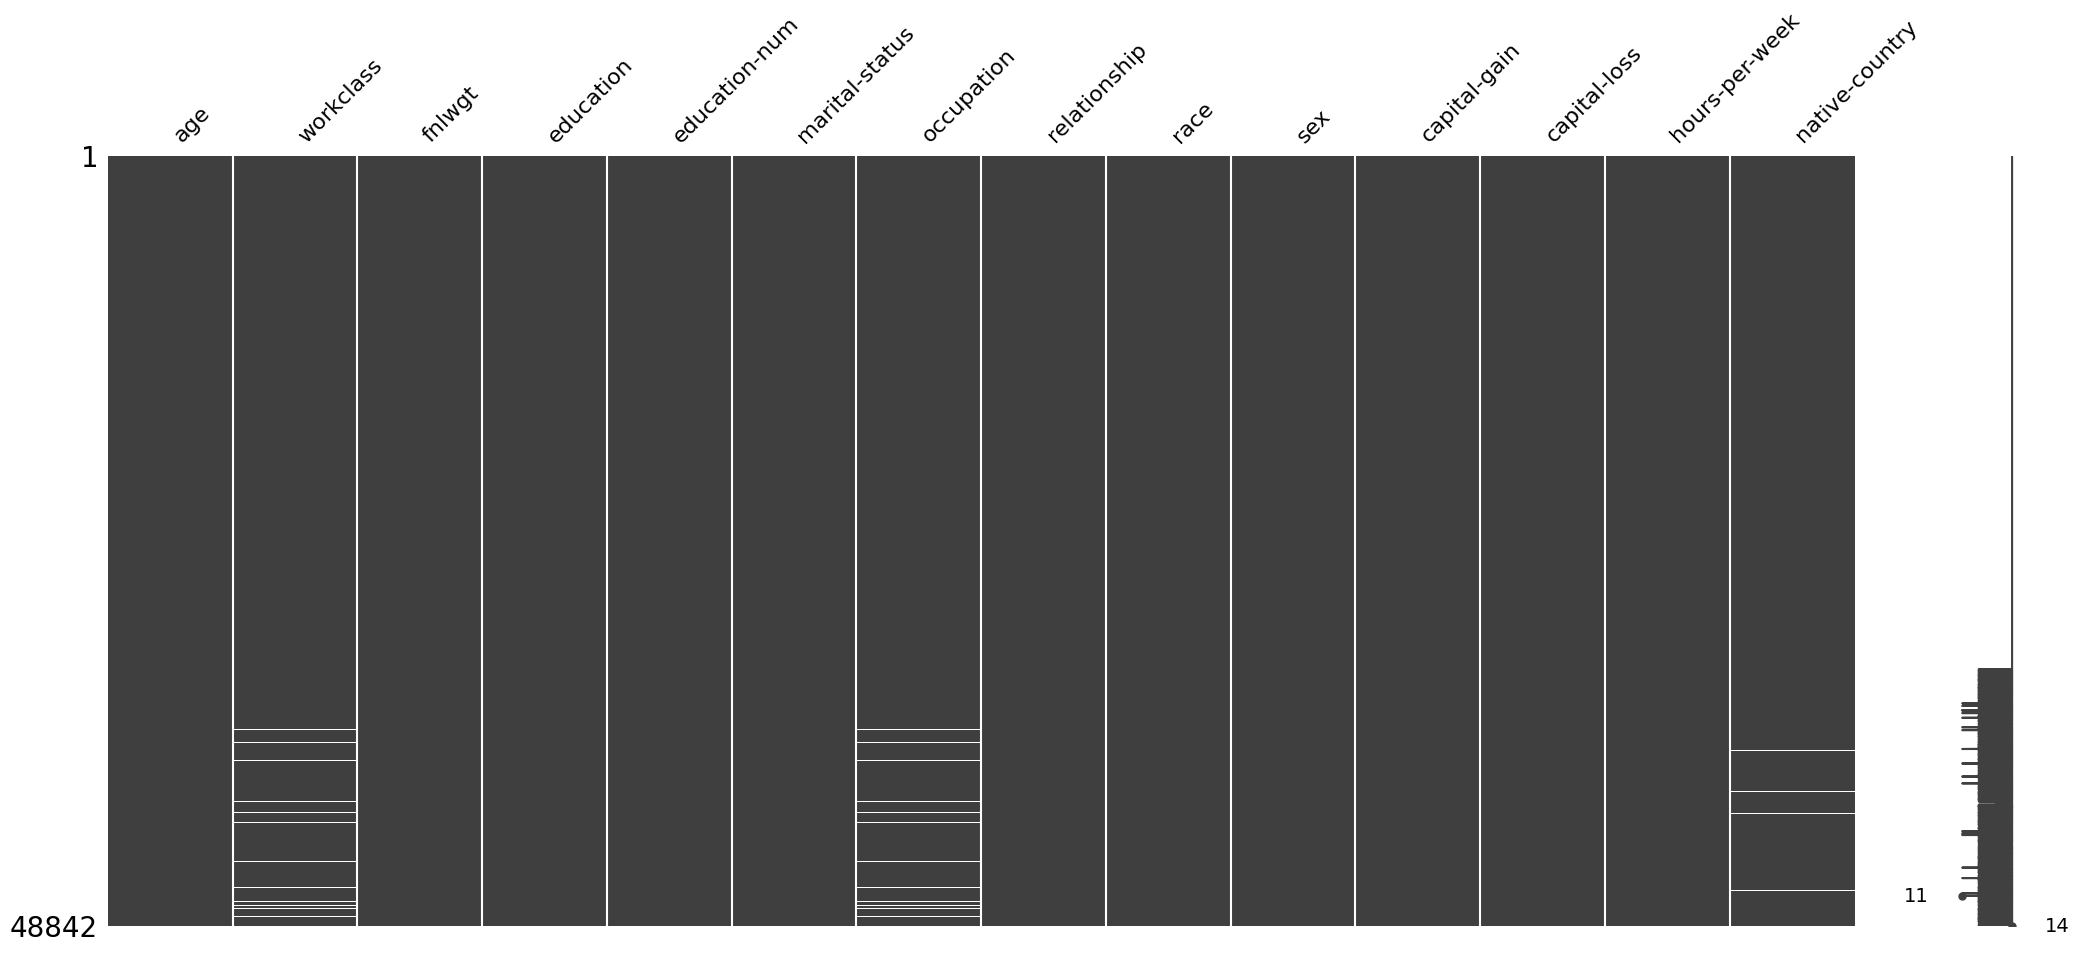

In [ ]:
import missingno as msno
msno.matrix(X)

In [ ]:
[print(x) for x in adult.variables[adult.variables.name.isin(['workclass', 'occupation', 'native-country'])]['description']]

Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


[None, None, None]

In [ ]:
(X.workclass.isnull()==(X.occupation.isnull())).value_counts()

True     48839
False        3
Name: count, dtype: int64

In [ ]:
(X.workclass.isnull()==(X['native-country'].isnull())).value_counts()

True     47643
False     1199
Name: count, dtype: int64

In [ ]:
X.workclass.isnull().value_counts()

workclass
False    47879
True       963
Name: count, dtype: int64

In [ ]:
X['native-country'].isnull().value_counts()

native-country
False    48568
True       274
Name: count, dtype: int64

In [ ]:
X.occupation.isnull().value_counts()

occupation
False    47876
True       966
Name: count, dtype: int64

Можно заметить, что есть пропущенные данные только в столбцах 'workclass' - 963, 'occupation' - 966, 'native-country' - 274. Для первых двух отсутствие или присутствие совпадает во всех случаях кроме 3. С третьим столбцом идёт расхождение.

1.2. Визуализация данных

In [ ]:
adult.variables[adult.variables.type == 'Integer']

name     role     type      demographic description units  \
0              age  Feature  Integer              Age         N/A  None   
2           fnlwgt  Feature  Integer             None        None  None   
4    education-num  Feature  Integer  Education Level        None  None   
10    capital-gain  Feature  Integer             None        None  None   
11    capital-loss  Feature  Integer             None        None  None   
12  hours-per-week  Feature  Integer             None        None  None   

   missing_values  
0              no  
2              no  
4              no  
10             no  
11             no  
12             no

In [ ]:
adult.variables[adult.variables.type == 'Integer'].shape

(6, 7)

In [ ]:
adult.variables[adult.variables.type != 'Integer']

name     role         type      demographic  \
1        workclass  Feature  Categorical           Income   
3        education  Feature  Categorical  Education Level   
5   marital-status  Feature  Categorical            Other   
6       occupation  Feature  Categorical            Other   
7     relationship  Feature  Categorical            Other   
8             race  Feature  Categorical             Race   
9              sex  Feature       Binary              Sex   
13  native-country  Feature  Categorical            Other   
14          income   Target       Binary           Income   

                                          description units missing_values  
1   Private, Self-emp-not-inc, Self-emp-inc, Feder...  None            yes  
3    Bachelors, Some-college, 11th, HS-grad, Prof-...  None             no  
5   Married-civ-spouse, Divorced, Never-married, S...  None             no  
6   Tech-support, Craft-repair, Other-service, Sal...  None            yes  
7   Wife, Own-child, Husband, Not-in-family, Other...  None             no  
8   White, Asian-Pac-Islander, Amer-Indian-Eskimo,...  None             no  
9                                       Female, Male.  None             no  
13  United-States, Cambodia, England, Puerto-Rico,...  None            yes  
14                                       >50K, <=50K.  None             no

In [ ]:
number_not_int = adult.variables[adult.variables.type != 'Integer'].shape[0]
number_int = adult.variables[adult.variables.type == 'Integer'].shape[0]

In [ ]:
number_int, number_not_int

(6, 9)

In [ ]:
name_not_int = [adult.variables[adult.variables.type != 'Integer'].name.iloc[i] for i in range(number_not_int)]

In [ ]:
name_int = [adult.variables[adult.variables.type == 'Integer'].name.iloc[i] for i in range(number_int)]
name_int

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

Text(0.5, 1.0, 'graphs without taking into account the influence of fnlwgt')

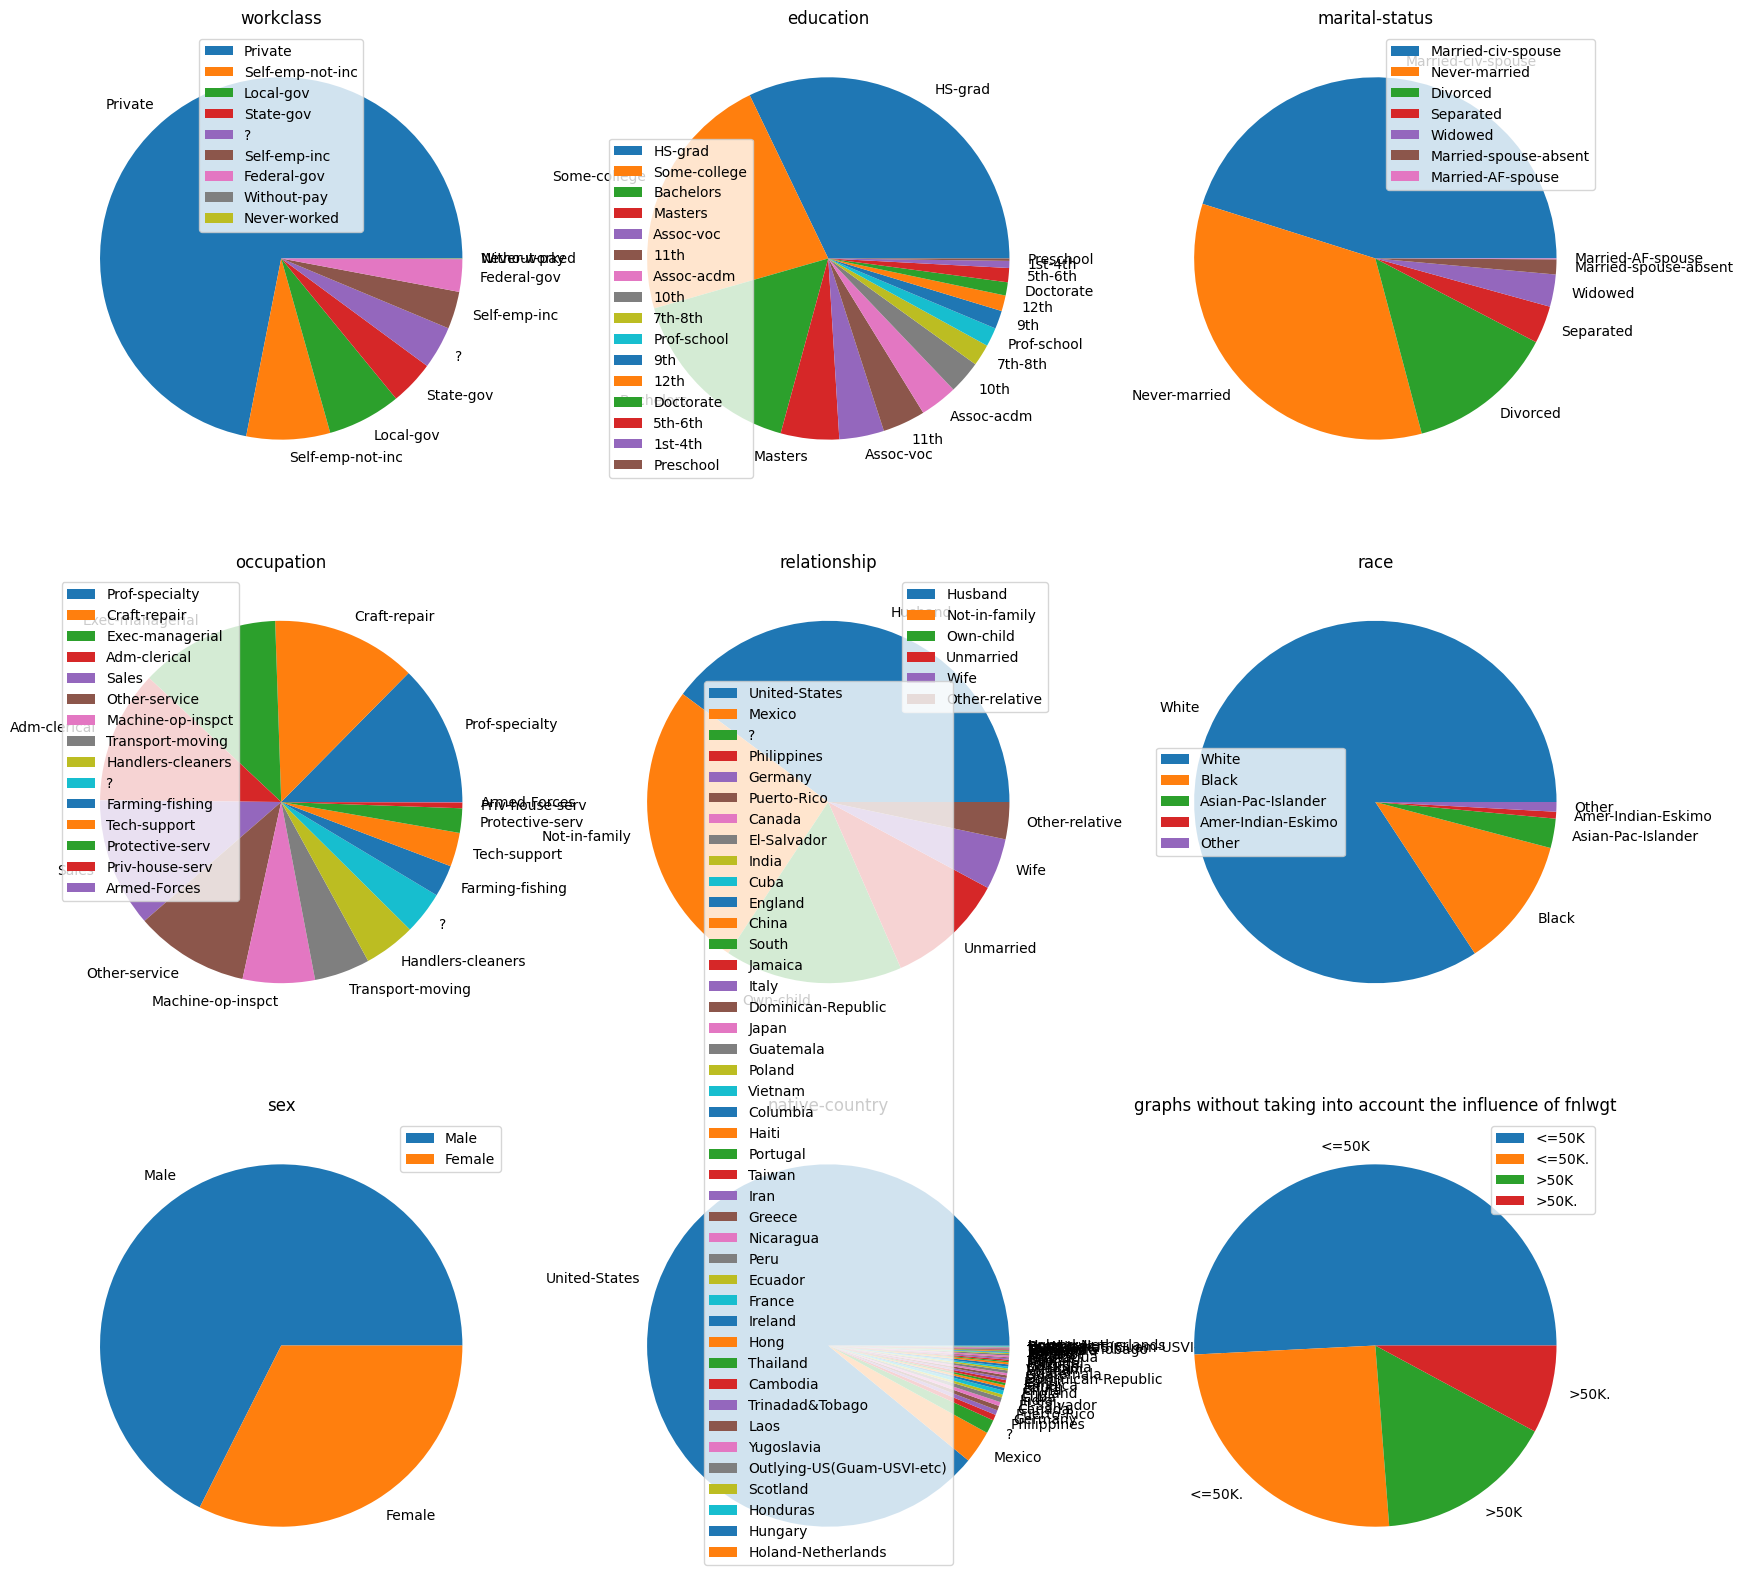

In [ ]:
plt.figure(figsize=(20,20))
for j in range(number_not_int):
  name_list = value[name_not_int[j]].value_counts().index.tolist()
  weight = [0] * len(name_list)
  for i in range(len(name_list)):
    weight[i] = value[value[name_not_int[j]] == name_list[i]]['fnlwgt'].sum()
  plt.subplot(3, 3, j + 1).pie(weight,  labels=value[name_not_int[j]].value_counts().index)
  #plt.subplot(3, 3, j + 1).hist(value[name_not_int[j]].value_counts(), weights=value[name_not_int[j]].value_counts().tolist())
  plt.subplot(3, 3, j + 1).legend()
  plt.subplot(3, 3, j + 1).set_title(name_not_int[j])
  # plt.show()
plt.title('graphs without taking into account the influence of fnlwgt')

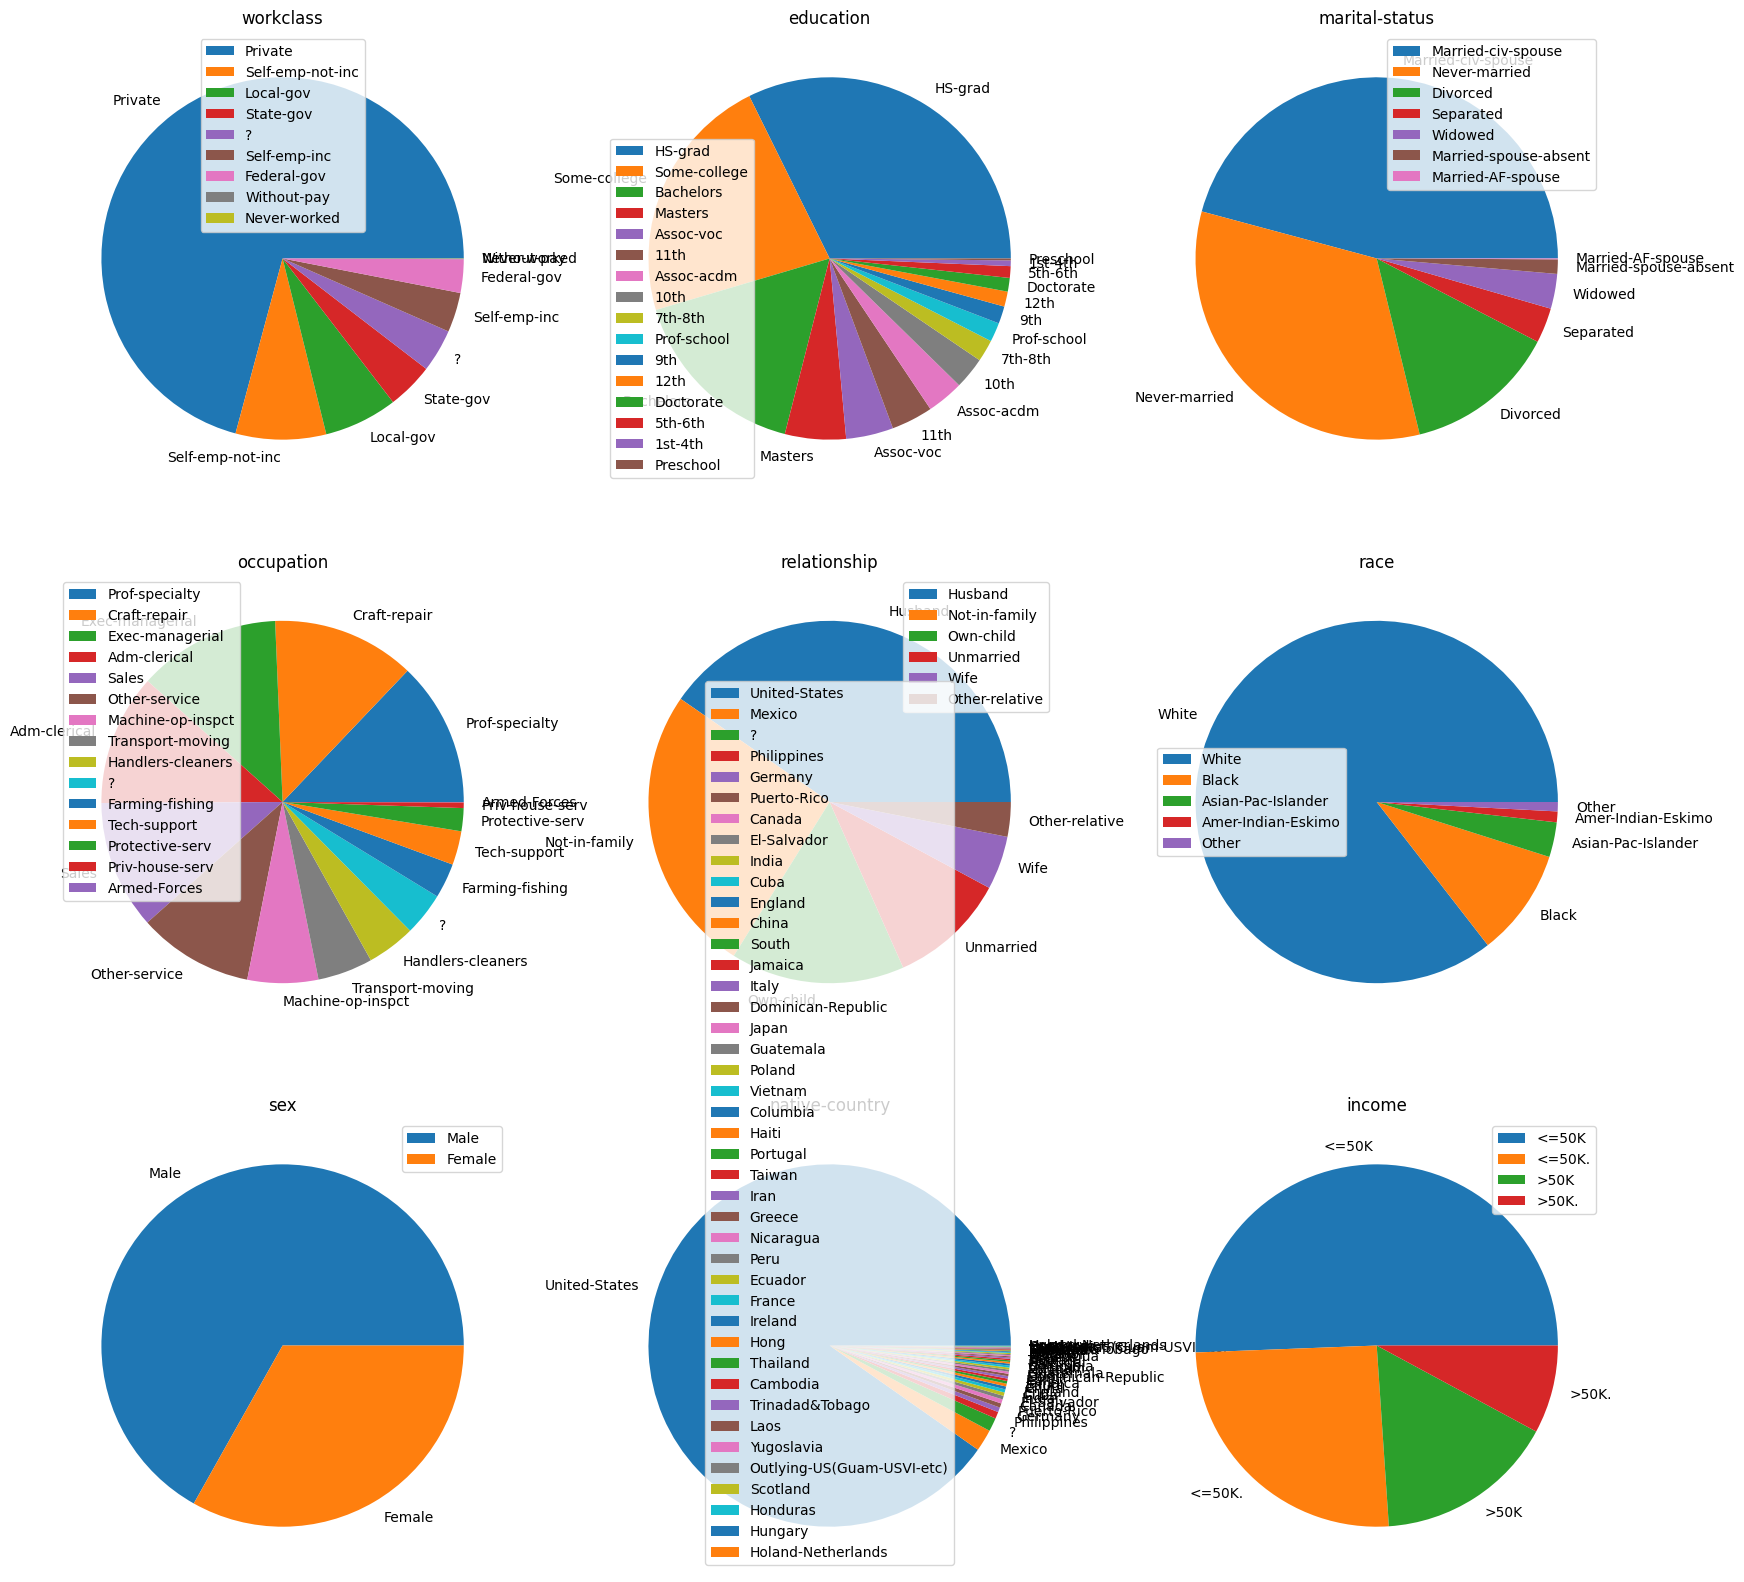

In [ ]:
plt.figure(figsize=(20,20))
for j in range(number_not_int):
  plt.subplot(3, 3, j + 1).pie(value[name_not_int[j]].value_counts(),  labels=value[name_not_int[j]].value_counts().index)
  #plt.subplot(3, 3, j + 1).hist(value[name_not_int[j]].value_counts(), weights=value[name_not_int[j]].value_counts().tolist())
  plt.subplot(3, 3, j + 1).legend()
  plt.subplot(3, 3, j + 1).set_title(name_not_int[j])
  # plt.show()

Для всех категориальных признаков были построены pie диаграммы.
Первые круговые диаграммы были получены с учетом графы fnlwgt - то есть числа людей с нужными характеристиками. Именно в связи с этой графой есть повторы признаков, имеющих разный выход (к примеру, 100 людей с одним набором признаков имеют зарплату более 50 тыс, еще 50 с таким же набором - меньше). Так же можно заметить, что в категориях occupation и relationship есть знаки вопросов, те пропущенное значение, которое не Null. Эти значения нужно будет устранить в следующих этапах. Также заметно, что выход имеет значения "<=50К", "<=50К.", ">=50К", ">=50К.", что нужно будет преобразовать в два признака.
Второй блок круговых диаграмм был построен без учета смысловой нагрузки fnlwgt, то есть по в чистом виде по исходным данным без пересчета. Можно заметить, что диаграммы приблизительно схожи, в связи с этим обучение можно проводить без учёта признака fnlwgt. Однако, для восстановления признаков его необходимо учитывать.

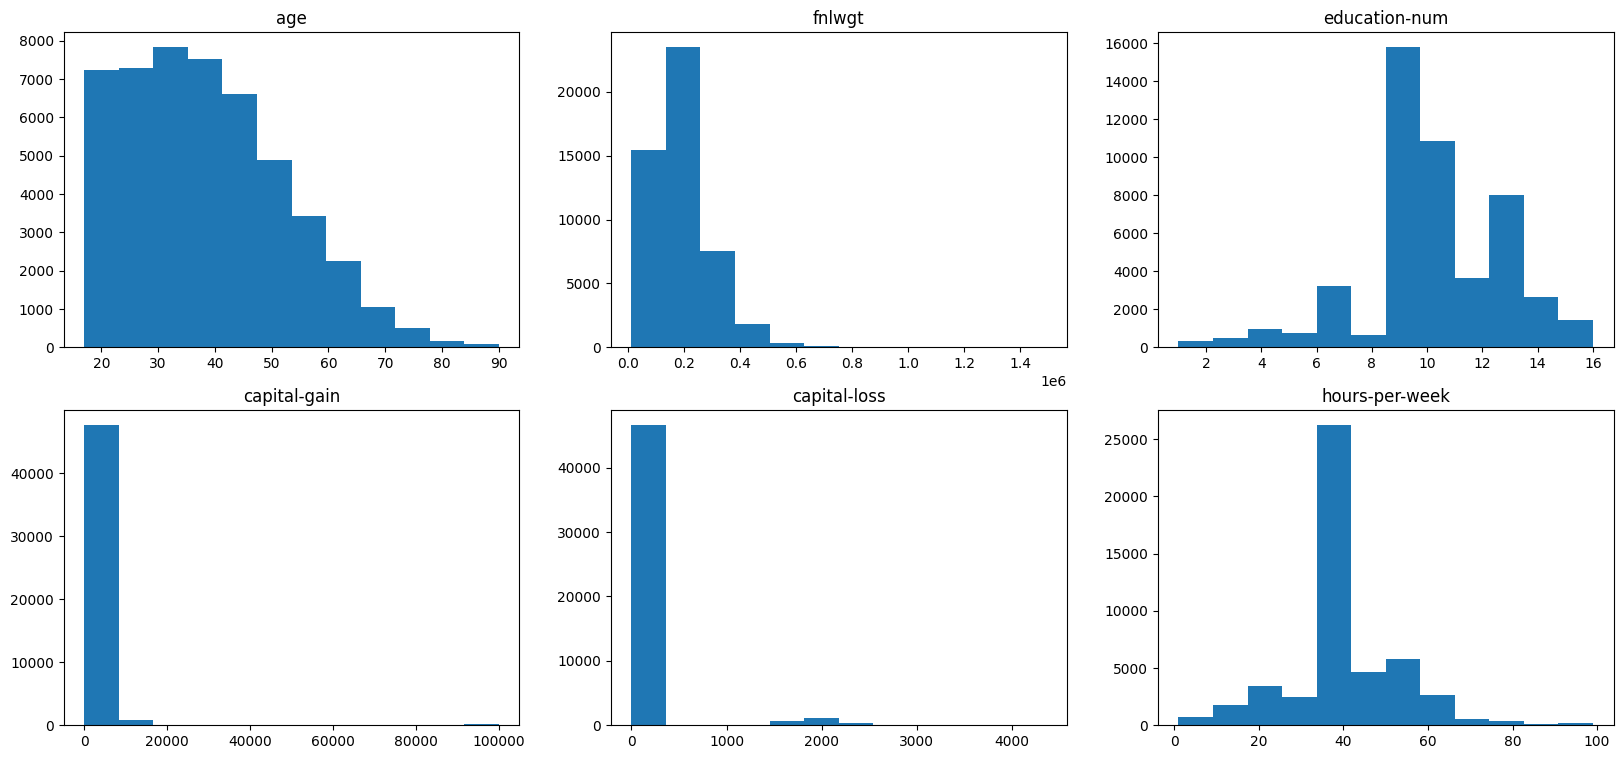

In [ ]:
plt.figure(figsize=(20,9))
for j in range(number_int):
  #plt.subplot(3, 3, j + 1).pie(value[name_int[j]].value_counts(),  labels=value[name_not_int[j]].value_counts().index)
  plt.subplot(2, 3, j + 1).hist(value[name_int[j]], bins=12)
  #plt.subplot(3, 2, j + 1).legend()
  plt.subplot(2, 3, j + 1).set_title(name_int[j])

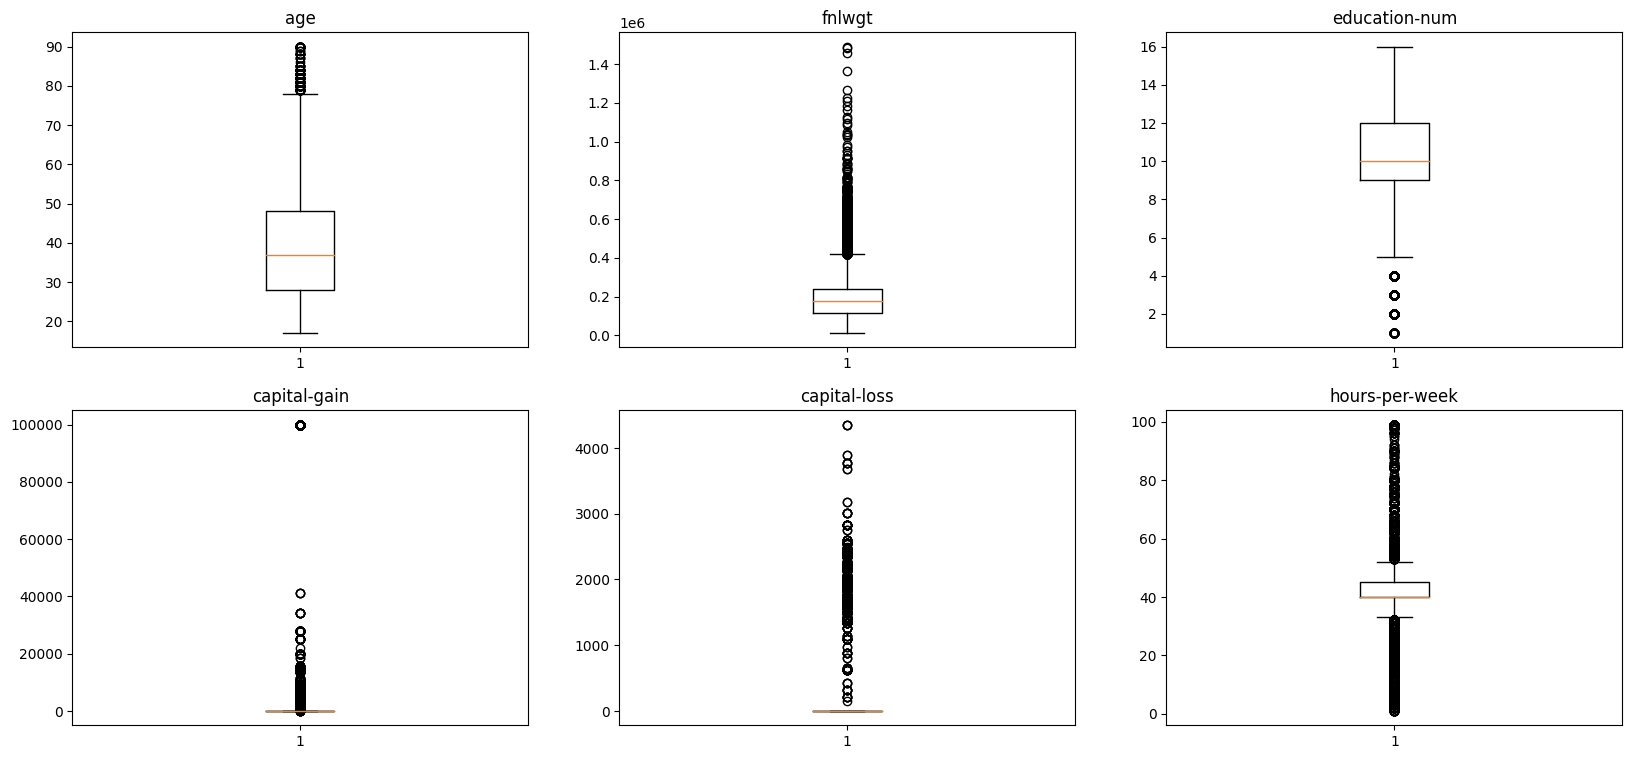

In [ ]:
plt.figure(figsize=(20,9))
for j in range(number_int):
  #plt.subplot(3, 3, j + 1).pie(value[name_int[j]].value_counts(),  labels=value[name_not_int[j]].value_counts().index)
  plt.subplot(2, 3, j + 1).boxplot(value[name_int[j]].dropna())
  #plt.subplot(3, 2, j + 1).legend()
  plt.subplot(2, 3, j + 1).set_title(name_int[j])


Тк все количественные признаки по своей сути являются категориальными, то можно считать, что на них выбросов нет.

In [ ]:
y.value_counts()

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

In [ ]:
(value[name_int[5]].max() - value[name_int[5]].min()) // 12

8

In [ ]:
value[name_int[0]].max()

90

In [ ]:
value[['education-num', 'education']].head(20)

education-num     education
0              13     Bachelors
1              13     Bachelors
2               9       HS-grad
3               7          11th
4              13     Bachelors
5              14       Masters
6               5           9th
7               9       HS-grad
8              14       Masters
9              13     Bachelors
10             10  Some-college
11             13     Bachelors
12             13     Bachelors
13             12    Assoc-acdm
14             11     Assoc-voc
15              4       7th-8th
16              9       HS-grad
17              9       HS-grad
18              7          11th
19             14       Masters

In [ ]:
value[['education-num', 'education']].value_counts()

education-num  education   
9              HS-grad         15784
10             Some-college    10878
13             Bachelors        8025
14             Masters          2657
11             Assoc-voc        2061
7              11th             1812
12             Assoc-acdm       1601
6              10th             1389
4              7th-8th           955
15             Prof-school       834
5              9th               756
8              12th              657
16             Doctorate         594
3              5th-6th           509
2              1st-4th           247
1              Preschool          83
Name: count, dtype: int64

Признаки 'education-num', 'education' являются количественной и качественной интерпритацией одной сущности, поэтому 'education' можно исключить.

Кореляция

In [ ]:
corr = X[name_int].corr()
corr.style.background_gradient(cmap='coolwarm')

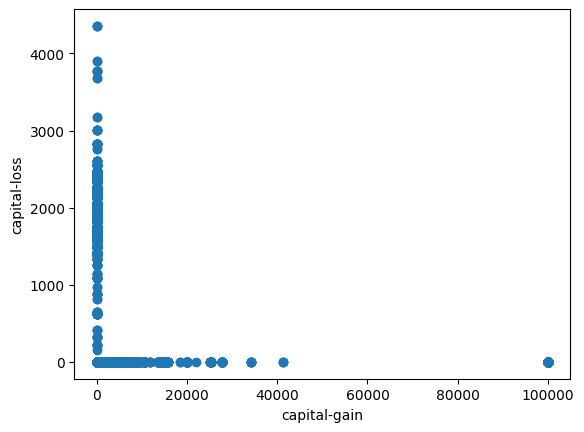

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X['capital-gain'], X['capital-loss'])
ax.set_xlabel('capital-gain')
ax.set_ylabel('capital-loss')
plt.show()

На диаграмме распределения видно, что два признака взаимно исключают друг друга. Их можно отнести в один признак

Выводы:  \
По первичной обработке видно, что нужно решить проблему с пробелами в данных; перевести категориальные признаки в количественные; преобразовать целевой признак (зависимость от символа «.»); проанализировать работу с признаком fnlwgt; слить некоторые признаки в один.

#### **Предобработка данных**


Удаление повторов

In [ ]:
value_drop_repeat = value.copy()

In [ ]:
value_drop_repeat.drop_duplicates(inplace = True, ignore_index=True)

In [ ]:
value_drop_repeat.shape

(48813, 15)

In [ ]:
value.shape

(48842, 15)

In [ ]:
value_drop_repeat1 = X.copy()
value_drop_repeat1.drop_duplicates(inplace = True, ignore_index=True)
value_drop_repeat1.shape

(48789, 14)

In [ ]:
def visual_not_int(value):
  plt.figure(figsize=(20,20))
  for j in range(number_not_int):
    plt.subplot(3, 3, j + 1).pie(value[name_not_int[j]].value_counts(),  labels=value[name_not_int[j]].value_counts().index)
    #plt.subplot(3, 3, j + 1).hist(value[name_not_int[j]].value_counts(), weights=value[name_not_int[j]].value_counts().tolist())
    plt.subplot(3, 3, j + 1).legend()
    plt.subplot(3, 3, j + 1).set_title(name_not_int[j])
    # plt.show()

In [ ]:
def visual_int(value):
  plt.figure(figsize=(20,9))
  for j in range(number_int):
    #plt.subplot(3, 3, j + 1).pie(value[name_int[j]].value_counts(),  labels=value[name_not_int[j]].value_counts().index)
    plt.subplot(2, 3, j + 1).hist(value[name_int[j]], bins=12)
    #plt.subplot(3, 2, j + 1).legend()
    plt.subplot(2, 3, j + 1).set_title(name_int[j])

In [ ]:
value.shape

(48842, 15)

In [ ]:
value_drop_repeat = value.copy()
value_drop_repeat = value_drop_repeat.replace('?', np.NaN)
value_drop_repeat = value_drop_repeat.dropna()
value_drop_repeat.shape

(45222, 15)

In [ ]:
value_drop_repeat.drop_duplicates(inplace = True, ignore_index=True)
value_drop_repeat.shape

(45194, 15)

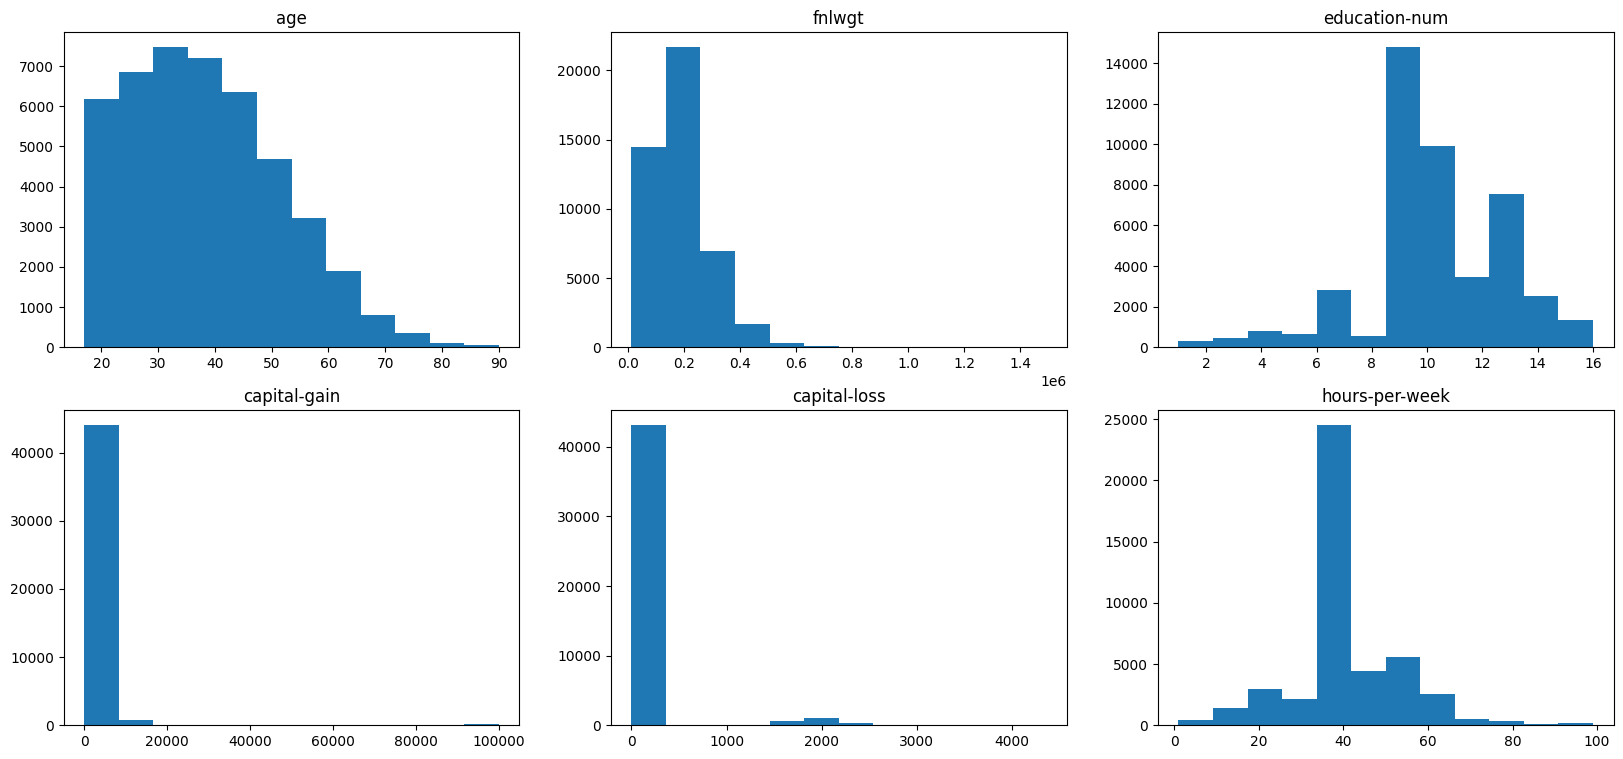

In [ ]:
visual_int(value_drop_repeat)

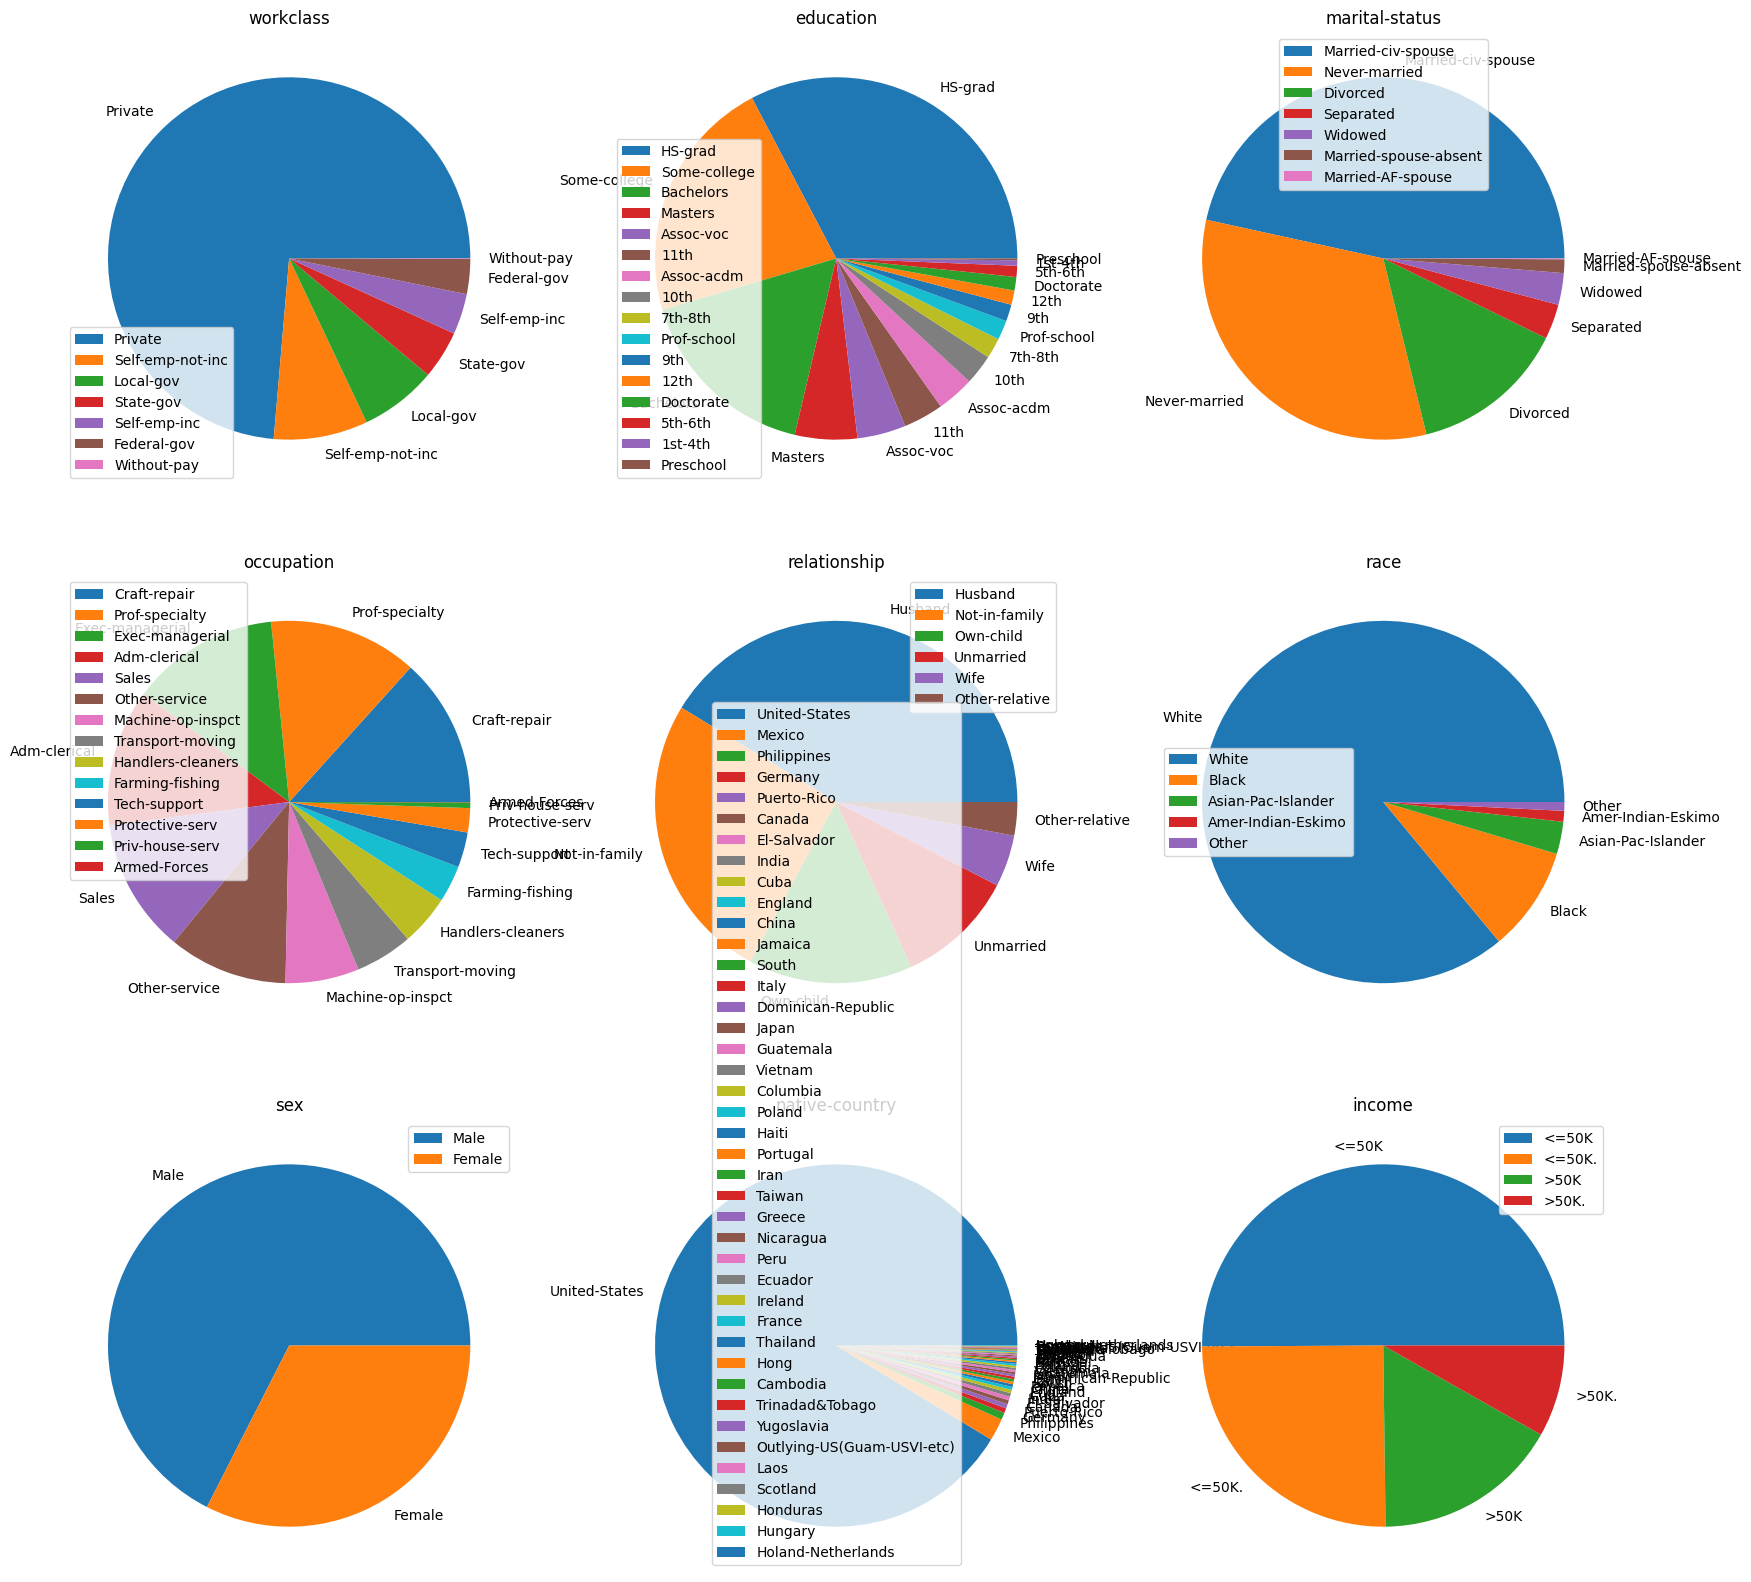

In [ ]:
visual_not_int(value_drop_repeat)

In [ ]:
value_res = value_drop_repeat.copy()

In [ ]:
value_res.isnull().any().any()


False

In [ ]:
value_res.drop('education', axis= 1 , inplace= True )

In [ ]:
name_not_int

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'income']

In [ ]:
name_one_hood = name_not_int[0:1] +  name_not_int[2:-1]
name_one_hood

['workclass',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [ ]:
from sklearn.preprocessing import OneHotEncoder
def one_hood(value_in, name_one_hood):
  value_res = value_in.copy()
  for name in name_one_hood:
    encoder = OneHotEncoder(handle_unknown='ignore', drop='first', dtype='int')

    #perform one-hot encoding on 'team' column
    encoder_df = pd.DataFrame(encoder.fit_transform(value_res[[name]]).toarray())

    #merge one-hot encoded columns back with original DataFrame
    value_res = value_res.join(encoder_df)
    for j in range(len(value[name].value_counts().index.tolist())):
        value_res.rename(columns = {j:name + '_' + str(j)}, inplace = True)
        #   value_res.columns = value_res.columns.str.replace('1', 'sss')
    #value_res.columns = value_res.columns.str.replace('1', 'sss')
    value_res.drop(name, axis= 1 , inplace= True )
  return value_res

In [ ]:
value_res = one_hood(value_res, name_one_hood)

In [ ]:
value_res.columns

Index(['income', 'age', 'fnlwgt', 'education-num', 'capital-gain',
       'capital-loss', 'hours-per-week', 'workclass_0', 'workclass_1',
       'workclass_2', 'workclass_3', 'workclass_4', 'workclass_5',
       'marital-status_0', 'marital-status_1', 'marital-status_2',
       'marital-status_3', 'marital-status_4', 'marital-status_5',
       'occupation_0', 'occupation_1', 'occupation_2', 'occupation_3',
       'occupation_4', 'occupation_5', 'occupation_6', 'occupation_7',
       'occupation_8', 'occupation_9', 'occupation_10', 'occupation_11',
       'occupation_12', 'relationship_0', 'relationship_1', 'relationship_2',
       'relationship_3', 'relationship_4', 'race_0', 'race_1', 'race_2',
       'race_3', 'sex_0', 'native-country_0', 'native-country_1',
       'native-country_2', 'native-country_3', 'native-country_4',
       'native-country_5', 'native-country_6', 'native-country_7',
       'native-country_8', 'native-country_9', 'native-country_10',
       'native-country_11',

In [ ]:
value_res.loc[value_res['income'] == '<=50K', 'income'] = 0
value_res.loc[value_res['income'] == '<=50K.', 'income'] = 0
value_res.loc[value_res['income'] == '>50K', 'income'] = 1
value_res.loc[value_res['income'] == '>50K.', 'income'] = 1

In [ ]:
value_res['income'].unique()

array([0, 1], dtype=object)

In [ ]:
value_res['capital_change'] = value_res['capital-gain'] - value_res['capital-loss']
value_res.drop('capital-gain', axis= 1 , inplace= True )
value_res.drop('capital-loss', axis= 1 , inplace= True )

In [ ]:
value_res = value_res.astype('int')

In [ ]:
max_fnlwgt = value_res.fnlwgt.max()

In [ ]:
#corr = value_res.corr()
#corr.style.background_gradient(cmap='coolwarm')

In [ ]:
value_res

income  age  fnlwgt  education-num  hours-per-week  workclass_0  \
0           0   39   77516             13              40            0   
1           0   50   83311             13              13            0   
2           0   38  215646              9              40            0   
3           0   53  234721              7              40            0   
4           0   28  338409             13              40            0   
...       ...  ...     ...            ...             ...          ...   
45189       0   33  245211             13              40            0   
45190       0   39  215419             13              36            0   
45191       0   38  374983             13              50            0   
45192       0   44   83891             13              40            0   
45193       1   35  182148             13              60            0   

       workclass_1  workclass_2  workclass_3  workclass_4  ...  \
0                0            0            0            1  ...   
1                0            0            1            0  ...   
2                1            0            0            0  ...   
3                1            0            0            0  ...   
4                1            0            0            0  ...   
...            ...          ...          ...          ...  ...   
45189            1            0            0            0  ...   
45190            1            0            0            0  ...   
45191            1            0            0            0  ...   
45192            1            0            0            0  ...   
45193            0            1            0            0  ...   

       native-country_31  native-country_32  native-country_33  \
0                      0                  0                  0   
1                      0                  0                  0   
2                      0                  0                  0   
3                      0                  0                  0   
4                      0                  0                  0   
...                  ...                ...                ...   
45189                  0                  0                  0   
45190                  0                  0                  0   
45191                  0                  0                  0   
45192                  0                  0                  0   
45193                  0                  0                  0   

       native-country_34  native-country_35  native-country_36  \
0                      0                  0                  0   
1                      0                  0                  0   
2                      0                  0                  0   
3                      0                  0                  0   
4                      0                  0                  0   
...                  ...                ...                ...   
45189                  0                  0                  0   
45190                  0                  0                  0   
45191                  0                  0                  0   
45192                  0                  0                  0   
45193                  0                  0                  0   

       native-country_37  native-country_38  native-country_39  capital_change  
0                      1                  0                  0            2174  
1                      1                  0                  0               0  
2                      1                  0                  0               0  
3                      1                  0                  0               0  
4                      0                  0                  0               0  
...                  ...                ...                ...             ...  
45189                  1                  0                  0               0  
45190                  1                  0                  0               0  
45191     

In [ ]:
value_res.fnlwgt / max_fnlwgt

0        0.052010
1        0.055898
2        0.144690
3        0.157489
4        0.227059
           ...   
45189    0.164527
45190    0.144538
45191    0.251599
45192    0.056288
45193    0.122214
Name: fnlwgt, Length: 45194, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
def norm(value_res, name):
  scaler = MinMaxScaler(feature_range = (0, 1))
  scaler.fit(pd.DataFrame(value_res[name]))
  val_norm = scaler.transform(pd.DataFrame(value_res[name]))
  value_res[name + '_norm'] = val_norm
  value_res.drop(name, axis= 1 , inplace= True )
  return value_res

In [ ]:
value_res1 = value_res.copy()

In [ ]:
names = ['age', 'fnlwgt', 'education-num', 'hours-per-week']
for name in names:
  value_res1 = norm(value_res1, name)

In [ ]:
name = 'capital_change'
scaler = MinMaxScaler(feature_range = (-1, 1))
scaler.fit(pd.DataFrame(value_res1[name]))
val_norm = scaler.transform(pd.DataFrame(value_res1[name]))
value_res1[name + '_norm'] = val_norm
value_res1.drop(name, axis= 1 , inplace= True )

In [ ]:
value_res1

income  workclass_0  workclass_1  workclass_2  workclass_3  \
0           0            0            0            0            0   
1           0            0            0            0            1   
2           0            0            1            0            0   
3           0            0            1            0            0   
4           0            0            1            0            0   
...       ...          ...          ...          ...          ...   
45189       0            0            1            0            0   
45190       0            0            1            0            0   
45191       0            0            1            0            0   
45192       0            0            1            0            0   
45193       1            0            0            1            0   

       workclass_4  workclass_5  marital-status_0  marital-status_1  \
0                1            0                 0                 0   
1                0            0                 0                 1   
2                0            0                 0                 0   
3                0            0                 0                 1   
4                0            0                 0                 1   
...            ...          ...               ...               ...   
45189            0            0                 0                 0   
45190            0            0                 0                 0   
45191            0            0                 0                 1   
45192            0            0                 0                 0   
45193            0            0                 0                 1   

       marital-status_2  ...  native-country_35  native-country_36  \
0                     0  ...                  0                  0   
1                     0  ...                  0                  0   
2                     0  ...                  0                  0   
3                     0  ...                  0                  0   
4                     0  ...                  0                  0   
...                 ...  ...                ...                ...   
45189                 0  ...                  0                  0   
45190                 0  ...                  0                  0   
45191                 0  ...                  0                  0   
45192                 0  ...                  0                  0   
45193                 0  ...                  0                  0   

       native-country_37  native-country_38  native-country_39  age_norm  \
0                      1                  0                  0  0.301370   
1                      1                  0                  0  0.452055   
2                      1                  0                  0  0.287671   
3                      1                  0                  0  0.493151   
4                      0                  0                  0  0.150685   
...                  ...                ...                ...       ...   
45189                  1                  0                  0  0.219178   
45190                  1                  0                  0  0.301370   
45191                  1                  0                  0  0.287671   
45192                  1                  0                  0  0.369863   
45193                  1                  0                  0  0.246575   

       fnlwgt_norm  education-num_norm  hours-per-week_norm  \
0         0.043350            0.800000             0.397959   
1         0.047274            0.800000             0.122449   
2         0.136877            0.533333             0.397959   
3         0.149792            0.400000             0.397959   
4         0.219998            0.800000             0.397959   
...            ...                 ...                  ...   
45189     0.156895            0.800000             0.397959   
45190     0.136723            0.800000             0.357143   
4519

In [ ]:
value_norm = value_res1.copy()

In [ ]:
value_norm.shape

(45194, 81)

#### **Построение нейросетей**

In [ ]:
import torch
import torch.nn as nn

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
value_norm = value_norm.sample(frac = 1)
value_norm = value_norm[:len(value_norm) // 10]
value_norm

income  workclass_0  workclass_1  workclass_2  workclass_3  \
41907       1            0            1            0            0   
40986       0            0            1            0            0   
24751       1            0            1            0            0   
33783       1            0            1            0            0   
17150       1            0            1            0            0   
...       ...          ...          ...          ...          ...   
25866       1            0            1            0            0   
13220       0            0            1            0            0   
22312       0            0            1            0            0   
17987       1            0            1            0            0   
12447       0            0            1            0            0   

       workclass_4  workclass_5  marital-status_0  marital-status_1  \
41907            0            0                 0                 1   
40986            0            0                 0                 1   
24751            0            0                 0                 1   
33783            0            0                 0                 1   
17150            0            0                 0                 1   
...            ...          ...               ...               ...   
25866            0            0                 0                 1   
13220            0            0                 0                 1   
22312            0            0                 0                 0   
17987            0            0                 0                 1   
12447            0            0                 0                 0   

       marital-status_2  ...  native-country_35  native-country_36  \
41907                 0  ...                  0                  0   
40986                 0  ...                  0                  0   
24751                 0  ...                  0                  0   
33783                 0  ...                  0                  0   
17150                 0  ...                  0                  0   
...                 ...  ...                ...                ...   
25866                 0  ...                  0                  0   
13220                 0  ...                  0                  0   
22312                 0  ...                  0                  0   
17987                 0  ...                  0                  0   
12447                 0  ...                  0                  0   

       native-country_37  native-country_38  native-country_39  age_norm  \
41907                  1                  0                  0  0.534247   
40986                  1                  0                  0  0.068493   
24751                  1                  0                  0  0.657534   
33783                  1                  0                  0  0.369863   
17150                  1                  0                  0  0.219178   
...                  ...                ...                ...       ...   
25866                  1                  0                  0  0.205479   
13220                  0                  0                  0  0.356164   
22312                  1                  0                  0  0.109589   
17987                  1                  0                  0  0.452055   
12447                  1                  0                  0  0.109589   

       fnlwgt_norm  education-num_norm  hours-per-week_norm  \
41907     0.097700            0.800000             0.551020   
40986     0.249338            0.533333             0.397959   
24751     0.067595            0.800000             0.397959   
33783     0.117956            0.533333             0.397959   
17150     0.150554            0.933333             0.397959   
...            ...                 ...                  ...   
25866     0.076267            0.800000             0.500000   
13220     0.318204            0.266667             0.397959   
2231

In [ ]:
def train_val_test_split(X, y, train_size=0.6, val_size=0.3, test_size=0.1):
  X_train_all, X_test, y_train_all, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
  X_train, X_val, y_train, y_val = train_test_split(X_train_all, y_train_all, test_size=1/3, random_state=42)
  return np.array(X_train), np.array(y_train), np.array(X_val), np.array(y_val), np.array(X_test), np.array(y_test)

In [ ]:
X_train, y_train, X_val, y_val, X_test, y_test = train_val_test_split(value_norm.loc[:, value_norm.columns !='income'], value_norm.income)

In [ ]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((2711, 80), (2711,), (1356, 80), (1356,), (452, 80), (452,))

In [ ]:
train_dataset = torch.utils.data.TensorDataset(torch.FloatTensor(X_train), torch.LongTensor(y_train))
val_dataset = torch.utils.data.TensorDataset(torch.FloatTensor(X_val), torch.LongTensor(y_val))
test_dataset = torch.utils.data.TensorDataset(torch.FloatTensor(X_test), torch.LongTensor(y_test))

In [ ]:
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=len(train_dataset))
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=len(val_dataset))
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=len(test_dataset))

In [ ]:
def xavier_init(m, seed=12):
    if isinstance(m, nn.Linear):
        torch.manual_seed(seed)
        nn.init.xavier_uniform_(m.weight)
        #nn.init.ones_(m.weight)

In [ ]:
class MyNet(nn.Module):
  def __init__(self):
    super(MyNet, self).__init__()
    self.layer1 = nn.Linear(80, 20)
    self.act1 = torch.sigmoid
    self.layer2 = nn.Linear(20, 2)
    #self.act2 = torch.sigmoid
    self.apply(xavier_init)

  def forward(self, x):
    x = self.layer1(x)
    x = self.act1(x)
    x = self.layer2(x)
    #x = self.act2(x)
    return x

In [ ]:
def classification_error(model_output, standart):
    return (model_output.detach().argmax(dim = 1) != standart).sum().item() / model_output.shape[0]

In [ ]:
def train_epoch(net, dataloader, criterion, optimizer, device):
    total_loss = 0
    total_error = 0
    for x_batch, y_batch in dataloader:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        y_pred = net(x_batch)
        loss = criterion(y_pred, y_batch)
        total_loss += loss.item()
        total_error += classification_error(y_pred, y_batch)
        loss.backward()
        optimizer.step()
    return total_loss / len(dataloader), total_error / len(dataloader)

def eval_net(net, dataloader, criterion, device):
    net.eval()
    total_loss = 0
    total_error = 0
    with torch.no_grad():
        for x_batch, y_batch in dataloader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            y_pred = net(x_batch)
            loss = criterion(y_pred, y_batch)
            total_loss += loss.item()
            total_error += classification_error(y_pred, y_batch)
    return total_loss / len(dataloader), total_error / len(dataloader)

In [ ]:
def model_training(net,
                   num_epochs,
                   optimizer,
                   train_losses,
                   val_losses,
                   test_losses,
                   train_errors,
                   val_errors,
                   test_errors,
                   train_dataloader=train_dataloader,
                   val_dataloader=val_dataloader,
                   test_dataloader=test_dataloader,
                   criterion=nn.CrossEntropyLoss(),
                   device='cpu'):

    upper_count = 0
    epoch = 0
    while upper_count < 10 and epoch < num_epochs:
      train_result = train_epoch(net, train_dataloader, criterion, optimizer, device)
      val_result = eval_net(net, val_dataloader, criterion, device)
      test_result = eval_net(net, test_dataloader, criterion, device)

      train_losses.append(train_result[0])
      train_errors.append(train_result[1])
      val_losses.append(val_result[0])
      val_errors.append(val_result[1])
      test_losses.append(test_result[0])
      test_errors.append(test_result[1])

      if epoch >= 1 and val_losses[epoch - 1] < val_losses[epoch]:
        upper_count += 1
      else:
        upper_count = 0
      epoch += 1
      if epoch % 100 == 0:
        print(epoch)
    return epoch

In [ ]:
def v_loss(train_losses, val_losses, test_losses):
  plt.figure()
  plt.plot(train_losses, label='Training loss')
  plt.plot(val_losses, label='Validation loss')
  plt.plot(test_losses, label='Test loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title('Losses')
  plt.legend()
  plt.show()

In [ ]:
def v_error(train_errors, val_errors, test_errors):
  plt.figure()
  plt.plot(train_errors, label='Training errors')
  plt.plot(val_errors, label='Validation errors')
  plt.plot(test_errors, label='Test errors')
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.title('Errors')
  plt.legend()
  plt.show()

In [ ]:
device = 'cpu'

#### Простой градиентный спуск

In [ ]:
def simple_gd(learning_rate = 0.5, num_epochs = 1000):
  net = MyNet().to(device)

  optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)
  #optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
  criterion = nn.CrossEntropyLoss()

  train_losses, val_losses, test_losses = [], [], []
  train_errors, val_errors, test_errors = [], [], []

  epochs = model_training(net, num_epochs, optimizer, train_losses, val_losses, test_losses, train_errors, val_errors, test_errors)
  print('simple gd: lr = {}, epochs = {}, train_error = {}, test_error = {}'.format(learning_rate, epochs, train_errors[-1], test_errors[-1]))
  return train_losses, val_losses, test_losses, train_errors, val_errors, test_errors

In [ ]:
train_losses, val_losses, test_losses, train_errors, val_errors, test_errors = simple_gd(learning_rate = 0.001, num_epochs = 2500)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
simple gd: lr = 0.001, epochs = 2500, train_error = 0.2534120250829952, test_error = 0.2721238938053097


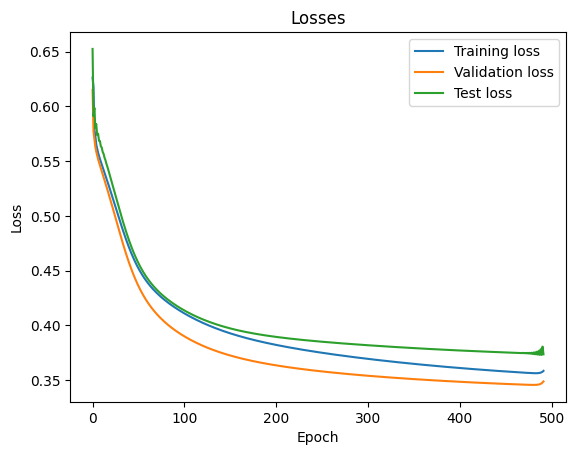

In [ ]:
v_loss(train_losses, val_losses, test_losses)

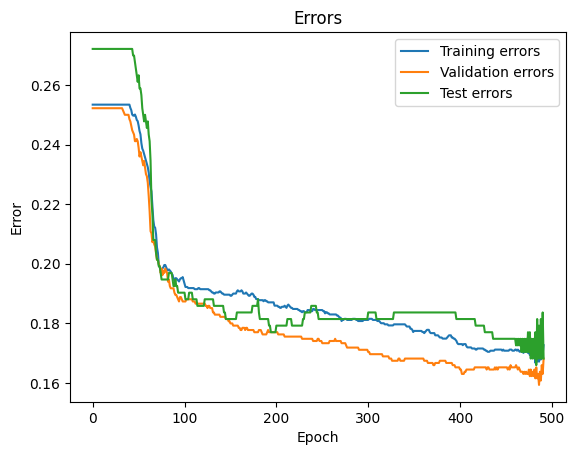

In [ ]:
v_error(train_errors, val_errors, test_errors)

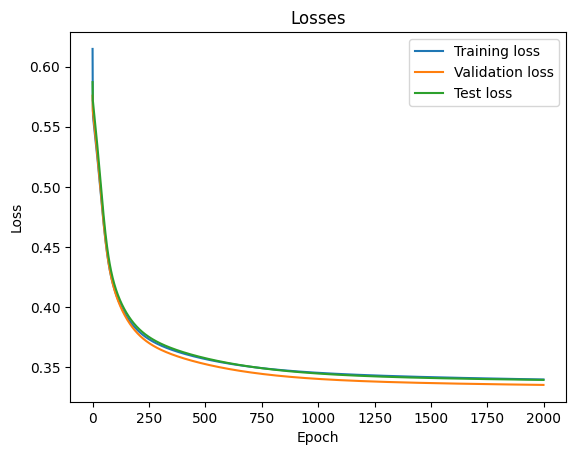

In [ ]:
v_loss(train_losses, val_losses, test_losses)

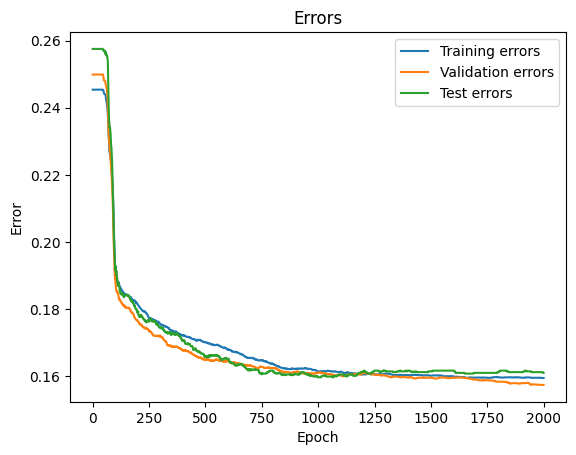

In [ ]:
v_error(train_errors, val_errors, test_errors)

In [ ]:
a = 1

 #### NAG and GDM

In [ ]:
def gdm(learning_rate = 0.5, opt_momentum = 0.8, num_epochs = 1000):
  net = MyNet().to(device)

  nag_optimizer_08 = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=opt_momentum)
  optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)
  #optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
  criterion = nn.CrossEntropyLoss()

  train_losses, val_losses, test_losses = [], [], []
  train_errors, val_errors, test_errors = [], [], []

  epochs = model_training(net, num_epochs, optimizer, train_losses, val_losses, test_losses, train_errors, val_errors, test_errors)
  print('simple gd: lr = {}, epochs = {}, train_error = {}, test_error = {}'.format(learning_rate, epochs, train_errors[-1], test_errors[-1]))
  return train_losses, val_losses, test_losses, train_errors, val_errors, test_errors

In [ ]:
train_losses, val_losses, test_losses, train_errors, val_errors, test_errors = gdm(learning_rate = 0.5, num_epochs = 2000, opt_momentum = 0.8)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
simple gd: lr = 0.5, epochs = 2000, train_error = 0.16045739579490964, test_error = 0.1747787610619469


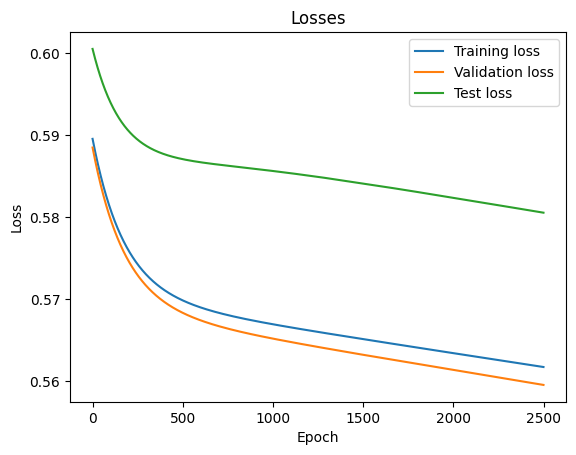

In [ ]:
v_loss(train_losses, val_losses, test_losses)

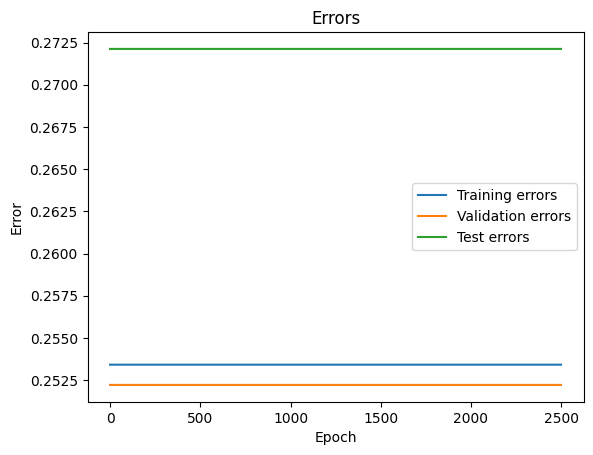

In [ ]:
v_error(train_errors, val_errors, test_errors)

In [ ]:
def nag(learning_rate = 0.5, opt_momentum = 0.8, num_epochs = 1000):
  net = MyNet().to(device)

  nag_optimizer_08 = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=opt_momentum, nesterov=True)
  optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)
  #optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
  criterion = nn.CrossEntropyLoss()

  train_losses, val_losses, test_losses = [], [], []
  train_errors, val_errors, test_errors = [], [], []

  epochs = model_training(net, num_epochs, optimizer, train_losses, val_losses, test_losses, train_errors, val_errors, test_errors)
  print('simple gd: lr = {}, epochs = {}, train_error = {}, test_error = {}'.format(learning_rate, epochs, train_errors[-1], test_errors[-1]))
  return train_losses, val_losses, test_losses, train_errors, val_errors, test_errors

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
simple gd: lr = 0.5, epochs = 2000, train_error = 0.16045739579490964, test_error = 0.17256637168141592


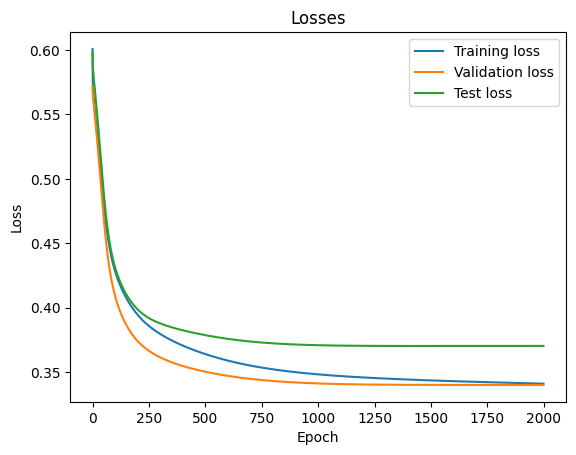

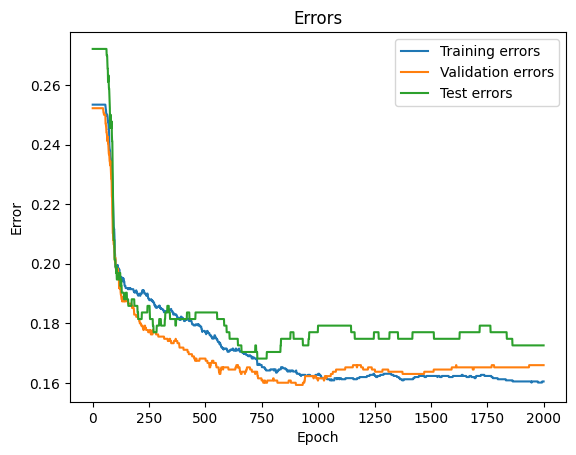

In [ ]:
train_losses, val_losses, test_losses, train_errors, val_errors, test_errors = nag(learning_rate = 0.5, num_epochs = 2000, opt_momentum = 0.8)
v_loss(train_losses, val_losses, test_losses)
v_error(train_errors, val_errors, test_errors)

Методы наискорейшего спуска и сопряжённых градиентов

In [ ]:
from torch.optim import Optimizer

In [ ]:
class SteepestDescent(Optimizer):
    def __init__(self, params, lr=1e-2):
        defaults = dict(lr=lr)
        super(SteepestDescent, self).__init__(params, defaults)

    def step(self, closure=None):
        loss = None
        if closure is not None:
            loss = closure()

        for group in self.param_groups:
            lr = group['lr']
            for p in group['params']:
                if p.grad is None:
                    continue
                p.data.add_(-lr, p.grad.data)

        return loss

In [ ]:
class FletcherReevesOptimizer(Optimizer):
    def __init__(self, params, lr=1e-2):
        defaults = dict(lr=lr)
        super(FletcherReevesOptimizer, self).__init__(params, defaults)
        self.prev_grads = None
        self.prev_directions = None

    def step(self, closure=None):
        loss = None
        if closure is not None:
            loss = closure()

        for group in self.param_groups:
            lr = group['lr']
            for p in group['params']:
                if p.grad is None:
                    continue
                grad = p.grad.data

                if self.prev_grads is None:
                    self.prev_grads = {}
                if self.prev_directions is None:
                    self.prev_directions = {}

                if p in self.prev_grads:
                    prev_grad = self.prev_grads[p]
                    beta = torch.dot(grad.view(-1), grad.view(-1)) / torch.dot(prev_grad.view(-1), prev_grad.view(-1))
                    direction = -grad + beta * self.prev_directions[p]
                else:
                    direction = -grad
                    beta = 0

                p.data.add_(lr * direction)

                self.prev_grads[p] = grad.clone()
                self.prev_directions[p] = direction.clone()

        return loss

In [ ]:
class PolakRibiereOptimizer(Optimizer):
    def __init__(self, params, lr=1e-2):
        defaults = dict(lr=lr)
        super(PolakRibiereOptimizer, self).__init__(params, defaults)
        self.prev_grads = None
        self.prev_directions = None

    def step(self, closure=None):
        loss = None
        if closure is not None:
            loss = closure()

        for group in self.param_groups:
            lr = group['lr']
            for p in group['params']:
                if p.grad is None:
                    continue
                grad = p.grad.data

                if self.prev_grads is None:
                    self.prev_grads = {}
                if self.prev_directions is None:
                    self.prev_directions = {}

                if p in self.prev_grads:
                    prev_grad = self.prev_grads[p]
                    # Вычисление бета по методу Полака-Рибьера
                    beta = torch.dot(grad.view(-1), (grad - prev_grad).view(-1)) / torch.dot(prev_grad.view(-1), prev_grad.view(-1))
                    direction = -grad + beta * self.prev_directions[p]
                else:
                    direction = -grad
                    beta = 0

                p.data.add_(lr * direction)

                # Обновление предыдущих градиентов и направлений
                self.prev_grads[p] = grad.clone()
                self.prev_directions[p] = direction.clone()

        return loss


In [ ]:
steepest_net = MyNet().to(device)

steepest_optimizer = SteepestDescent(steepest_net.parameters(), lr=1e-3)

st_train_losses, st_val_losses, st_test_losses = [], [], []
st_train_errors, st_val_errors, st_test_errors = [], [], []

num_epochs = 5000

steepest_net.to(device)

epochs = model_training(steepest_net, num_epochs, steepest_optimizer, st_train_losses, st_val_losses, st_test_losses, st_train_errors, st_val_errors, st_test_errors)

In [ ]:
def steepest_descent(num_epochs = 1000):
  net = MyNet().to(device)

  learning_rate = 0.2
  optimizer = SteepestDescent(net.parameters(), lr=learning_rate)

  train_losses, val_losses, test_losses = [], [], []
  train_errors, val_errors, test_errors = [], [], []

  net.to(device)


  epochs = model_training(net, num_epochs, optimizer, train_losses, val_losses, test_losses, train_errors, val_errors, test_errors)
  print('simple gd: lr = {}, epochs = {}, train_error = {}, test_error = {}'.format(learning_rate, epochs, train_errors[-1], test_errors[-1]))
  return train_losses, val_losses, test_losses, train_errors, val_errors, test_errors

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
simple gd: lr = 0.2, epochs = 2100, train_error = 0.1652526742899299, test_error = 0.17256637168141592


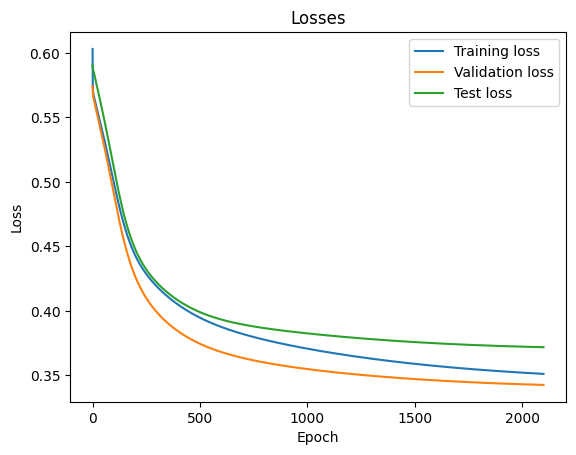

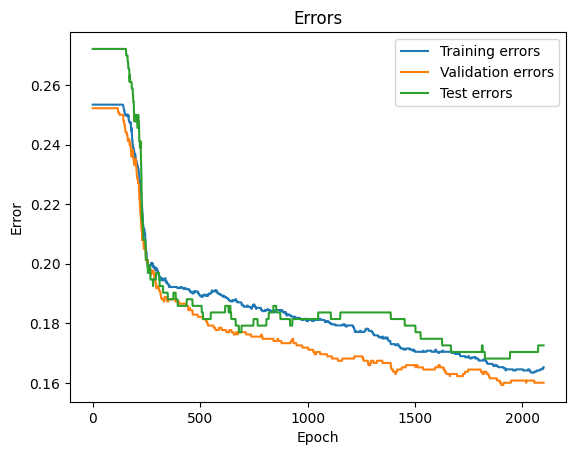

In [ ]:
train_losses, val_losses, test_losses, train_errors, val_errors, test_errors = steepest_descent(num_epochs = 2100)
v_loss(train_losses, val_losses, test_losses)
v_error(train_errors, val_errors, test_errors)

In [ ]:
def fletcher_reeeves(num_epochs = 1000):
  net = MyNet().to(device)

  learning_rate = 0.2
  optimizer = FletcherReevesOptimizer(net.parameters(), lr=learning_rate)

  train_losses, val_losses, test_losses = [], [], []
  train_errors, val_errors, test_errors = [], [], []

  net.to(device)

  epochs = model_training(net, num_epochs, optimizer, train_losses, val_losses, test_losses, train_errors, val_errors, test_errors)
  print('simple gd: lr = {}, epochs = {}, train_error = {}, test_error = {}'.format(learning_rate, epochs, train_errors[-1], test_errors[-1]))
  return train_losses, val_losses, test_losses, train_errors, val_errors, test_errors

simple gd: lr = 0.2, epochs = 20, train_error = 0.7465879749170048, test_error = 0.7278761061946902


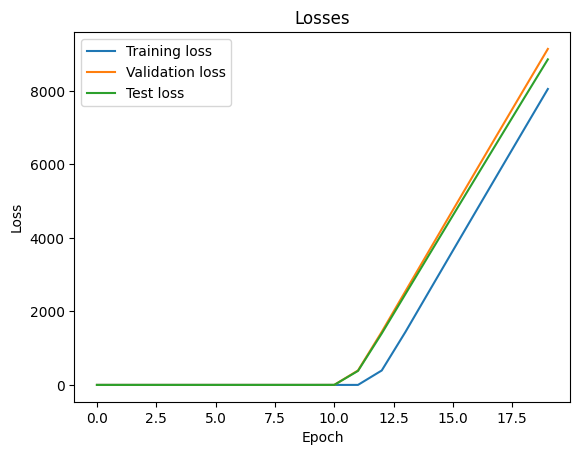

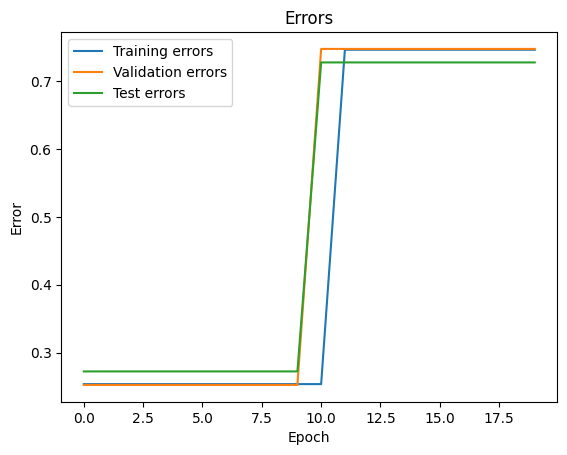

In [ ]:
train_losses, val_losses, test_losses, train_errors, val_errors, test_errors = fletcher_reeeves(num_epochs = 2300)
v_loss(train_losses, val_losses, test_losses)
v_error(train_errors, val_errors, test_errors)

AdaGrad

In [ ]:
def record_weight_updates(optimizer, updates):
    for i, group in enumerate(optimizer.param_groups):
        for j, p in enumerate(group['params']):
            if p.grad is not None:
                param_update = p.grad.data * group['lr']
                updates[i][j].append(param_update.norm().item())

In [ ]:
def train_epoch_adaptive(net, dataloader, criterion, optimizer, device, updates):
    total_loss = 0
    total_error = 0
    for x_batch, y_batch in dataloader:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        y_pred = net(x_batch)
        loss = criterion(y_pred, y_batch)
        total_loss += loss.item()
        total_error += classification_error(y_pred, y_batch)
        loss.backward()
        optimizer.step()
    record_weight_updates(optimizer, updates)
    return total_loss / len(dataloader), total_error / len(dataloader)

In [ ]:
def model_training_adaptive(net,
                   num_epochs,
                   optimizer,
                   train_losses,
                   val_losses,
                   test_losses,
                   train_errors,
                   val_errors,
                   test_errors,
                   updates,
                   train_dataloader=train_dataloader,
                   val_dataloader=val_dataloader,
                   test_dataloader=test_dataloader,
                   criterion=nn.CrossEntropyLoss(),
                   device='cpu'):

    upper_count = 0
    epoch = 0
    while upper_count < 20 and epoch < num_epochs:
      train_result = train_epoch_adaptive(net, train_dataloader, criterion, optimizer, device, updates)
      val_result = eval_net(net, val_dataloader, criterion, device)
      test_result = eval_net(net, test_dataloader, criterion, device)

      train_losses.append(train_result[0])
      train_errors.append(train_result[1])
      val_losses.append(val_result[0])
      val_errors.append(val_result[1])
      test_losses.append(test_result[0])
      test_errors.append(test_result[1])

      if epoch % 100 == 0:
        print(epoch)

      if epoch >= 1 and val_losses[epoch - 1] < val_losses[epoch]:
        upper_count += 1
      else:
        upper_count = 0
      epoch += 1
    return epoch

In [ ]:
def lr_visual(updates, epochs):
  avg_updates = []
  min_updates = []
  max_updates = []
  for epoch in range(epochs):
      all_updates = [update[epoch] for group in updates for update in group]
      avg_updates.append(sum(all_updates) / len(all_updates))
      min_updates.append(min(all_updates))
      max_updates.append(max(all_updates))

  plt.figure(figsize=(9, 9))
  plt.subplot(2, 1, 1)
  for group in updates:
      for update in group:
          plt.plot(range(epochs), update)
  plt.xlabel('Epoch')
  plt.ylabel('Learning rate')
  plt.title('Learning rate at random choice')

  plt.subplot(2, 1, 2)
  plt.plot(range(epochs), avg_updates, label='Average learning rate')
  plt.plot(range(epochs), min_updates, label='Minimum learning rate')
  plt.plot(range(epochs), max_updates, label='Maximum learning rate')
  plt.xlabel('Epoch')
  plt.ylabel('Learning rate')
  plt.title('Min, max, average learning rate')
  plt.legend()

  plt.tight_layout()
  plt.show()

In [ ]:
adg_net = MyNet().to(device)

learning_rate = 0.05
num_epochs = 2000
adg_optimizer = torch.optim.Adagrad(adg_net.parameters(), lr = learning_rate)

adg_train_losses, adg_val_losses, adg_test_losses = [], [], []
adg_train_errors, adg_val_errors, adg_test_errors = [], [], []


updates = [[[] for _ in group['params']] for group in adg_optimizer.param_groups]

epochs = model_training_adaptive(adg_net, num_epochs, adg_optimizer, adg_train_losses, adg_val_losses, adg_test_losses, adg_train_errors, adg_val_errors, adg_test_errors, updates)
print('simple gd: lr = {}, epochs = {}, train_error = {}, test_error = {}'.format(learning_rate, epochs, train_errors[-1], test_errors[-1]))

0
100
200
300
400
500
600
700
800
simple gd: lr = 0.05, epochs = 821, train_error = 0.2534120250829952, test_error = 0.2721238938053097


In [ ]:
len(updates[0][0])

821

In [ ]:
adg_optimizer.param_groups

[{'params': [Parameter containing:
   tensor([[-0.0140, -0.4148, -0.1493,  ...,  1.5715,  1.3481,  1.2470],
           [ 0.3717, -0.2277,  0.6406,  ..., -0.9787, -0.9284, -1.2156],
           [-0.0024,  0.2855,  0.5289,  ..., -0.6227, -0.7794, -0.7971],
           ...,
           [ 0.1838,  0.2792,  0.3742,  ..., -0.8261, -0.8392, -0.9032],
           [ 0.5028, -0.0550, -0.5723,  ...,  0.1238,  0.2078,  0.4616],
           [-0.5935, -0.5298,  1.1482,  ...,  1.0059,  1.1927,  0.7876]],
          requires_grad=True),
   Parameter containing:
   tensor([-0.2032,  0.1703,  0.1565, -0.2067, -0.1469, -0.2899,  0.2298, -0.0899,
            0.1443,  0.2649, -0.2719, -0.2155,  0.2965,  0.1436,  0.1462, -0.4598,
            0.2976,  0.0965, -0.2185, -0.2037], requires_grad=True),
   Parameter containing:
   tensor([[-0.5786,  0.2106,  0.3121, -0.3647, -0.3742, -0.8706,  0.5593, -0.5936,
             0.7508,  0.7152, -0.7882, -0.1611,  0.4950,  0.5627,  0.5473, -1.1139,
             0.9141,  0.79

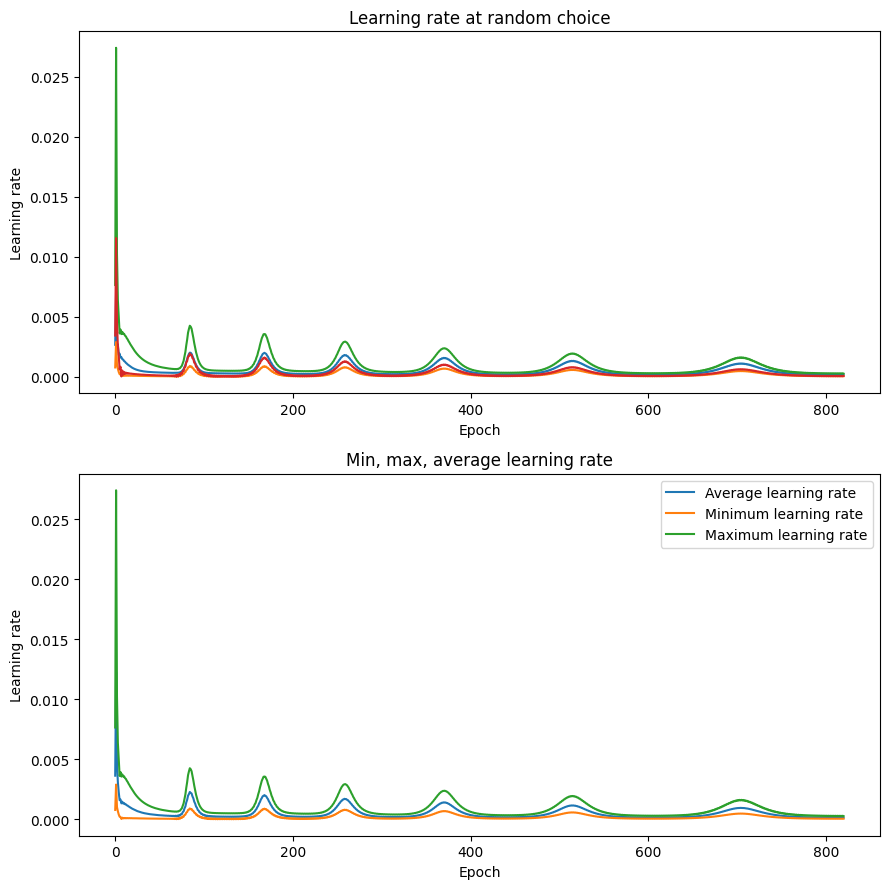

In [ ]:
lr_visual(updates, epochs)

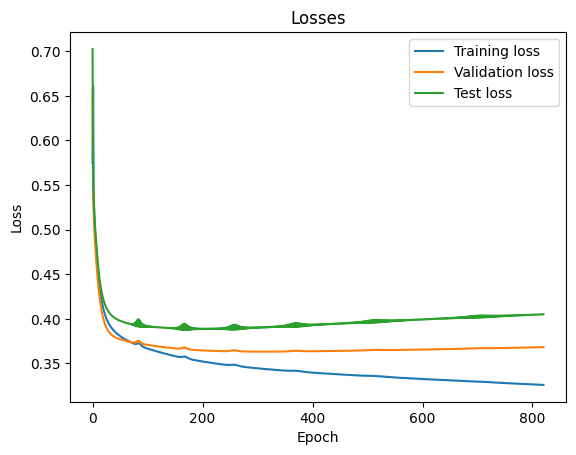

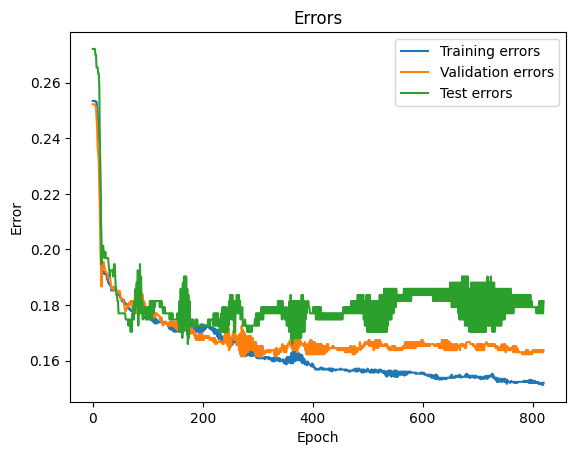

In [ ]:
v_loss(adg_train_losses, adg_val_losses, adg_test_losses)
v_error(adg_train_errors, adg_val_errors, adg_test_errors)

#### RMSProp и AdaDelta

In [ ]:
def RMSProp(learning_rate = 0.2, alpha=0, num_epochs = 2000):

  net = MyNet().to(device)

  optimizer = torch.optim.RMSprop(net.parameters(), lr=learning_rate, alpha=alpha)

  train_losses, val_losses, test_losses = [], [], []
  train_errors, val_errors, test_errors = [], [], []

  #num_epochs = 5000

  updates_ = [[[] for _ in group['params']] for group in optimizer.param_groups]

  epochs = model_training_adaptive(net, num_epochs, optimizer, train_losses, val_losses, test_losses, train_errors, val_errors, test_errors, updates_)

  print('simple gd: lr = {}, epochs = {}, train_error = {}, test_error = {}'.format(learning_rate, epochs, train_errors[-1], test_errors[-1]))

  lr_visual(updates_, epochs)
  v_loss(train_losses, val_losses, test_losses)
  v_error(train_errors, val_errors, test_errors)
  print(train_errors[-1], test_errors[-1])

0
100
200
300
400
500
600
700
800
simple gd: lr = 0.001, epochs = 875, train_error = 0.15603098487642936, test_error = 0.17920353982300885


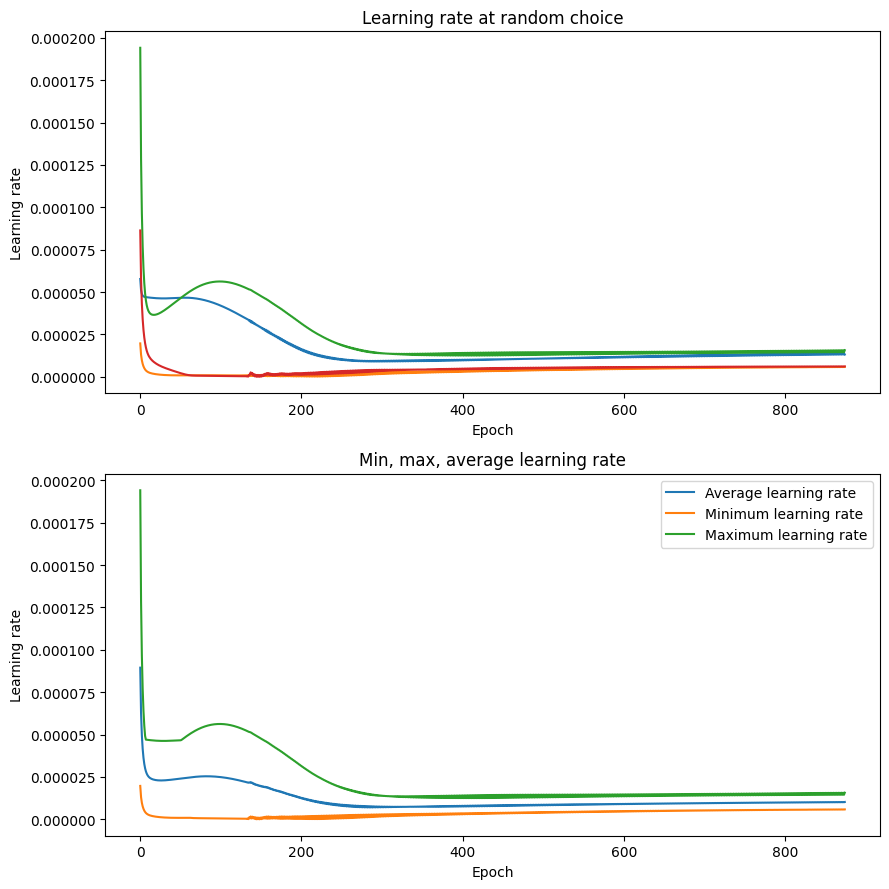

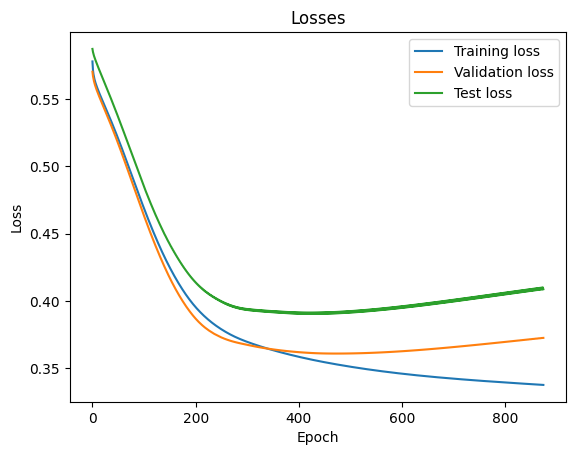

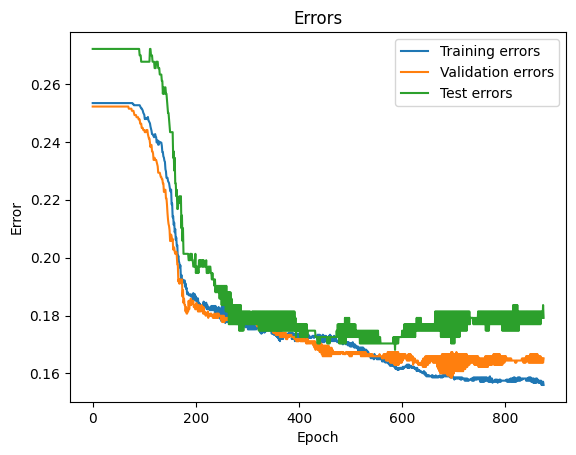

0.15603098487642936 0.17920353982300885


In [ ]:
RMSProp(learning_rate = 0.001, alpha=0.9, num_epochs = 2000)

0
100
200
300
400
simple gd: lr = 0.001, epochs = 490, train_error = 0.17115455551457026, test_error = 0.1747787610619469


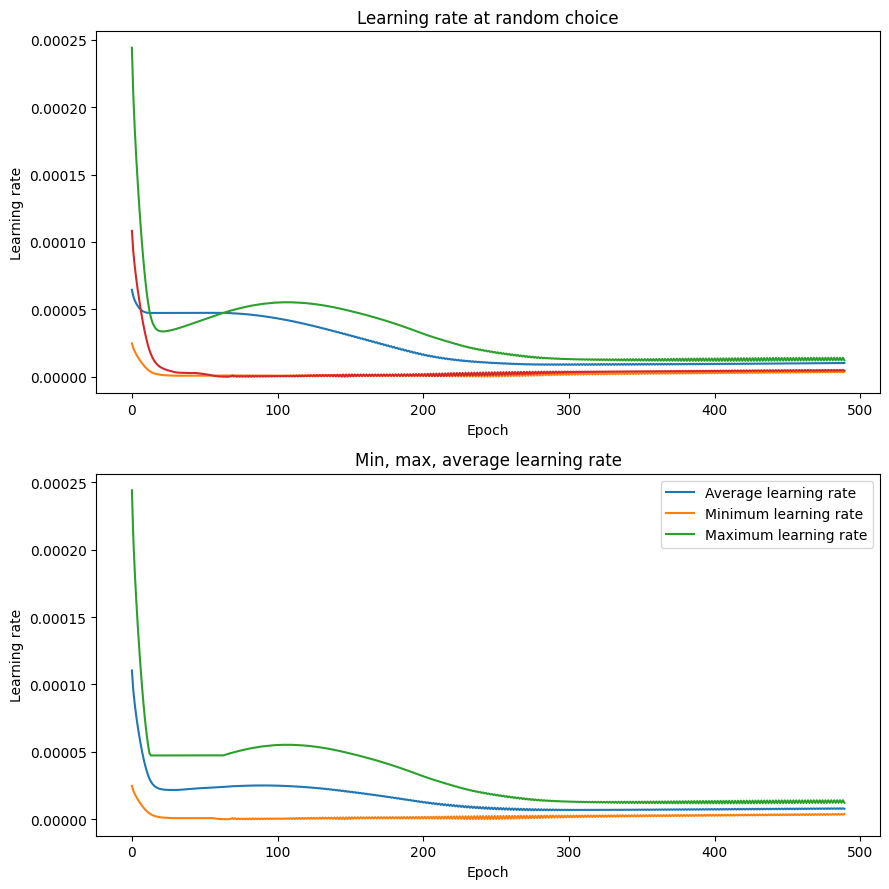

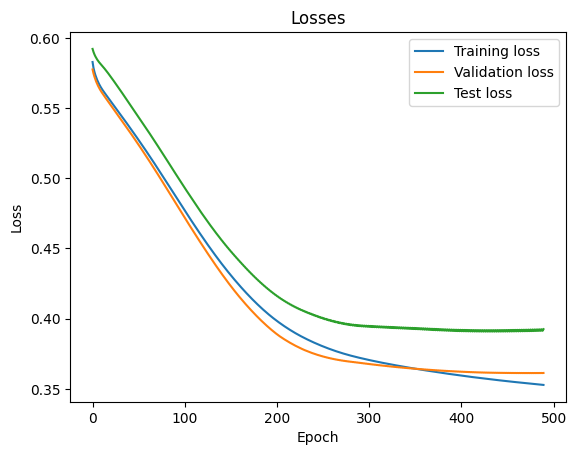

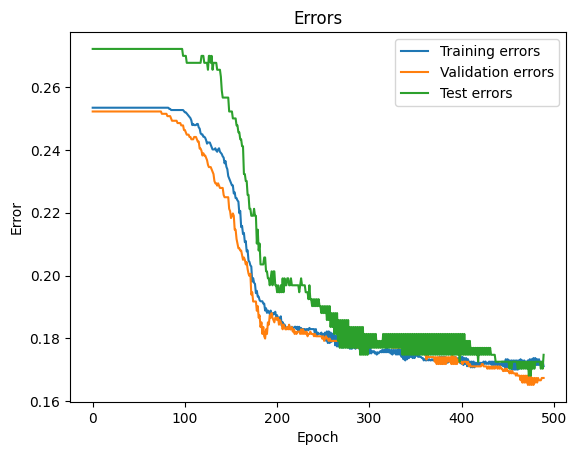

0.17115455551457026 0.1747787610619469


In [ ]:
RMSProp(learning_rate = 0.001, alpha=0.6, num_epochs = 490)

0
100
200
300
400
simple gd: lr = 0.001, epochs = 405, train_error = 0.17447436370343047, test_error = 0.18141592920353983


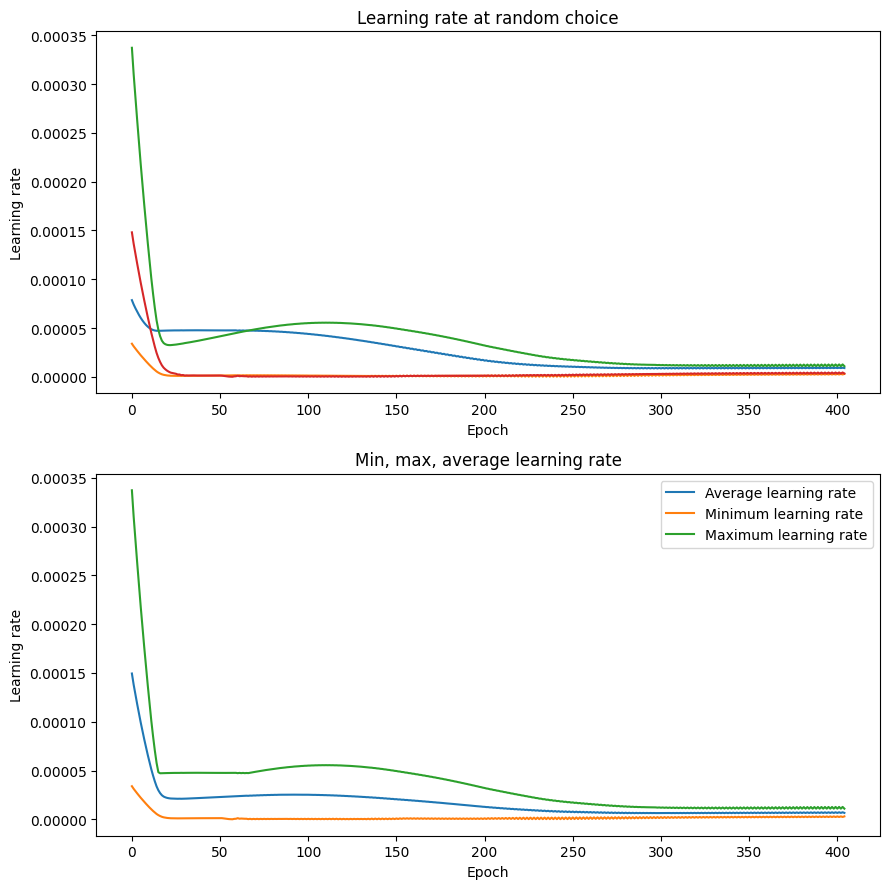

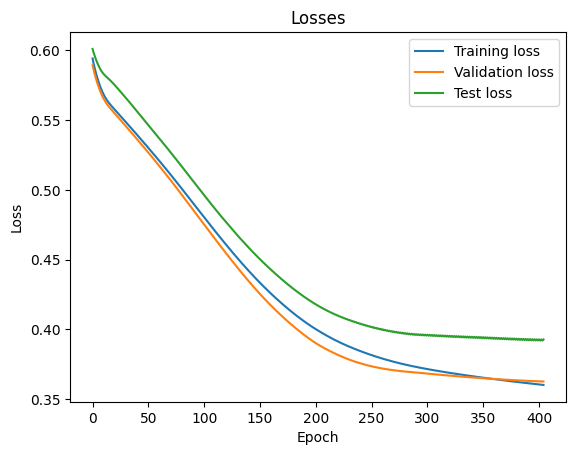

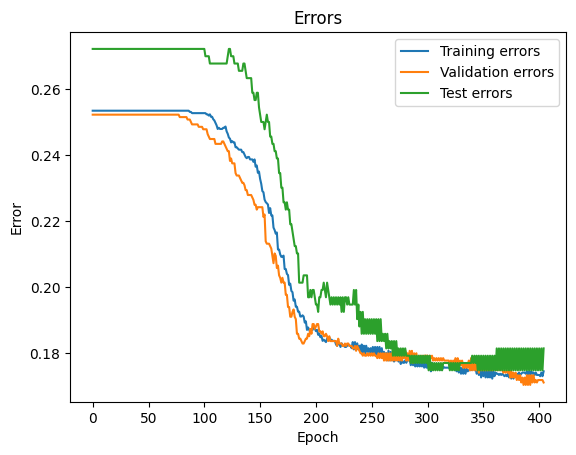

0.17447436370343047 0.18141592920353983


In [ ]:
RMSProp(learning_rate = 0.001, alpha=0.2, num_epochs = 405)

0
100
200
300
400
simple gd: lr = 0.001, epochs = 410, train_error = 0.17410549612689044, test_error = 0.1747787610619469


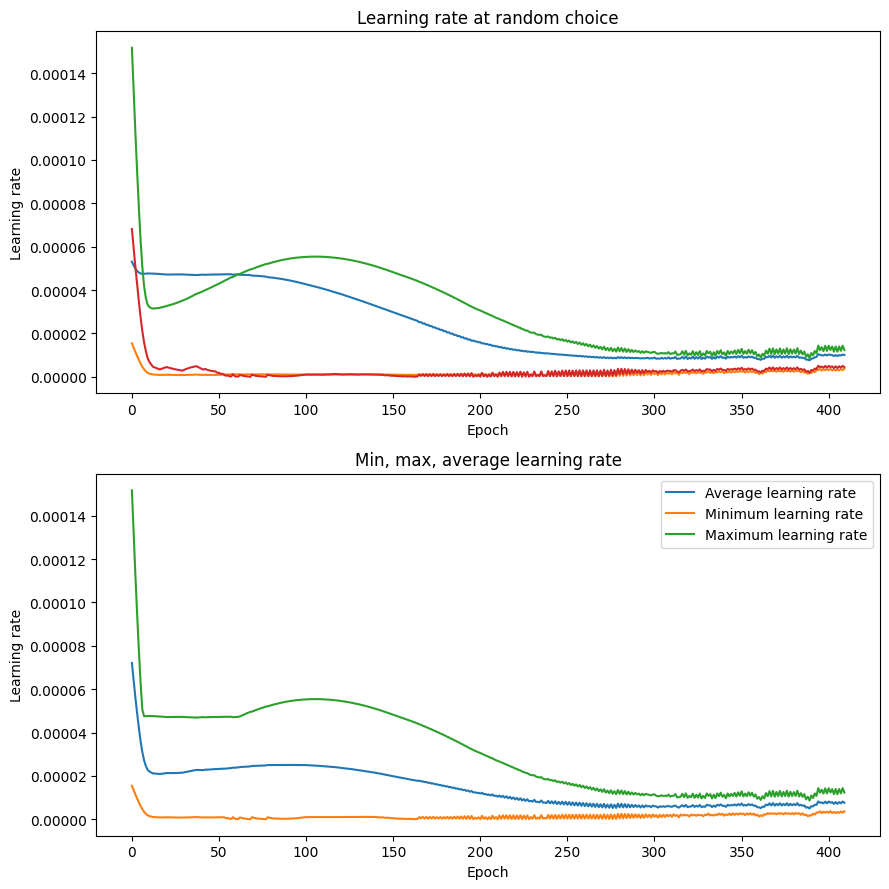

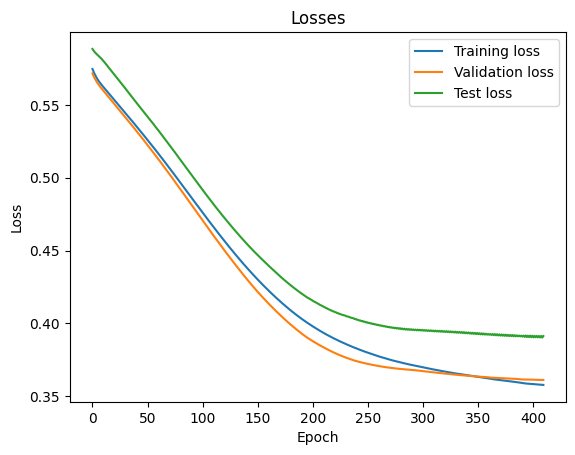

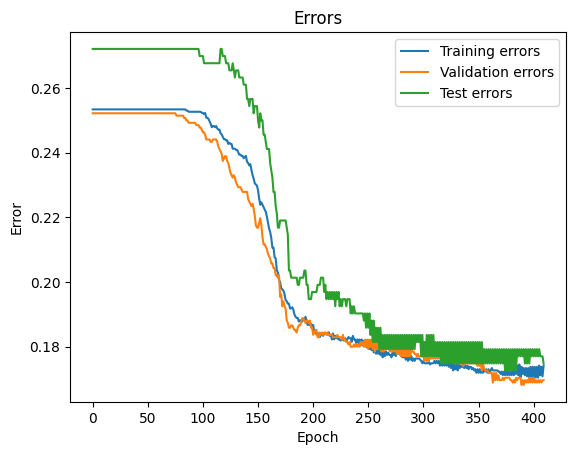

0.17410549612689044 0.1747787610619469


In [ ]:
RMSProp(learning_rate = 0.001, alpha=0.0, num_epochs = 410)

In [ ]:
def Adadelta(learning_rate = 0.2, alpha=0, num_epochs = 2000):

  net = MyNet().to(device)

  optimizer = torch.optim.Adadelta(net.parameters(), lr=learning_rate, rho=alpha)
  train_losses, val_losses, test_losses = [], [], []
  train_errors, val_errors, test_errors = [], [], []

  #num_epochs = 5000

  updates_ = [[[] for _ in group['params']] for group in optimizer.param_groups]

  epochs = model_training_adaptive(net, num_epochs, optimizer, train_losses, val_losses, test_losses, train_errors, val_errors, test_errors, updates_)

  print('simple gd: lr = {}, epochs = {}, train_error = {}, test_error = {}'.format(learning_rate, epochs, train_errors[-1], test_errors[-1]))

  lr_visual(updates_, epochs)
  v_loss(train_losses, val_losses, test_losses)
  v_error(train_errors, val_errors, test_errors)
  print(train_errors[-1], test_errors[-1])

0
100
200
300
400
500
600
700
800
simple gd: lr = 0.5, epochs = 810, train_error = 0.1648838067133899, test_error = 0.17035398230088494


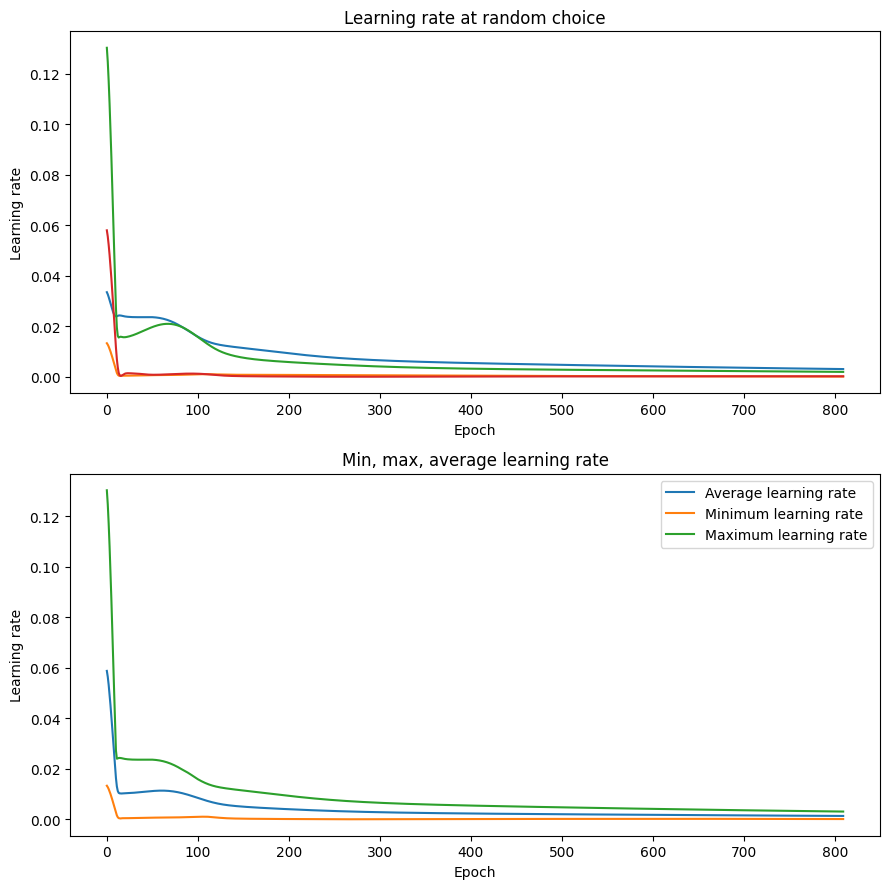

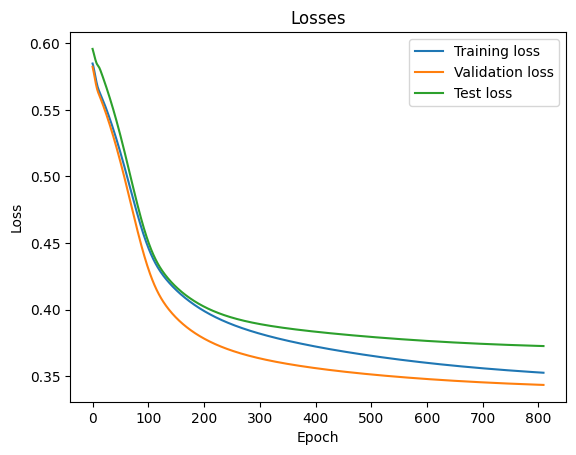

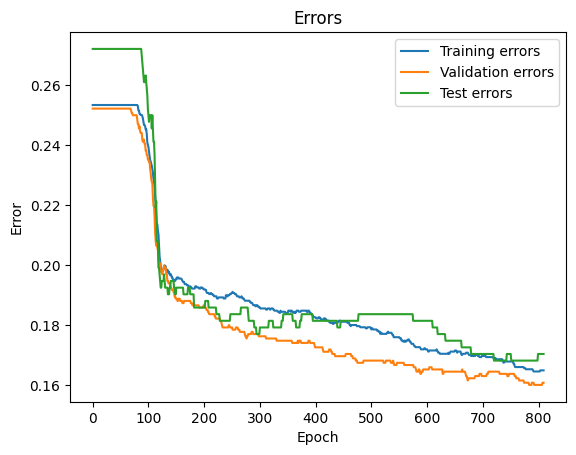

0.1648838067133899 0.17035398230088494


In [ ]:
Adadelta(learning_rate = 0.5, alpha=0.0, num_epochs = 810)

0
100
200
300
400
500
600
700
800
simple gd: lr = 0.5, epochs = 820, train_error = 0.16414607156030986, test_error = 0.17035398230088494


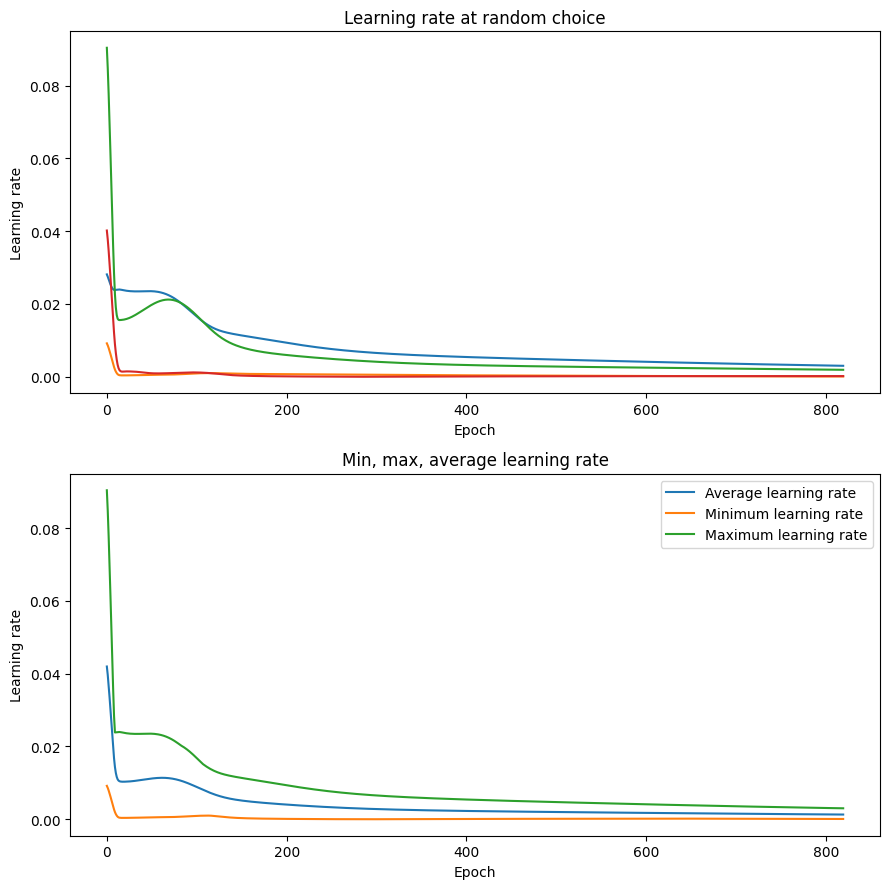

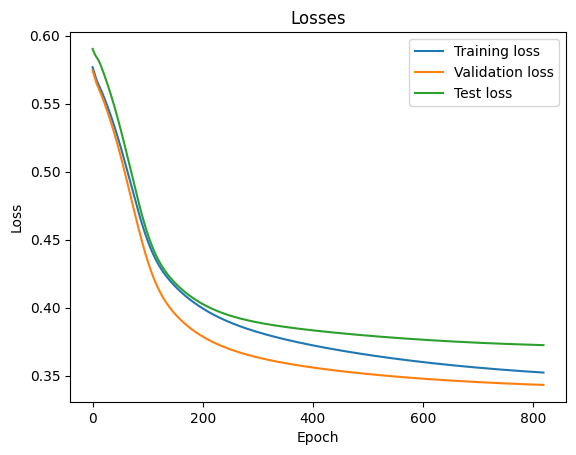

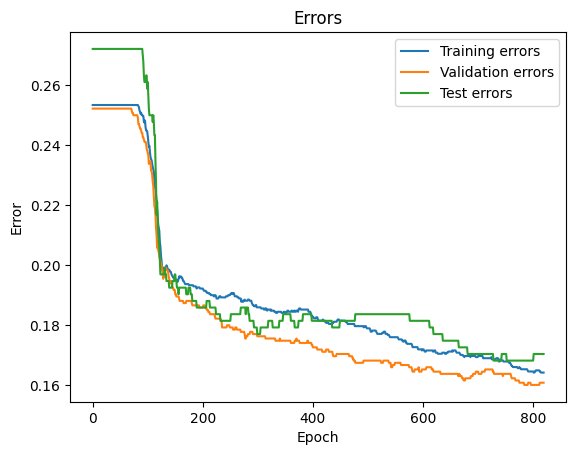

0.16414607156030986 0.17035398230088494


In [ ]:
Adadelta(learning_rate = 0.5, alpha=0.2, num_epochs = 820)

0
100
200
300
400
500
600
700
800
900
simple gd: lr = 0.5, epochs = 1000, train_error = 0.16193286610106972, test_error = 0.1747787610619469


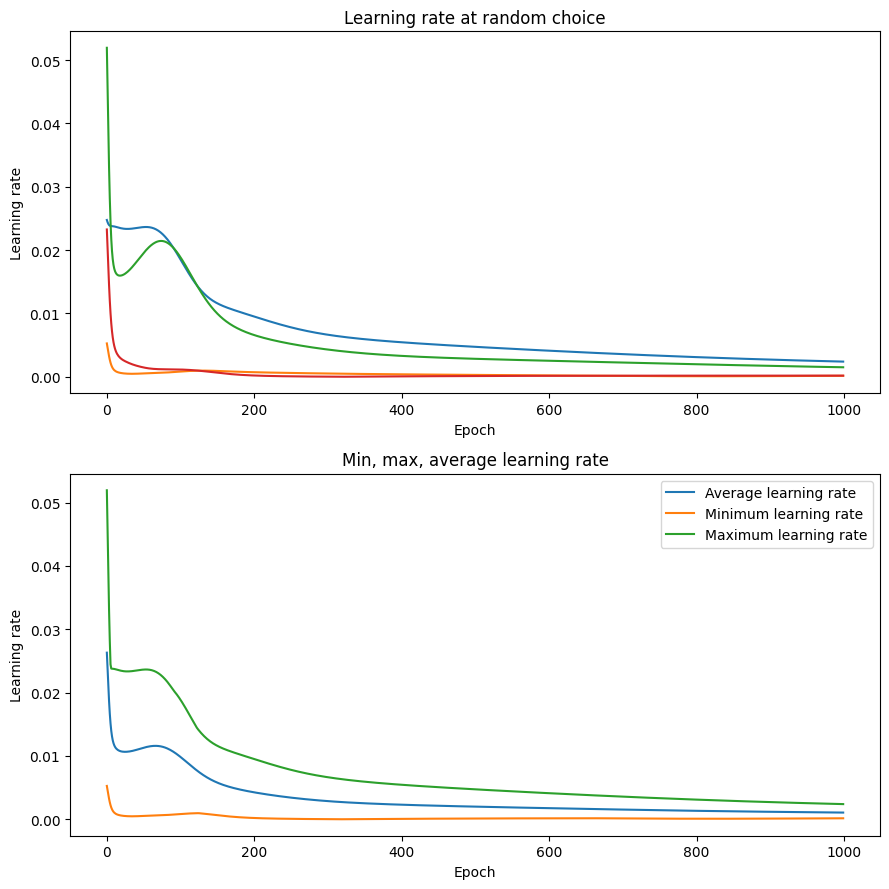

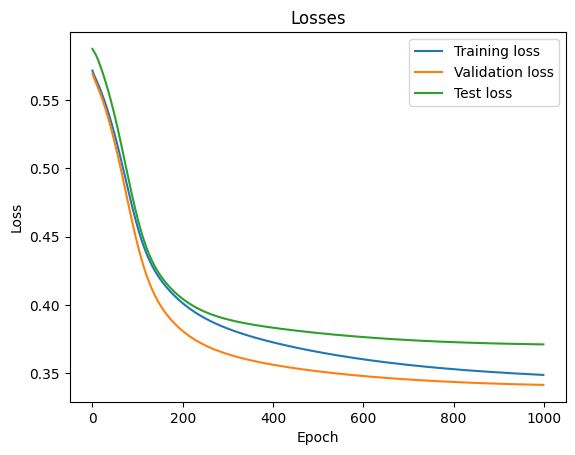

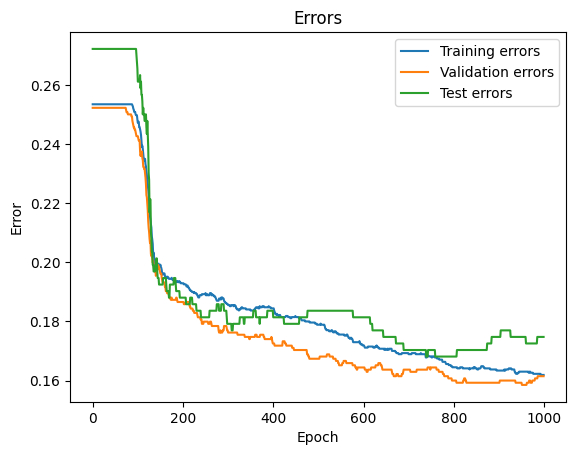

0.16193286610106972 0.1747787610619469


In [ ]:
Adadelta(learning_rate = 0.5, alpha=0.6, num_epochs = 1000)

0
100
200
300
400
500
600
700
800
900
1000
simple gd: lr = 0.5, epochs = 1050, train_error = 0.1634083364072298, test_error = 0.1747787610619469


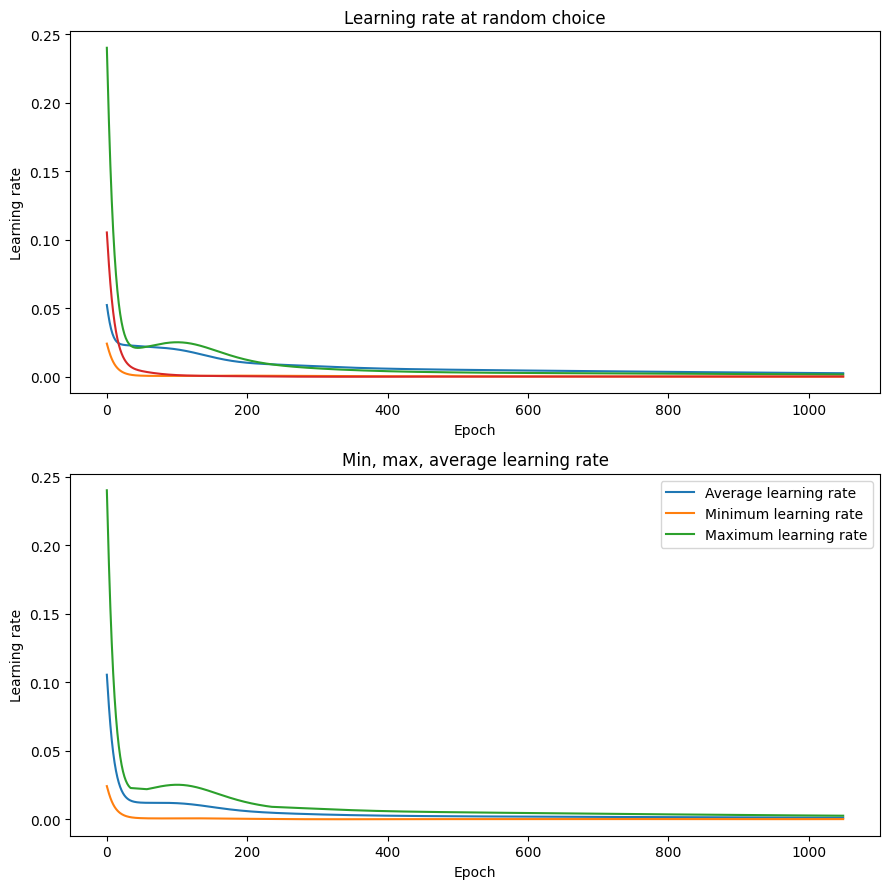

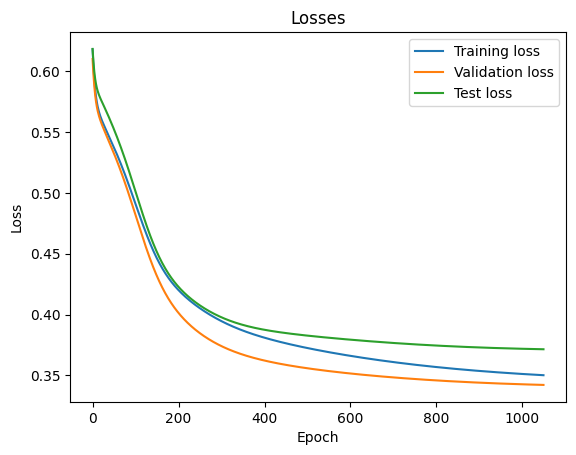

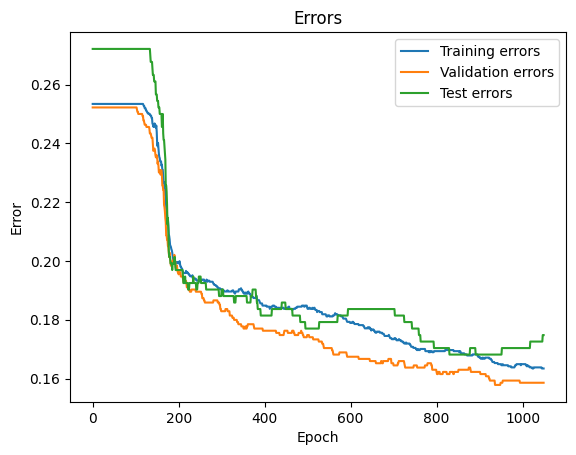

0.1634083364072298 0.1747787610619469


In [ ]:
Adadelta(learning_rate = 0.5, alpha=0.9, num_epochs = 1050)

#### Adam

In [ ]:
def Adam(learning_rate = 0.2, beta1 = 0.9, beta2 = 0.999, num_epochs = 2000):

  net = MyNet().to(device)

  optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate, betas=(beta1,beta2))

  train_losses, val_losses, test_losses = [], [], []
  train_errors, val_errors, test_errors = [], [], []

  #num_epochs = 5000

  updates_ = [[[] for _ in group['params']] for group in optimizer.param_groups]

  epochs = model_training_adaptive(net, num_epochs, optimizer, train_losses, val_losses, test_losses, train_errors, val_errors, test_errors, updates_)

  print('simple gd: lr = {}, epochs = {}, train_error = {}, test_error = {}'.format(learning_rate, epochs, train_errors[-1], test_errors[-1]))

  lr_visual(updates_, epochs)
  v_loss(train_losses, val_losses, test_losses)
  v_error(train_errors, val_errors, test_errors)
  print(train_errors[-1], test_errors[-1])

0
100
simple gd: lr = 0.5, epochs = 150, train_error = 0.1516045739579491, test_error = 0.17256637168141592


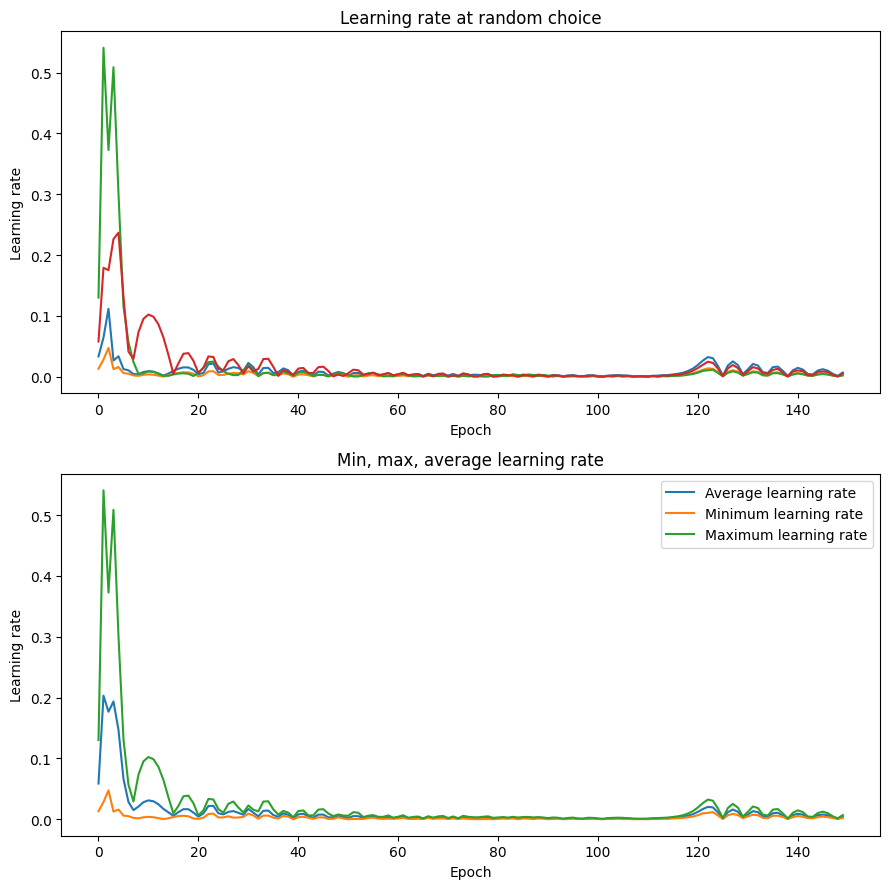

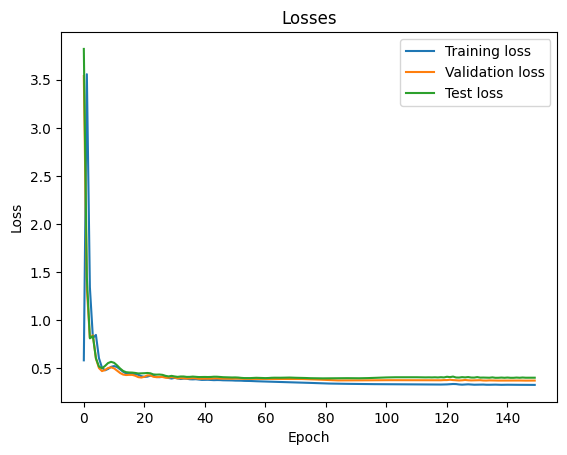

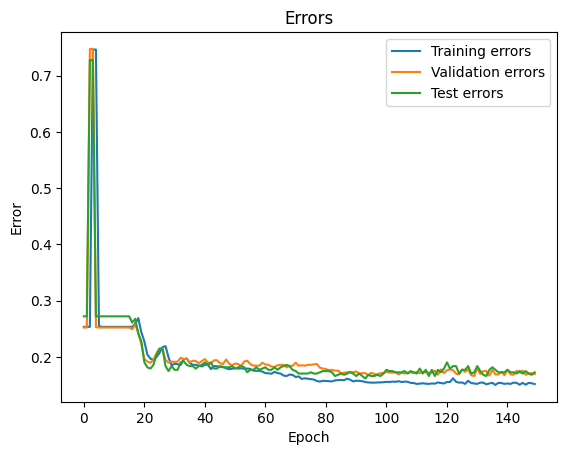

0.1516045739579491 0.17256637168141592


In [ ]:
Adam(learning_rate = 0.5, beta1 = 0.9, beta2 =  0.999, num_epochs = 150)

0
100
200
300
400
500
600
700
800
900
simple gd: lr = 0.5, epochs = 1000, train_error = 0.14865363334562892, test_error = 0.18805309734513273


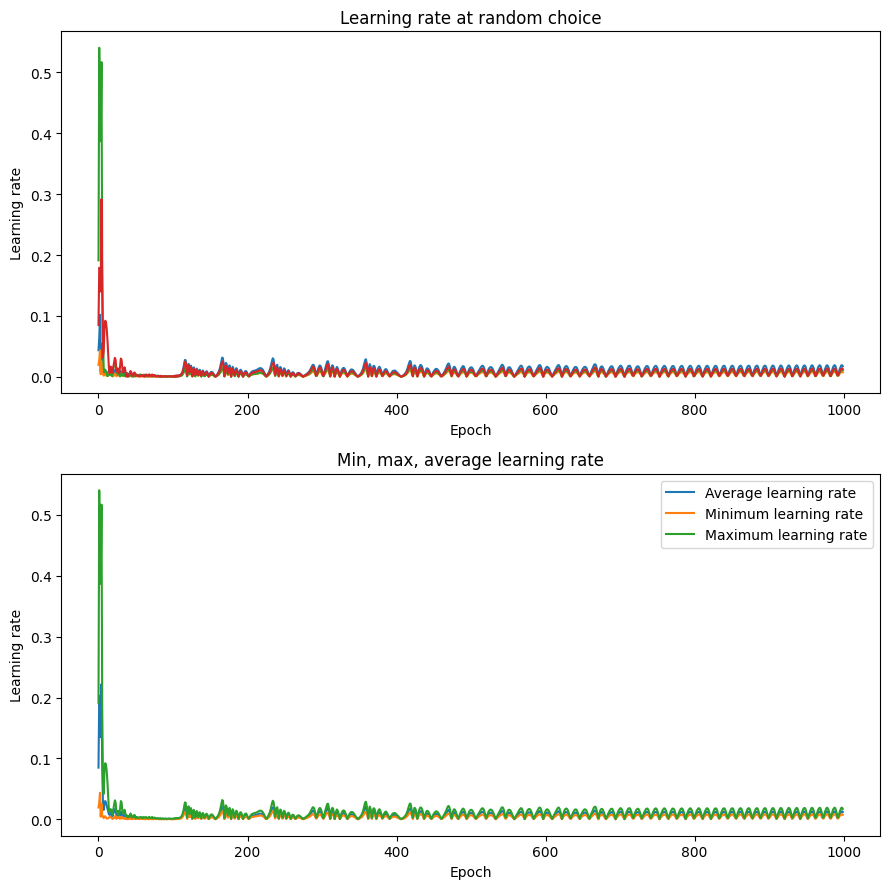

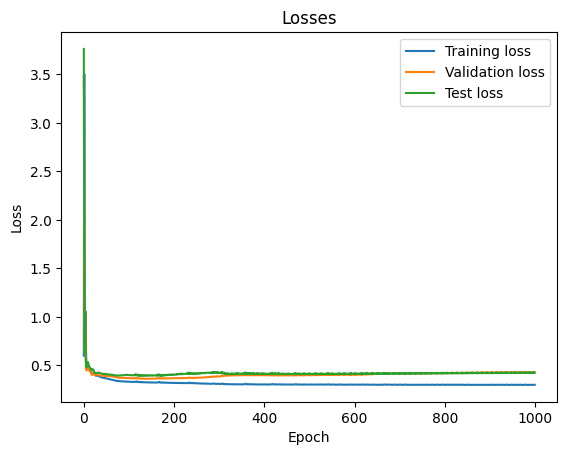

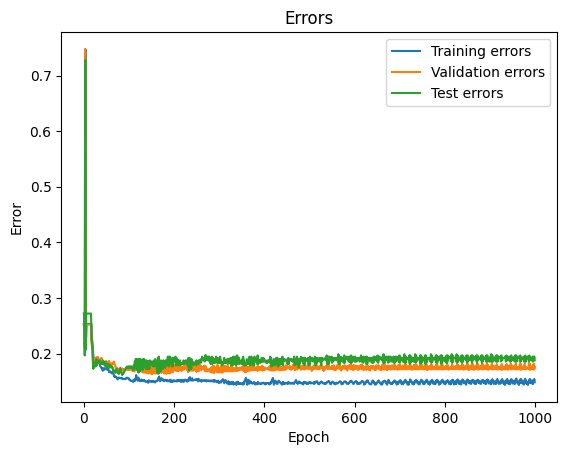

0.14865363334562892 0.18805309734513273


In [ ]:
Adam(learning_rate = 0.5, beta1 = 0.9, beta2 =  0.999, num_epochs = 1000)

0
simple gd: lr = 0.5, epochs = 100, train_error = 0.1519734415344891, test_error = 0.17920353982300885


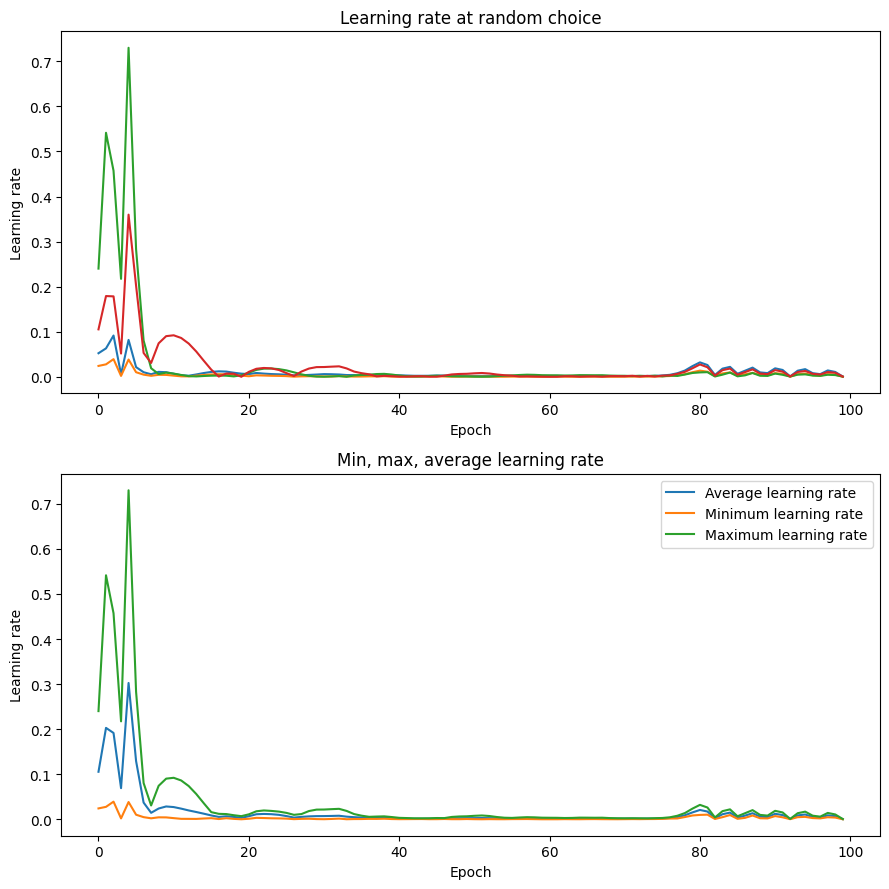

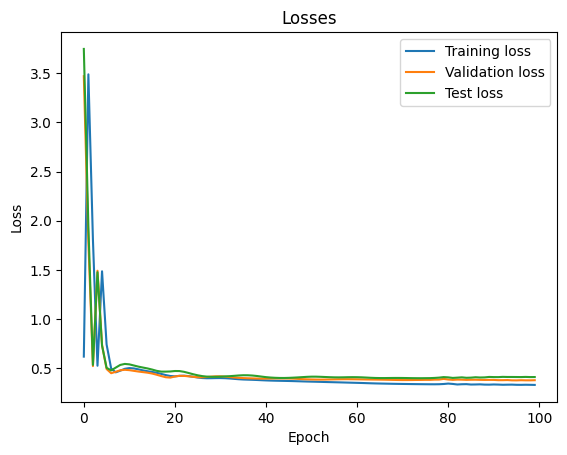

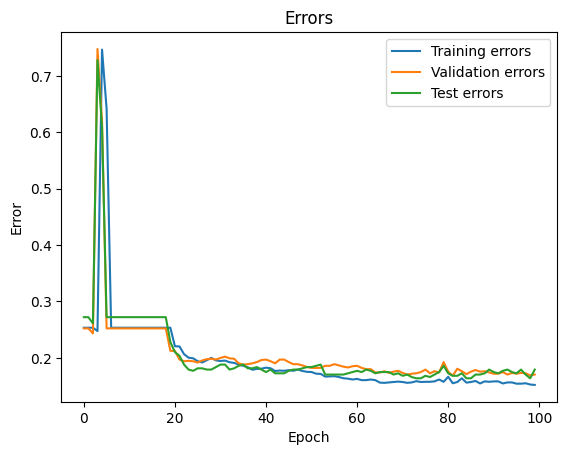

0.1519734415344891 0.17920353982300885


In [ ]:
Adam(learning_rate = 0.5, beta1 = 0.9, beta2 =  0.998, num_epochs = 100)

0
simple gd: lr = 0.5, epochs = 100, train_error = 0.2032460346735522, test_error = 0.2013274336283186


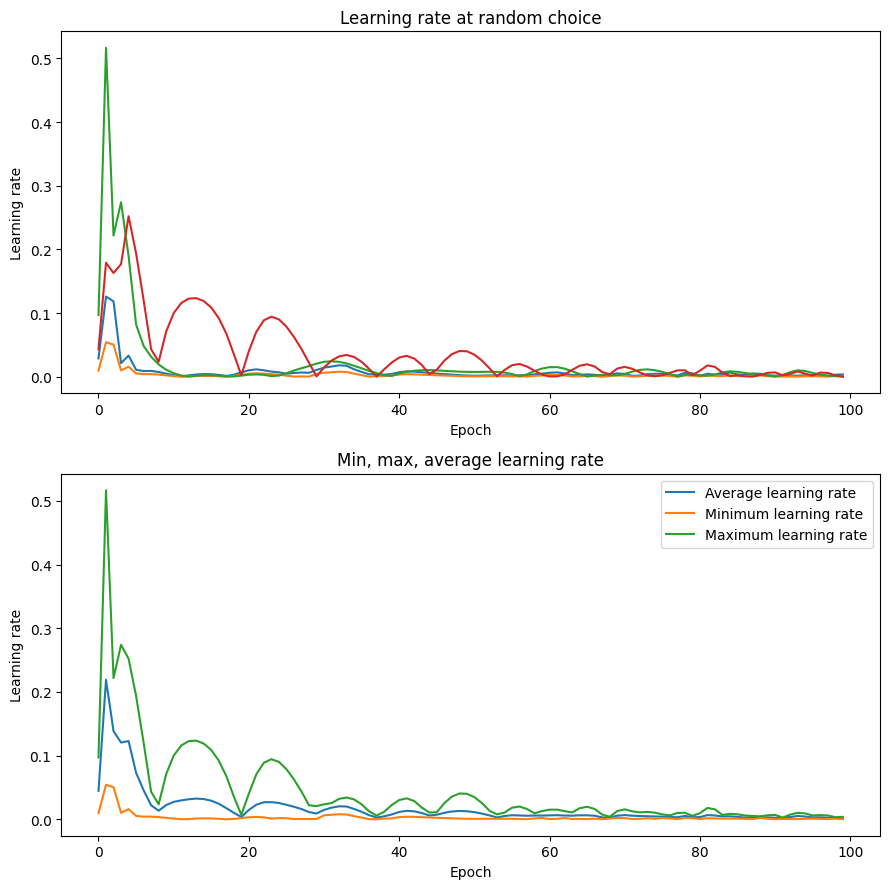

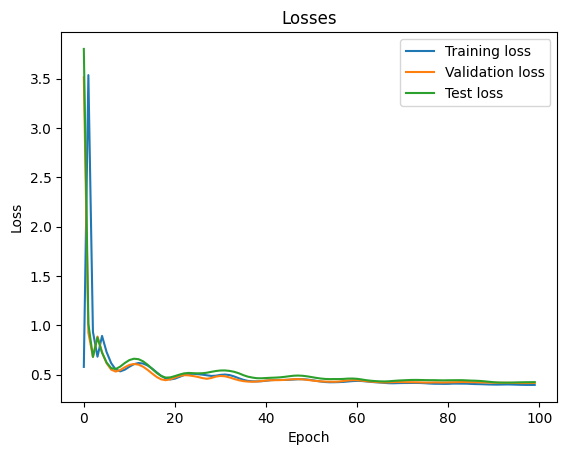

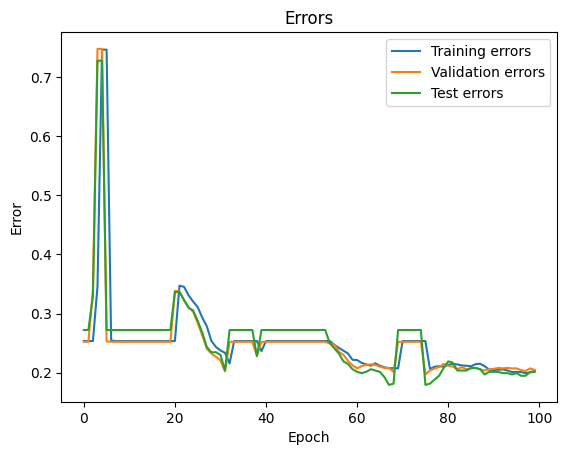

0.2032460346735522 0.2013274336283186


In [ ]:
Adam(learning_rate = 0.5, beta1 = 0.95, beta2 =  0.9, num_epochs = 100)

0
simple gd: lr = 0.5, epochs = 40, train_error = 0.2534120250829952, test_error = 0.2721238938053097


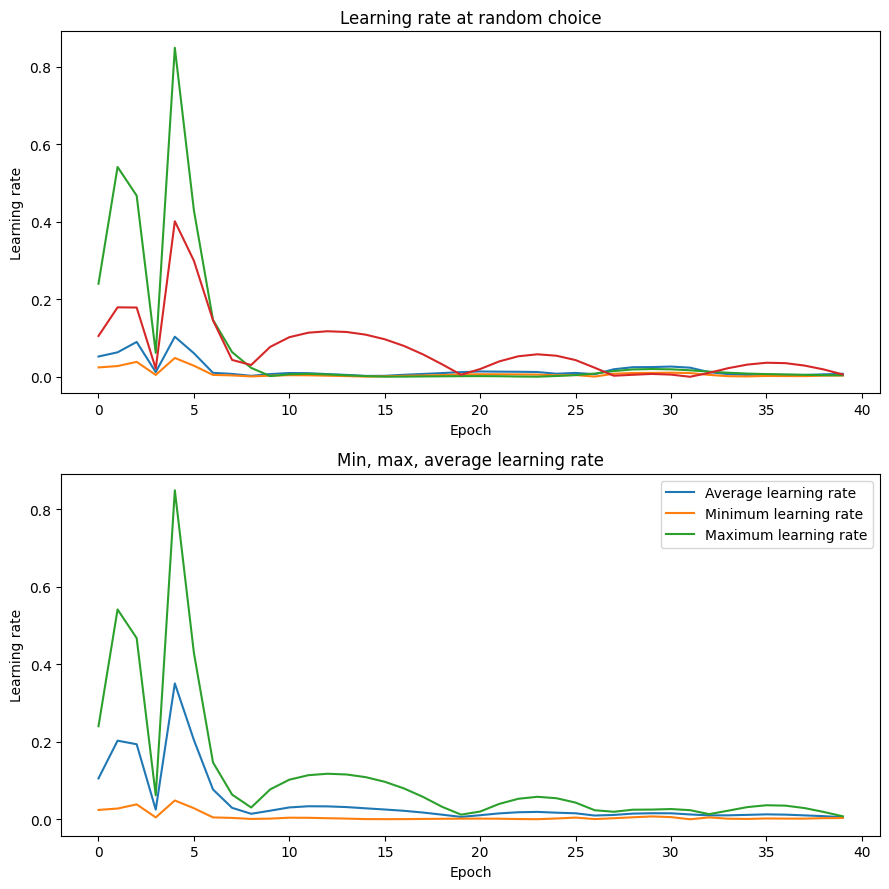

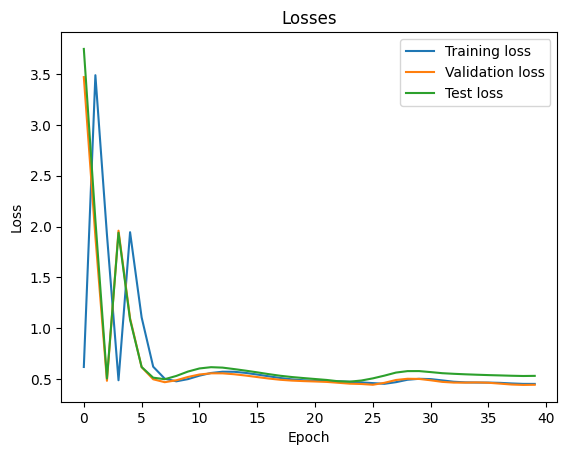

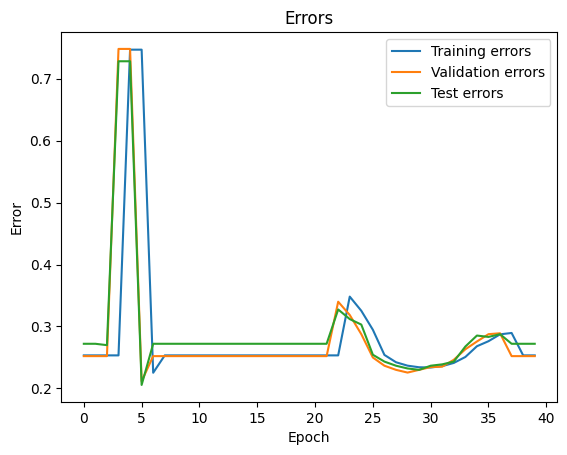

0.2534120250829952 0.2721238938053097


In [ ]:
Adam(learning_rate = 0.5, beta1 = 0.95, beta2 =  0.9, num_epochs = 40)

0
simple gd: lr = 0.5, epochs = 80, train_error = 0.150129103651789, test_error = 0.18141592920353983


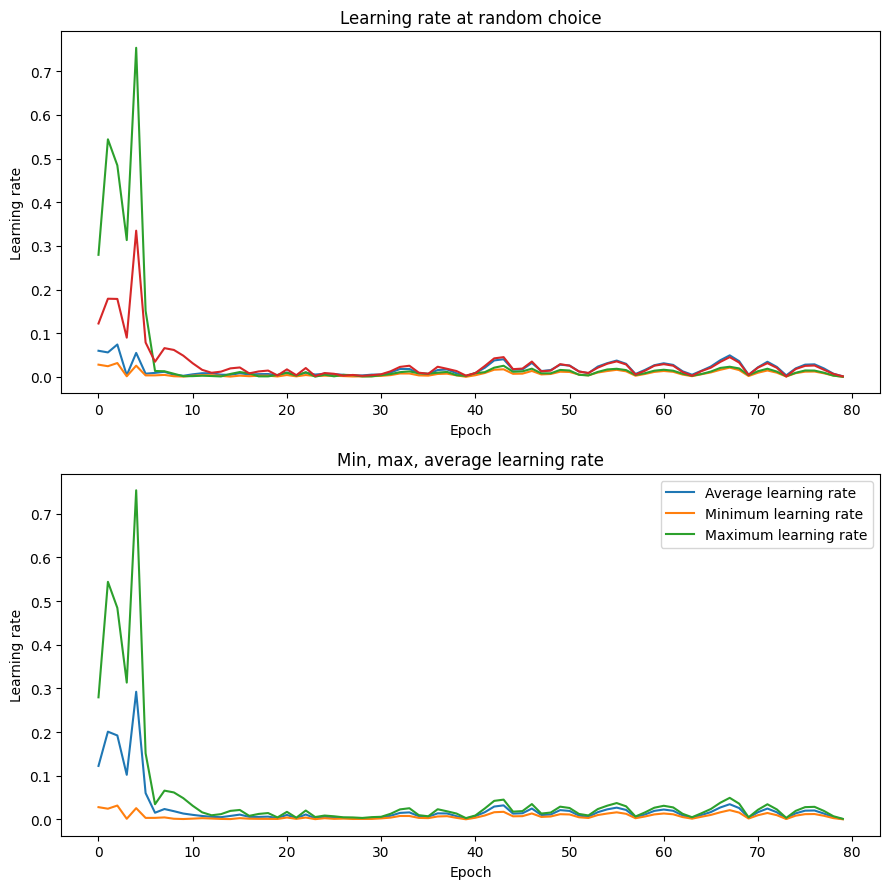

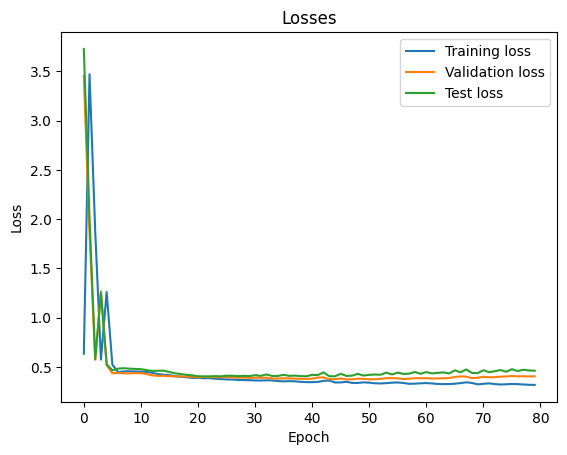

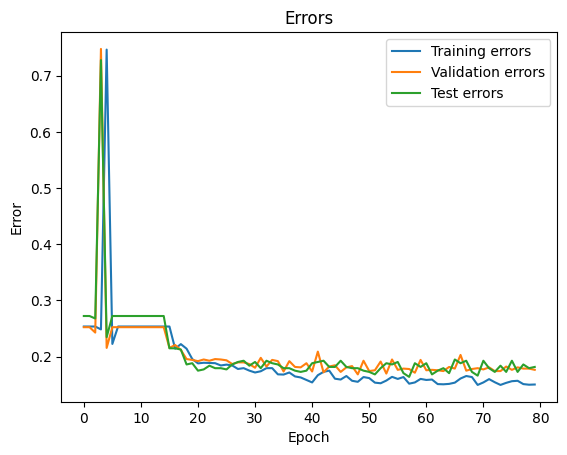

0.150129103651789 0.18141592920353983


In [ ]:
Adam(learning_rate = 0.5, beta1 = 0.8, beta2 =  0.9, num_epochs = 80)

0
simple gd: lr = 0.5, epochs = 100, train_error = 0.1519734415344891, test_error = 0.18805309734513273


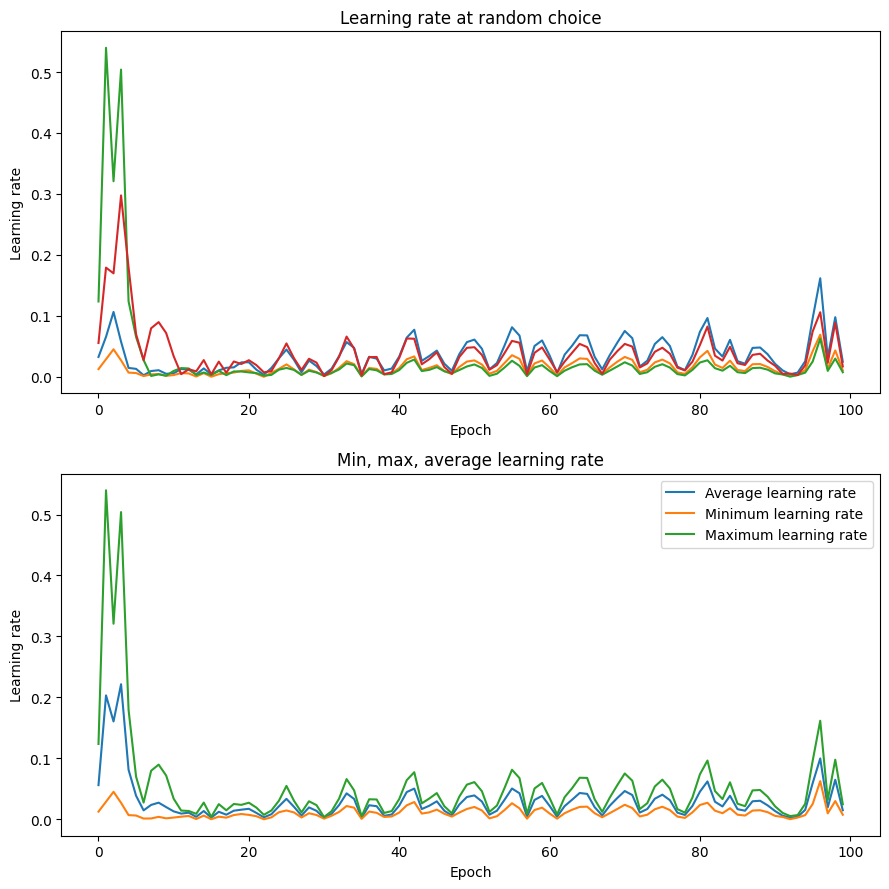

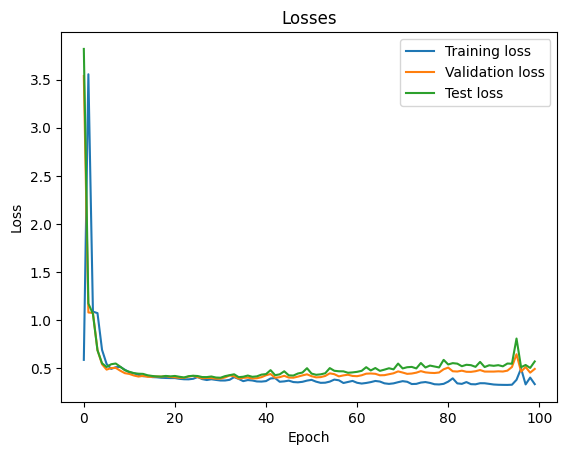

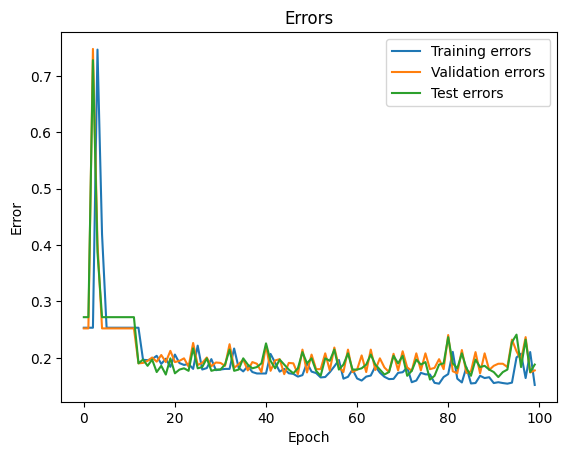

0.1519734415344891 0.18805309734513273


In [ ]:
Adam(learning_rate = 0.5, beta1 = 0.7, beta2 =  0.8, num_epochs = 100)

0
simple gd: lr = 0.5, epochs = 30, train_error = 0.22574695684249355, test_error = 0.18141592920353983


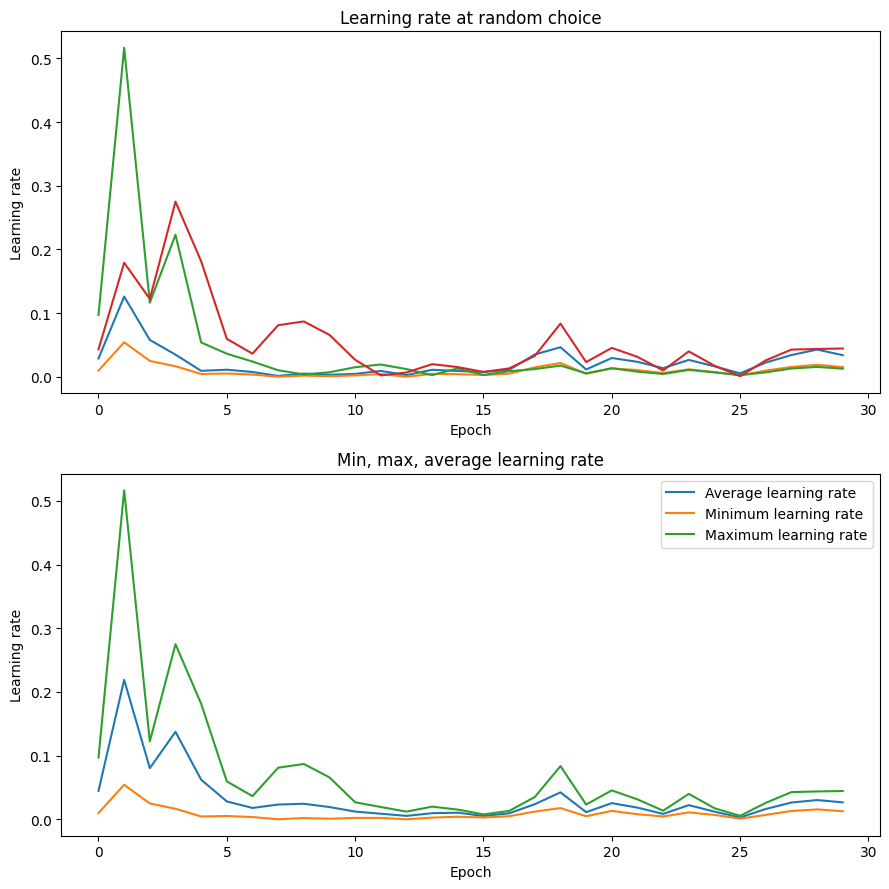

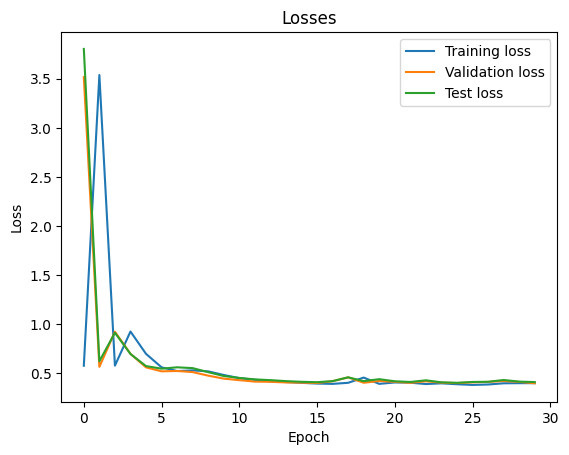

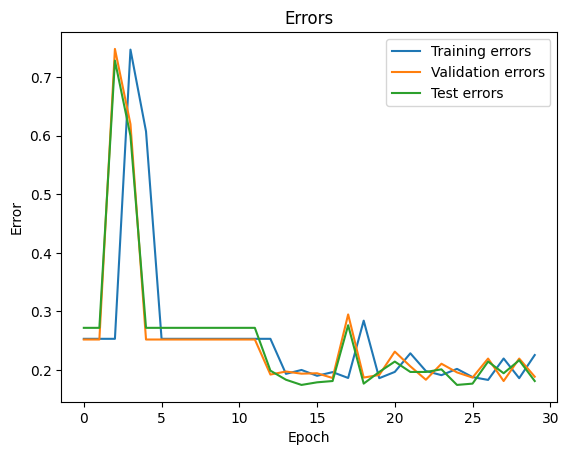

0.22574695684249355 0.18141592920353983


In [ ]:
Adam(learning_rate = 0.5, beta1 = 0.6, beta2 =  0.9, num_epochs = 30)

#### RProp

In [ ]:
def RProp(learning_rate = 0.2, num_epochs = 2000):

  net = MyNet().to(device)

  optimizer =  torch.optim.Rprop(net.parameters(), lr=learning_rate)

  train_losses, val_losses, test_losses = [], [], []
  train_errors, val_errors, test_errors = [], [], []

  #num_epochs = 5000

  updates_ = [[[] for _ in group['params']] for group in optimizer.param_groups]

  epochs = model_training_adaptive(net, num_epochs, optimizer, train_losses, val_losses, test_losses, train_errors, val_errors, test_errors, updates_)

  print('simple gd: lr = {}, epochs = {}, train_error = {}, test_error = {}'.format(learning_rate, epochs, train_errors[-1], test_errors[-1]))

  lr_visual(updates_, epochs)
  v_loss(train_losses, val_losses, test_losses)
  v_error(train_errors, val_errors, test_errors)
  print(train_errors[-1], test_errors[-1])

0
simple gd: lr = 0.5, epochs = 19, train_error = 0.22869789745481373, test_error = 0.23672566371681417


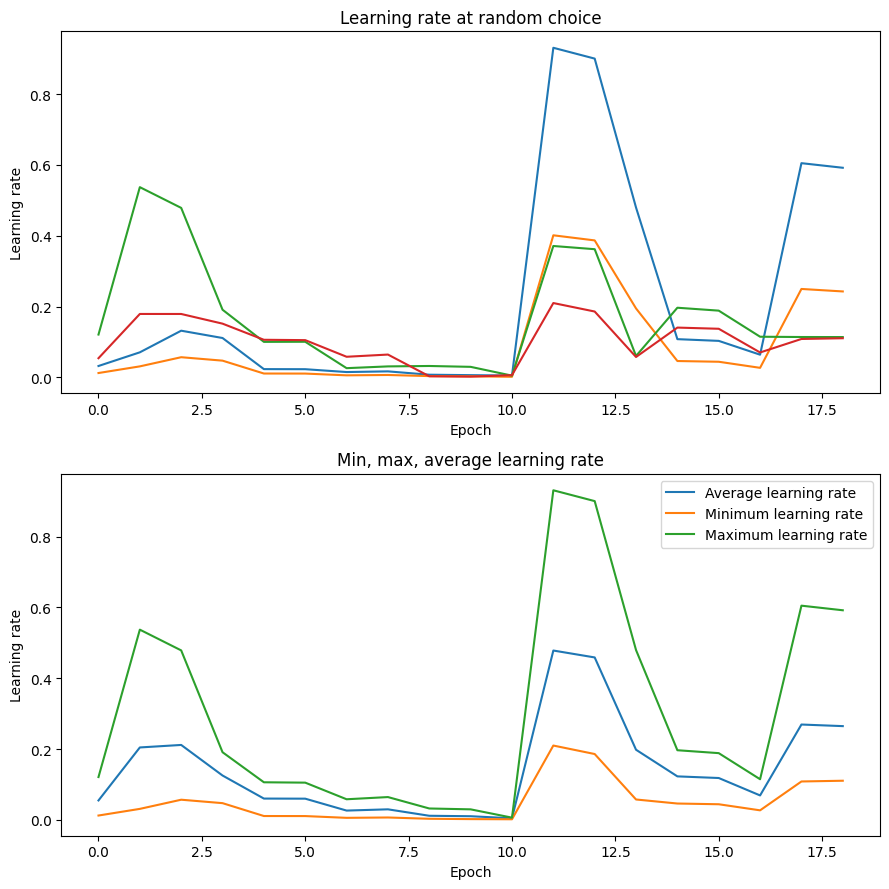

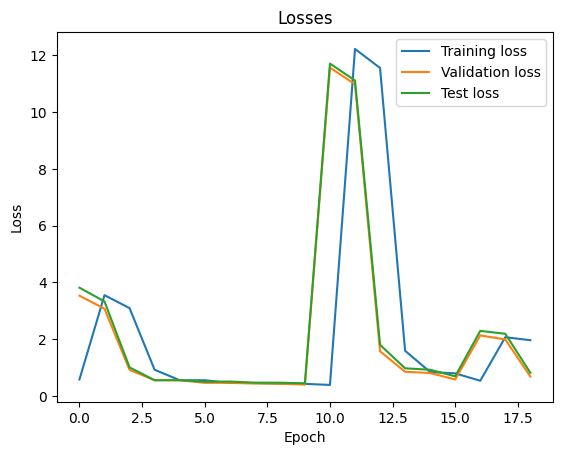

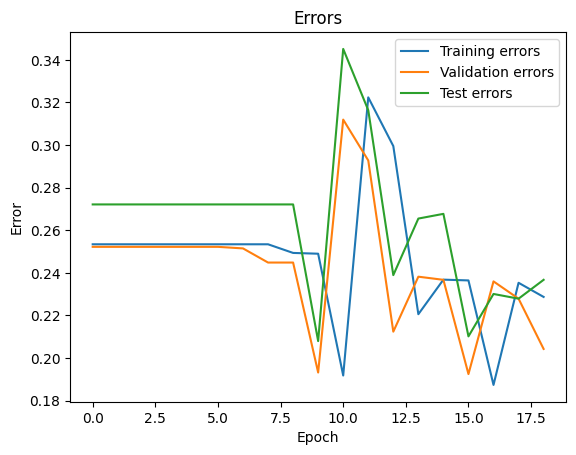

0.22869789745481373 0.23672566371681417


In [ ]:
RProp(learning_rate = 0.5,num_epochs = 19)

#### Исследование метода стохастического градиента

In [ ]:
def train_epoch(net, dataloader, criterion, optimizer, device):
    total_loss = 0
    total_error = 0
    for x_batch, y_batch in dataloader:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        y_pred = net(x_batch)
        loss = criterion(y_pred, y_batch)
        total_loss += loss.item()
        total_error += classification_error(y_pred, y_batch)
        loss.backward()
        optimizer.step()
    return total_loss / len(dataloader), total_error / len(dataloader)

def eval_net(net, dataloader, criterion, device):
    net.eval()
    total_loss = 0
    total_error = 0
    with torch.no_grad():
        for x_batch, y_batch in dataloader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            y_pred = net(x_batch)
            loss = criterion(y_pred, y_batch)
            total_loss += loss.item()
            total_error += classification_error(y_pred, y_batch)
    return total_loss / len(dataloader), total_error / len(dataloader)

In [ ]:
def model_training(net,
                   num_epochs,
                   optimizer,
                   train_losses,
                   val_losses,
                   test_losses,
                   train_errors,
                   val_errors,
                   test_errors,
                   train_dataloader=train_dataloader,
                   val_dataloader=val_dataloader,
                   test_dataloader=test_dataloader,
                   criterion=nn.CrossEntropyLoss(),
                   device='cpu'):

    upper_count = 0
    epoch = 0
    while upper_count < 40 and epoch < num_epochs:
      train_result = train_epoch(net, train_dataloader, criterion, optimizer, device)
      val_result = eval_net(net, val_dataloader, criterion, device)
      test_result = eval_net(net, test_dataloader, criterion, device)

      train_losses.append(train_result[0])
      train_errors.append(train_result[1])
      val_losses.append(val_result[0])
      val_errors.append(val_result[1])
      test_losses.append(test_result[0])
      test_errors.append(test_result[1])

      if epoch >= 1 and val_losses[epoch - 1] < val_losses[epoch]:
        upper_count += 1
      else:
        upper_count = 0
      epoch += 1
      if epoch % 100 == 0:
        print(epoch)
    return epoch

In [ ]:
def simple_gd(learning_rate = 0.5, num_epochs = 1000, train_dataloader=train_dataloader, val_dataloader=val_dataloader, test_dataloader=test_dataloader):
  net = MyNet().to(device)

  optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)
  #optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
  criterion = nn.CrossEntropyLoss()

  train_losses, val_losses, test_losses = [], [], []
  train_errors, val_errors, test_errors = [], [], []

  epochs = model_training(net, num_epochs, optimizer, train_losses, val_losses, test_losses, train_errors, val_errors, test_errors,train_dataloader=train_dataloader, val_dataloader=val_dataloader, test_dataloader=test_dataloader)
  print('simple gd: lr = {}, epochs = {}, train_error = {}, test_error = {}'.format(learning_rate, epochs, train_errors[-1], test_errors[-1]))
  print(len(val_losses))
  v_loss(train_losses, val_losses, test_losses)
  v_error(train_errors, val_errors, test_errors)
  return train_losses, val_losses, test_losses, train_errors, val_errors, test_errors

In [ ]:
def stochastic(lens, num_epochs = 2500):
  train_dataset = torch.utils.data.TensorDataset(torch.FloatTensor(X_train), torch.LongTensor(y_train))
  val_dataset = torch.utils.data.TensorDataset(torch.FloatTensor(X_val), torch.LongTensor(y_val))
  test_dataset = torch.utils.data.TensorDataset(torch.FloatTensor(X_test), torch.LongTensor(y_test))

  train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=lens)
  val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=lens)
  test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=lens)
  train_losses, val_losses, test_losses, train_errors, val_errors, test_errors = simple_gd(learning_rate = 0.5, num_epochs = num_epochs, train_dataloader=train_dataloader, val_dataloader=val_dataloader, test_dataloader=test_dataloader)


simple gd: lr = 0.5, epochs = 10, train_error = 0.18074511250461084, test_error = 0.1902654867256637
10


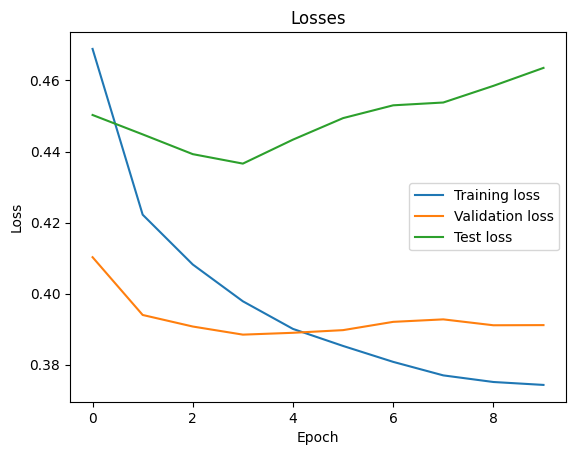

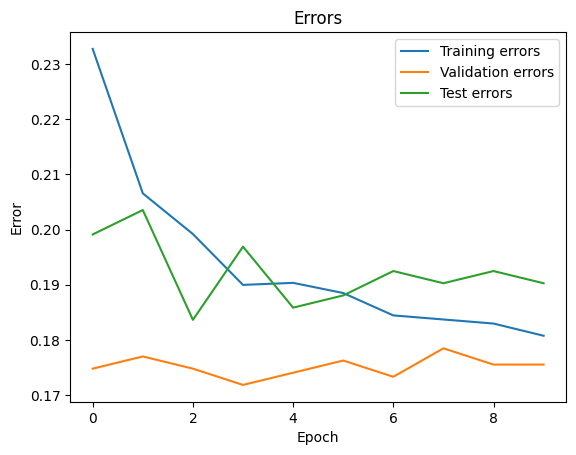

In [ ]:
#stochastic(1, num_epochs=10)

In [ ]:
stochastic(20, num_epochs=2500)

NameError: name 'stochastic' is not defined

100
simple gd: lr = 0.5, epochs = 171, train_error = 0.1375, test_error = 0.19984615384615384
171


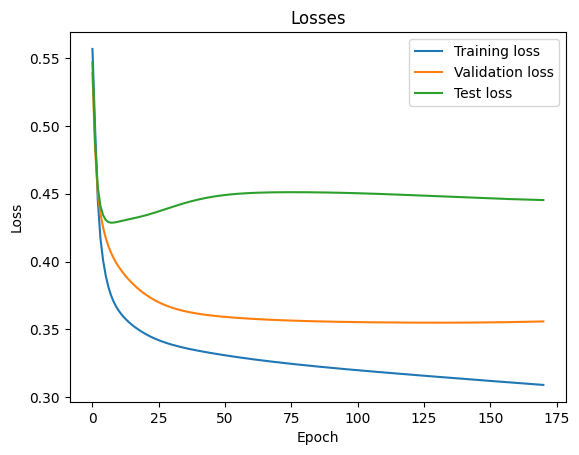

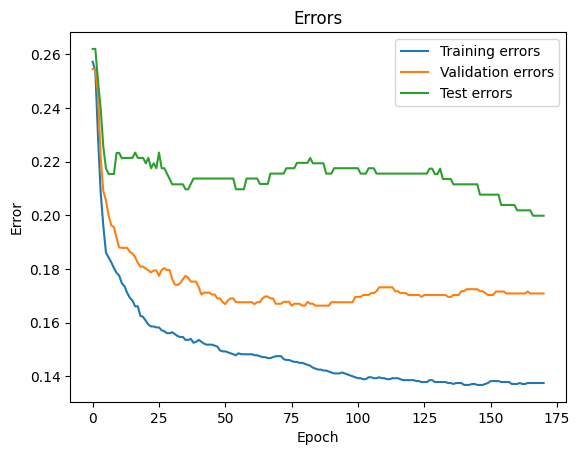

In [ ]:
  stochastic(100)

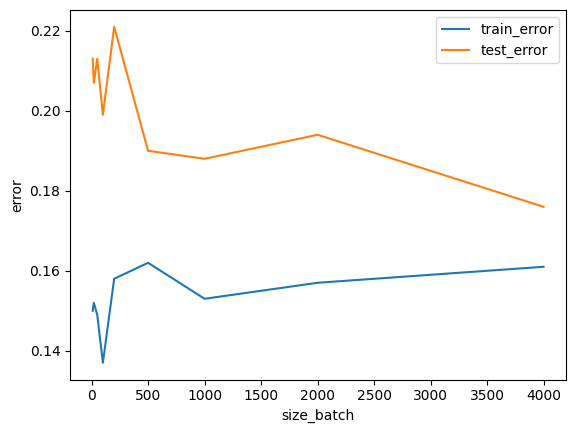

In [ ]:
train_error = [0.150, 0.152, 0.149, 0.137, 0.158, 0.162, 0.153, 0.157, 0.161]
test_error = [0.213, 0.207, 0.213, 0.199, 0.221,  0.190, 0.188, 0.194, 0.176]
size_batch = [10, 20, 50, 100, 200, 500, 1000, 2000, 4000]
plt.plot(size_batch, train_error, label = 'train_error')
plt.plot(size_batch, test_error, label = 'test_error')
plt.xlabel('size_batch')
plt.ylabel('error')
plt.legend()
plt.show()

#### Сравнение методов обучения

In [ ]:
res_info_menod = pd.DataFrame({'simpGD': [1788, 0.161, 0.176], 'GDM': [1500, 0.160,0.173], 'NAG': [1420, 0.16, 0.172], 'SGD': [2100, 0.165, 0.172], 'AdaGrad': [324, 0.253, 0.272],
                  'RMSProp': [410, 0.174, 0.174], 'AdaDelta': [810, 0.164, 0.17], 'Adam': [150, 0.151, 0.172], 'RProp': [19, 0.228, 0.236], 'stGD': [10, 0.18, 0.19]}, index=['number_epochs', 'train_error', 'test_error'])

In [ ]:
res_info_menod

simpGD       GDM       NAG       SGD  AdaGrad  RMSProp  \
number_epochs  1788.000  1500.000  1420.000  2100.000  324.000  410.000   
train_error       0.161     0.160     0.160     0.165    0.253    0.174   
test_error        0.176     0.173     0.172     0.172    0.272    0.174   

               AdaDelta     Adam   RProp   stGD  
number_epochs   810.000  150.000  19.000  10.00  
train_error       0.164    0.151   0.228   0.18  
test_error        0.170    0.172   0.236   0.19

In [ ]:
a = '10	0.180	0.190'.split()
a[0] = int(a[0])
a[1] = float(a[1])
a[2] = float(a[2])
a

[10, 0.18, 0.19]

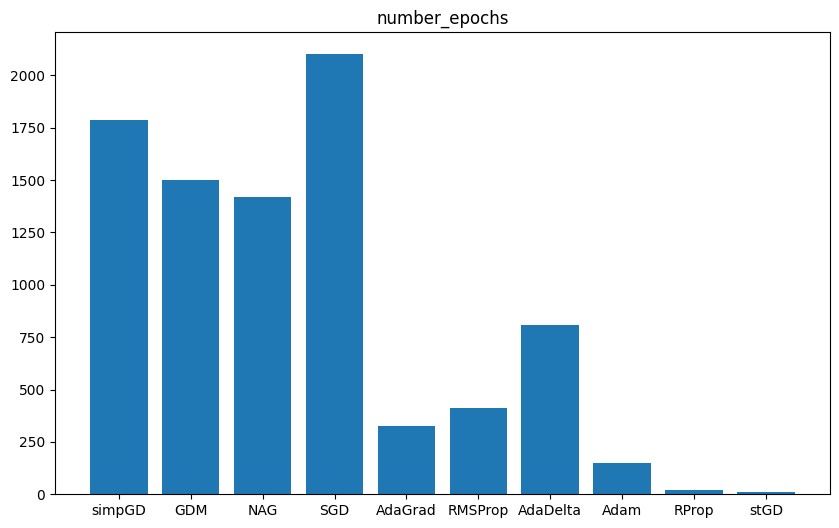

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(res_info_menod.columns, res_info_menod.loc['number_epochs'])
plt.title('number_epochs')
plt.show()

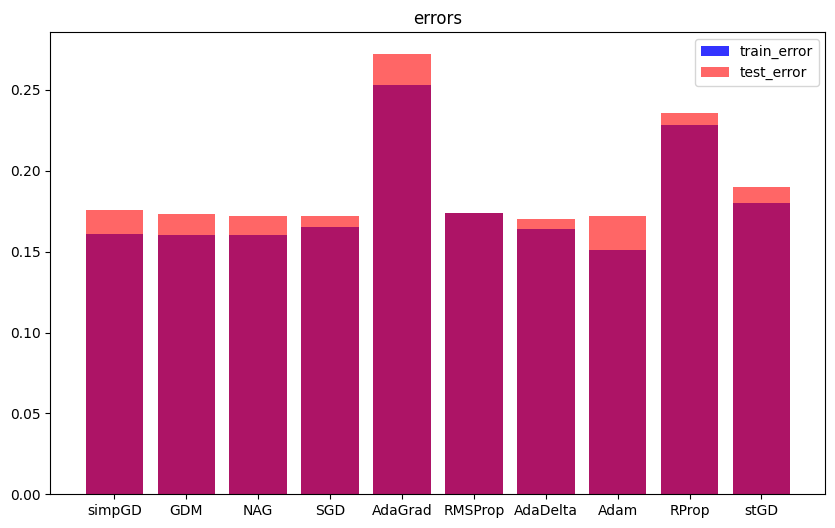

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(res_info_menod.columns, res_info_menod.loc['train_error'], alpha=0.8, label='train_error', color='b')
plt.bar(res_info_menod.columns, res_info_menod.loc['test_error'], alpha=0.6, label='test_error',color='r')
plt.legend()
plt.title('errors')
plt.show()

#### Иницализация

In [ ]:
def init(std_init = 1):
  def xavier_init(m, seed=12):
      if isinstance(m, nn.Linear):
          torch.manual_seed(seed)
          if std_init == -1:
            nn.init.xavier_uniform_(m.weight)
          else:
            torch.nn.init.normal_(m.weight, mean=0.0, std=std_init)
          #nn.init.ones_(m.weight)

  class MyNet_diff(nn.Module):
    def __init__(self):
      super(MyNet_diff, self).__init__()
      self.layer1 = nn.Linear(80, 20)
      self.act1 = torch.sigmoid
      self.layer2 = nn.Linear(20, 2)
      #self.act2 = torch.sigmoid
      self.apply(xavier_init)

    def forward(self, x):
      x = self.layer1(x)
      x = self.act1(x)
      x = self.layer2(x)
      #x = self.act2(x)
      return x

  net = MyNet_diff().to(device)

  def visualize_neurons(net, x, std_init = 1):
    x_tensor = torch.FloatTensor(x).to(device)

    # x_tensor.to(device)
    with torch.no_grad():
        layer1_output = net.layer1(x_tensor)
        act_output = pd.DataFrame(net.act1(layer1_output))

    act_output_mean = act_output.mean(axis=0)

    act_output_std = act_output.std(axis=0)

    random_nuurons = [2, 7, 15]
    #print(act_output_mean.loc[random_nuurons].shape)

    with torch.no_grad():
        layer2_output = pd.DataFrame(net.layer2(net.act1(layer1_output)))

    act2_output_mean = layer2_output.mean(axis=0)

    act2_output_std = layer2_output.std(axis=0)
    if std_init == -1:
      output = pd.DataFrame({'layer1_mean_2': act_output_mean.loc[random_nuurons[0]].tolist(), 'layer1_mean_7': act_output_mean.loc[random_nuurons[1]].tolist(), 'layer1_mean_15': act_output_mean.loc[random_nuurons[2]].tolist(),
                           'layer1_std_2': act_output_std.loc[random_nuurons[0]].tolist(), 'layer1_std_7': act_output_std.loc[random_nuurons[1]].tolist(), 'layer1_std_15': act_output_std.loc[random_nuurons[2]].tolist(),
                           'layer2_mean_1': act2_output_mean.loc[0].tolist(), 'layer2_std_1': act2_output_std.loc[0].tolist(),
                           'layer2_mean_2': act2_output_mean.loc[1].tolist(), 'layer2_std_2': act2_output_std.loc[1].tolist()}, index = ['xavier'])
    else:
      output = pd.DataFrame({'layer1_mean_2': act_output_mean.loc[random_nuurons[0]].tolist(), 'layer1_mean_7': act_output_mean.loc[random_nuurons[1]].tolist(), 'layer1_mean_15': act_output_mean.loc[random_nuurons[2]].tolist(),
                           'layer1_std_2': act_output_std.loc[random_nuurons[0]].tolist(), 'layer1_std_7': act_output_std.loc[random_nuurons[1]].tolist(), 'layer1_std_15': act_output_std.loc[random_nuurons[2]].tolist(),
                           'layer2_mean_1': act2_output_mean.loc[0].tolist(), 'layer2_std_1': act2_output_std.loc[0].tolist(),
                           'layer2_mean_2': act2_output_mean.loc[1].tolist(), 'layer2_std_2': act2_output_std.loc[1].tolist()}, index = [std_init])
    return output

  return visualize_neurons(net, X_train[:], std_init = std_init)

In [ ]:
std_init_all = [0.1, 0.2, 0.3, 0.5, 0.9, 1.0, 1.4, 1.8, 2.5, 5.0, 10.0, 15.0, 20.0, 40.0]
res_init = pd.DataFrame()
for i, std_init in enumerate(std_init_all):
  init_i= init(std_init = std_init)
  res_init = pd.concat([res_init, init_i])

In [ ]:
res_init

layer1_mean_2  layer1_mean_7  layer1_mean_15  layer1_std_2  \
0.1        0.533487       0.527582        0.481356      0.036841   
0.2        0.548612       0.571487        0.452387      0.072250   
0.3        0.562950       0.611278        0.424522      0.105233   
0.5        0.588576       0.675372        0.373709      0.162322   
0.9        0.626549       0.750839        0.295229      0.243766   
1.0        0.633556       0.762276        0.280129      0.258762   
1.4        0.654202       0.792080        0.233744      0.304233   
1.8        0.666663       0.807746        0.203596      0.334020   
2.5        0.678256       0.821288        0.172935      0.366069   
5.0        0.689893       0.834103        0.140468      0.411043   
10.0       0.694243       0.838829        0.134599      0.435470   
15.0       0.695347       0.840446        0.134881      0.444016   
20.0       0.695703       0.841222        0.135237      0.448341   
40.0       0.696004       0.842186        0.135655      0.454597   

      layer1_std_7  layer1_std_15  layer2_mean_1  layer2_std_1  layer2_mean_2  \
0.1       0.049388       0.028816      -0.245770      0.010332      -0.122830   
0.2       0.095224       0.056605      -0.524633      0.038472      -0.069347   
0.3       0.135070       0.082481      -0.767296      0.079003      -0.004585   
0.5       0.195654       0.126793      -1.191697      0.183221       0.152994   
0.9       0.263335       0.187203      -1.959940      0.453492       0.531955   
1.0       0.273639       0.197782      -2.147470      0.530284       0.632756   
1.4       0.301533       0.228678      -2.893401      0.859143       1.042833   
1.8       0.317576       0.248114      -3.637553      1.209243       1.453966   
2.5       0.333252       0.268975      -4.943023      1.849279       2.163856   
5.0       0.351153       0.301188      -9.651995      4.259157       4.619015   
10.0      0.357662       0.321353     -19.150190      9.210571       9.455806   
15.0      0.359687       0.328514     -28.677160     14.183582      14.311208   
20.0      0.360786       0.332079     -38.213409     19.157629      19.180243   
40.0      0.362658       0.337218     -76.370636     39.050137      38.664402   

      layer2_std_2  
0.1       0.011924  
0.2       0.046900  
0.3       0.102629  
0.5       0.263783  
0.9       0.708802  
1.0       0.834932  
1.4       1.370802  
1.8       1.936198  
2.5       2.958198  
5.0       6.700393  
10.0     14.243355  
15.0     21.784409  
20.0     29.317318  
40.0     59.409950

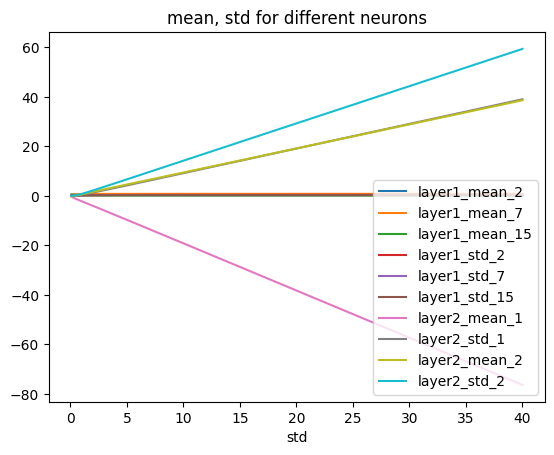

In [ ]:
for i in range(res_init.shape[1]):
  plt.plot(res_init.index, res_init.iloc[:, i], label = res_init.columns[i])
  plt.legend()
plt.xlabel('std')
plt.title('mean, std for different neurons')
plt.show()

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
simple gd: lr = 0.5, epochs = 2000, train_error = 0.18590925857617116, test_error = 0.19247787610619468
2000


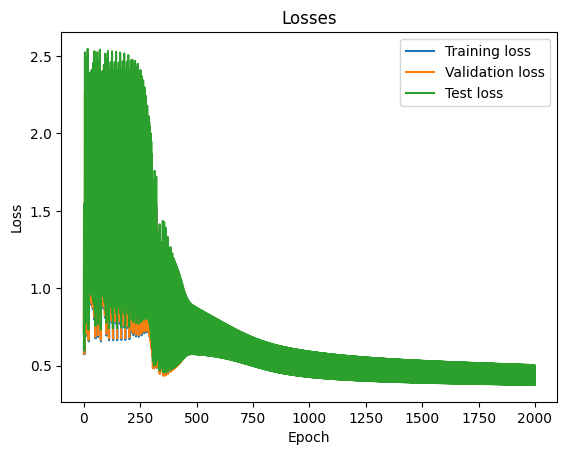

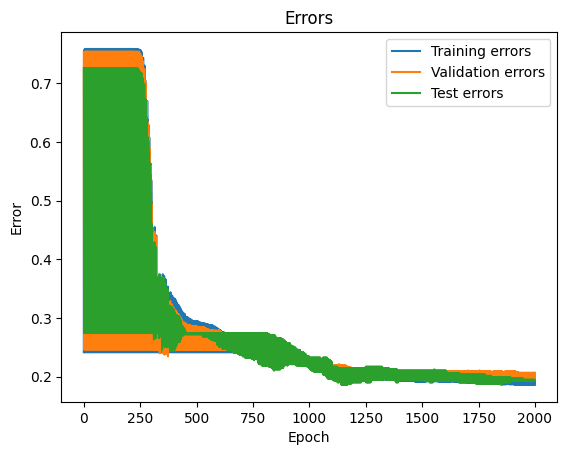

In [ ]:
a = simple_gd(learning_rate = 0.5, num_epochs = 2000)

In [ ]:
def xavier_init(m, seed=12):
    if isinstance(m, nn.Linear):
        torch.manual_seed(seed)
        #nn.init.xavier_uniform_(m.weight)
        torch.nn.init.uniform_(m.weight, a=0, b=1.8*12**0.5)
        #torch.nn.init.normal_(m.weight, mean=0.0, std=1.8)
        #nn.init.ones_(m.weight)

class MyNet_diff(nn.Module):
  def __init__(self):
    super(MyNet_diff, self).__init__()
    self.layer1 = nn.Linear(80, 20)
    self.act1 = torch.sigmoid
    self.layer2 = nn.Linear(20, 2)
    #self.act2 = torch.sigmoid
    self.apply(xavier_init)

  def forward(self, x):
    x = self.layer1(x)
    x = self.act1(x)
    x = self.layer2(x)
    #x = self.act2(x)
    return x

net = MyNet_diff().to(device)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
simple gd: lr = 0.5, epochs = 2000, train_error = 0.2416082626337145, test_error = 0.7256637168141593
2000


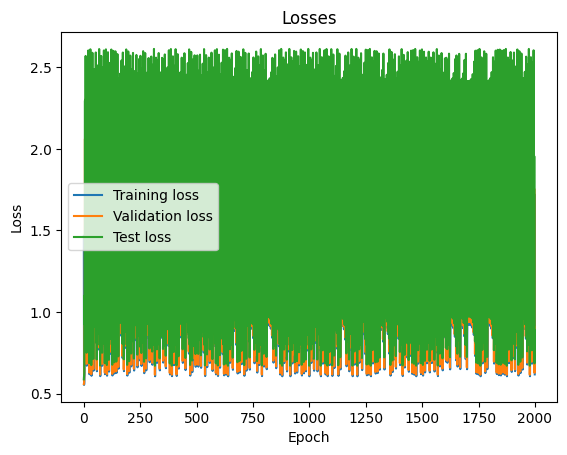

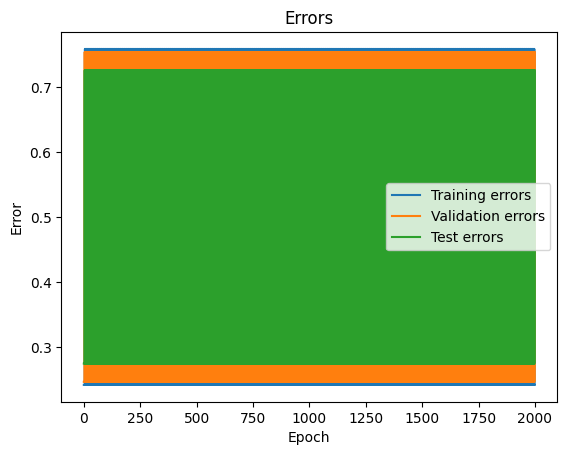

In [ ]:
a = simple_gd(learning_rate = 0.5, num_epochs = 2000)

In [ ]:
def xavier_init(m, seed=12):
    if isinstance(m, nn.Linear):
        torch.manual_seed(seed)
        #nn.init.xavier_uniform_(m.weight)
        torch.nn.init.uniform_(m.weight, a=0, b=5*12**0.5)
        #torch.nn.init.normal_(m.weight, mean=0.0, std=5.0)
        #nn.init.ones_(m.weight)

class MyNet_diff(nn.Module):
  def __init__(self):
    super(MyNet_diff, self).__init__()
    self.layer1 = nn.Linear(80, 20)
    self.act1 = torch.sigmoid
    self.layer2 = nn.Linear(20, 2)
    #self.act2 = torch.sigmoid
    self.apply(xavier_init)

  def forward(self, x):
    x = self.layer1(x)
    x = self.act1(x)
    x = self.layer2(x)
    #x = self.act2(x)
    return x

net = MyNet_diff().to(device)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
simple gd: lr = 0.5, epochs = 2000, train_error = 0.7583917373662855, test_error = 0.2743362831858407
2000


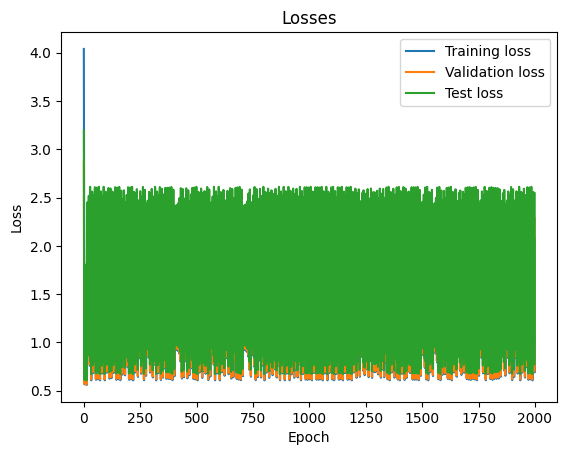

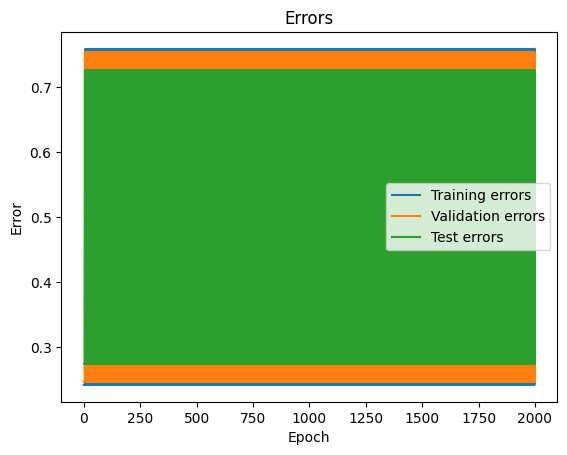

In [ ]:
a = simple_gd(learning_rate = 0.5, num_epochs = 2000)

In [ ]:
def xavier_init(m, seed=12):
    if isinstance(m, nn.Linear):
        torch.manual_seed(seed)
        nn.init.xavier_uniform_(m.weight)
        #nn.init.ones_(m.weight)

In [ ]:
class MyNet(nn.Module):
  def __init__(self):
    super(MyNet, self).__init__()
    self.layer1 = nn.Linear(80, 20)
    self.act1 = torch.sigmoid
    self.layer2 = nn.Linear(20, 2)
    #self.act2 = torch.sigmoid
    self.apply(xavier_init)

  def forward(self, x):
    x = self.layer1(x)
    x = self.act1(x)
    x = self.layer2(x)
    #x = self.act2(x)
    return x

In [ ]:
def classification_error(model_output, standart):
    return (model_output.detach().argmax(dim = 1) != standart).sum().item() / model_output.shape[0]

In [ ]:
def train_epoch(net, dataloader, criterion, optimizer, device):
    total_loss = 0
    total_error = 0
    for x_batch, y_batch in dataloader:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        y_pred = net(x_batch)
        loss = criterion(y_pred, y_batch)
        total_loss += loss.item()
        total_error += classification_error(y_pred, y_batch)
        loss.backward()
        optimizer.step()
    return total_loss / len(dataloader), total_error / len(dataloader)

def eval_net(net, dataloader, criterion, device):
    net.eval()
    total_loss = 0
    total_error = 0
    with torch.no_grad():
        for x_batch, y_batch in dataloader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            y_pred = net(x_batch)
            loss = criterion(y_pred, y_batch)
            total_loss += loss.item()
            total_error += classification_error(y_pred, y_batch)
    return total_loss / len(dataloader), total_error / len(dataloader)

In [ ]:
def model_training(net,
                   num_epochs,
                   optimizer,
                   train_losses,
                   val_losses,
                   test_losses,
                   train_errors,
                   val_errors,
                   test_errors,
                   train_dataloader=train_dataloader,
                   val_dataloader=val_dataloader,
                   test_dataloader=test_dataloader,
                   criterion=nn.CrossEntropyLoss(),
                   device='cpu'):

    upper_count = 0
    epoch = 0
    while upper_count < 10 and epoch < num_epochs:
      train_result = train_epoch(net, train_dataloader, criterion, optimizer, device)
      val_result = eval_net(net, val_dataloader, criterion, device)
      test_result = eval_net(net, test_dataloader, criterion, device)

      train_losses.append(train_result[0])
      train_errors.append(train_result[1])
      val_losses.append(val_result[0])
      val_errors.append(val_result[1])
      test_losses.append(test_result[0])
      test_errors.append(test_result[1])

      if epoch >= 1 and val_losses[epoch - 1] < val_losses[epoch]:
        upper_count += 1
      else:
        upper_count = 0
      epoch += 1
      if epoch % 100 == 0:
        print(epoch)
    return epoch

In [ ]:
def v_loss(train_losses, val_losses, test_losses):
  plt.figure()
  plt.plot(train_losses, label='Training loss')
  plt.plot(val_losses, label='Validation loss')
  plt.plot(test_losses, label='Test loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title('Losses')
  plt.legend()
  plt.show()

In [ ]:
def v_error(train_errors, val_errors, test_errors):
  plt.figure()
  plt.plot(train_errors, label='Training errors')
  plt.plot(val_errors, label='Validation errors')
  plt.plot(test_errors, label='Test errors')
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.title('Errors')
  plt.legend()
  plt.show()

In [ ]:
device = 'cpu'

In [ ]:
net = MyNet().to(device)

#optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)
optimizer = torch.optim.Adam(net.parameters(), lr=0.5)
criterion = nn.CrossEntropyLoss()

train_losses, val_losses, test_losses = [], [], []
train_errors, val_errors, test_errors = [], [], []

epochs = model_training(net, 200, optimizer, train_losses, val_losses, test_losses, train_errors, val_errors, test_errors)

In [ ]:
device = 'cpu'

In [ ]:
import sklearn

In [ ]:
for x_batch, y_batch in test_dataloader:
  x_batch, y_batch = x_batch.to(device), y_batch.to(device)
  optimizer.zero_grad()
  y_pred = net(x_batch)
  loss = criterion(y_pred, y_batch)
  confusion_matrix_test = sklearn.metrics.confusion_matrix(y_batch.detach().numpy() , y_pred.detach().argmax(dim = 1).numpy())

In [ ]:
confusion_matrix_test

array([[302,  26],
       [ 49,  75]])

In [ ]:
for x_batch, y_batch in train_dataloader:
  x_batch, y_batch = x_batch.to(device), y_batch.to(device)
  optimizer.zero_grad()
  y_pred = net(x_batch)
  loss = criterion(y_pred, y_batch)
  confusion_matrix_train = sklearn.metrics.confusion_matrix(y_batch.detach().numpy() , y_pred.detach().argmax(dim = 1).numpy())

In [ ]:
confusion_matrix_train

array([[1827,  229],
       [ 226,  429]])